In [1]:
#set up
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
import pandas as pd
from wordcloud import WordCloud
import collections 
from bs4 import BeautifulSoup  
import nltk
from nltk.corpus import stopwords
import re
from lxml import etree
from textblob import TextBlob

In [2]:
data = pickle.load(open("/home/kavi/Downloads/All_email.txt","rb"))
#deal with year
data = data.loc[data.Year.isin(['1999','2000','2001','2002','2003','2004','2005','2006','2007'])]

In [3]:
pd.Series(collections.Counter(data.Year)

Counter({'1999': 7589,
         '2000': 11363,
         '2001': 10720,
         '2002': 15943,
         '2003': 2318,
         '2004': 14047,
         '2005': 19727,
         '2006': 3956,
         '2007': 74218})

In [5]:
data = data.reset_index()

In [6]:
data = data.drop('index', 1)

### Word Cloud

In [8]:
def remove_nonrelevant(txt):
    # Remove CSS 
    txt = re.sub("[\<\{\[].*?[\}\]\>]", "", txt)
    txt = re.sub(r'(\s)\.\w+', "",txt)
    txt = re.sub(r"""html|style border|border top|border bottom|border right|border left|
    height|width|bgcolor|
    px solid|right px|bottom px|top px|left px|IMG|TD|:visited|DSBODY""",'',txt)
    #remove links
    txt = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', txt)
    #remove emails
    txt = re.sub(r'Email: [\w\.-]+@[\w\.-]+','',txt)
    return(txt)
def email_to_words( raw_email ):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    #remove email address
    txt = remove_nonrelevant(raw_email)
    # 1. Remove HTML
    email_text = BeautifulSoup(txt).get_text().replace(u'\xa0', ' ') 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", email_text)
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    meaningful_words = " ".join( meaningful_words )
    #
    blob = TextBlob(meaningful_words)
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(blob.noun_phrases))   

In [ ]:
txt = data.Content[3791]

In [ ]:
remove_nonrelevant(txt)

In [ ]:
re.sub(r'Email: [\w\.-]+@[\w\.-]+','',remove_nonrelevant(txt))

In [6]:
num_emails =  data["Content"].size
print "Cleaning and parsing the emails...\n"
clean_emails = []
for i in xrange( 0, num_emails ):
    # If the index is evenly divisible by 1000, print a message
    if( (i+1)%10000 == 0 ):
        print "Review %d of %d\n" % ( i+1, num_emails )   
    if type(data["Content"][i]) is pd.core.series.Series:
        clean_emails.append(email_to_words(data["Content"][i].to_string()))
    else:
        clean_emails.append(email_to_words(data["Content"][i]))

Cleaning and parsing the emails...



/usr/local/lib/python2.7/dist-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 174 of the file /usr/lib/python2.7/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


Review 10000 of 159881

Review 20000 of 159881

Review 30000 of 159881

Review 40000 of 159881

Review 50000 of 159881

Review 60000 of 159881

Review 70000 of 159881

Review 80000 of 159881

Review 90000 of 159881

Review 100000 of 159881

Review 110000 of 159881

Review 120000 of 159881

Review 130000 of 159881

Review 140000 of 159881

Review 150000 of 159881



In [7]:
data['clean_emails'] = pd.DataFrame(clean_emails)

In [8]:
pd.set_option('display.max_colwidth', -1)

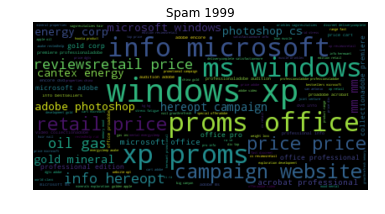

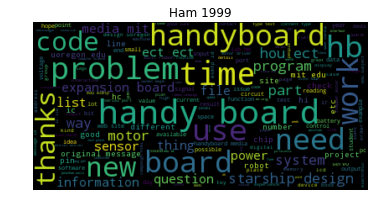

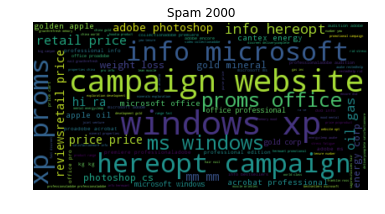

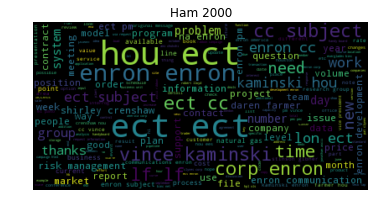

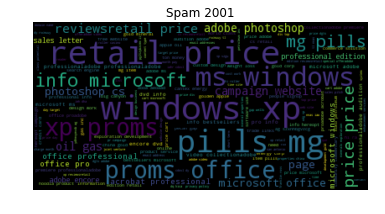

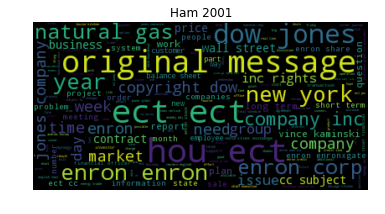

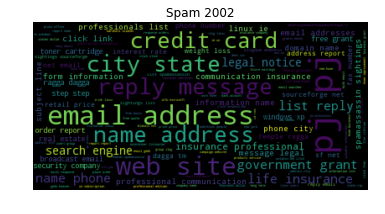

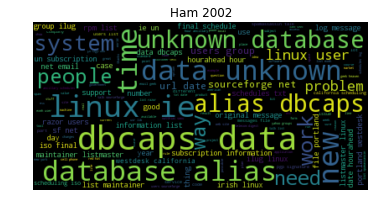

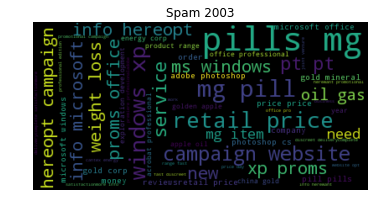

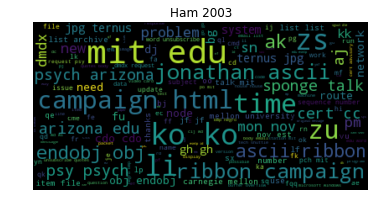

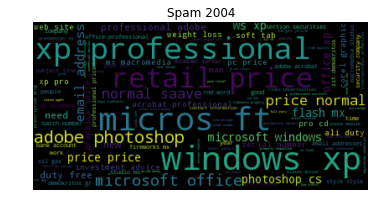

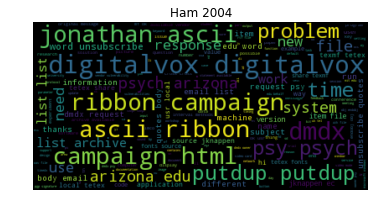

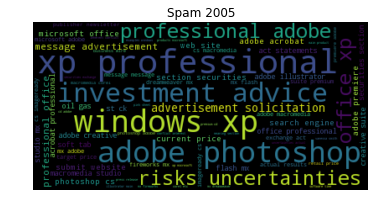

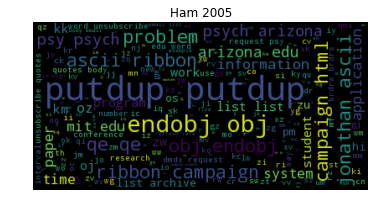

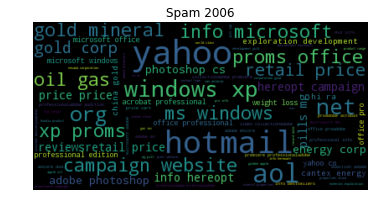

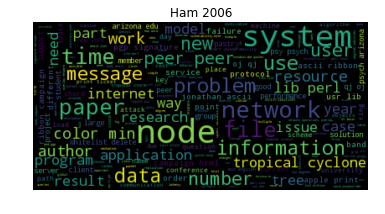

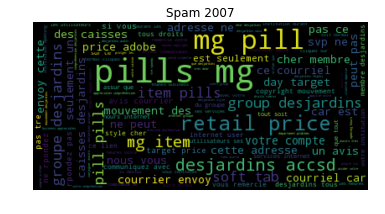

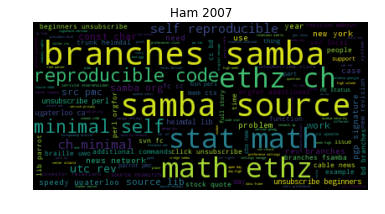

In [9]:
# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
def showWorldCloud(words,title):
    plt.figure()
    plt.title(title)
    plt.imshow(words, interpolation="bilinear")
    plt.axis("off")
    plt.show()

for year in ['1999','2000','2001','2002','2003','2004','2005','2006','2007']:
    yearSub = data.Year == year
    spamSub = data.Classification == 'spam'
    hamSub = data.Classification == 'ham'
    tmp = data['clean_emails'].ix[yearSub & spamSub].str.cat(sep=' ')
    tmp1 = data['clean_emails'].ix[yearSub & hamSub].str.cat(sep=' ')
    #word cloud
    # Generate a word cloud image
    wordcloud1 = WordCloud(max_font_size=40).generate(tmp)
    wordcloud2 = WordCloud(max_font_size=40).generate(tmp1)

    # lower data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYEAAADWCAYAAAA3pT7fAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmMJUl+3/eJvPPdVa/uo++eo+eendn7IpamyCVNWaZlSzJtU4QA6y/9YcEyYMMWbEAGfECWYQEGLJi2IMKURcuCedkiae7O0rs799E9fXdXV3fdVe++8owI/5Gvqru6qo+Z6Zlpct4Xu9P1MjIifxmZ+fvF7wyhtWaEEUYYYYQvJozPm4ARRhhhhBE+P4yEwAgjjDDCFxgjITDCCCOM8AXGSAiMMMIII3yBMRICI4wwwghfYIyEwAgjjDDCFxgjITDCCCOM8AXGSAiM8NhCCPFNIcRPhBBtIURDCPFjIcSrjwFdPyOE+MGQruVD2r8uhHhTCNEVQpwVQnzzjjYhhPhPhBC3hBAdIcQ/FUKU7mifF0L8X8P7XRVC/M3P6LZG+IJiJARGeCwxZIy/B/wPwDgwD/znQPR50jVEH/gN4D+8u0EIMQ78LvDfABXgvwZ+VwgxNjzl3wX+HeAbwBzgk93jLn4TuAFMA78I/JdCiJ/5dG5jhBFGQmCExxdPAGitf0trLbXWgdb6D7XWZwGEEL821Az+4XBFfkkI8b3dzkKIvy6EuDhcjS8JIf79O9q+O1xl/x0hxLYQYkMI8a8JIb4vhLgyXIX/x/ciTGv9ptb6nwBLhzR/HdjUWv/2kO7fBHaAf33Y/q8C/7PWekVr3QP+K+DfEkLkhBAF4LvA39NaJ1rrD4D/A/j1jz+NI4xwf4yEwAiPK64AUgjxj4UQv3DHSvpOfAW4DkwAfxf4P4crcYBt4JeAEvDXgf9OCPHyHX1nAI9Mw/jPgH8E/CrwJeBbwH8qhDj+MWkXh/x+9h7tAnCB03ccv7v9zr4jjPBIMRICIzyW0Fp3gG8CmoxB7wghfkcIMX3HadvAPxiumv934DKZCQWt9e9rra/rDK8Bf0jG3HeRMFxxA/+UTJD891rrrtb6PHABeOFjkP5TYE4I8VeFELYQ4t8DTgK5Yfv/A/wNIcQxIUQZ+I+Gx3Na6y7wYzIB5A2F1q/c0XeEER45RkJghMcWWuuLWutf01ovkK2G54B/cMcpa3p/BcSbw3MYag+vD007LeD7ZIx+F3WttRz+HQz/3bqjPQAKH4PmOvAXgf9gON7PA38MrA5P+Q3gt4AfAueBHwyP77b/28BxYAX4H8l8BLttI4zwyDESAiP8mYDW+hLwv7LfNDIvhLjTdHIEWBdCuMA/B/5bYFprXQH+gINmmk+L1te01q9qrcfJnMBPAW8O25TW+u9qrY8Nhdt5YG34f7TWN7XWv6S1ntRaf4VMcL35WdA9whcTIyEwwmMJIcRTQoi/LYRYGP5eBP4q8Podp00Bf2todvnLwNNkzN4hs7PvAKkQ4heAn3uEtBlCCA+ws5/CE0I4d7S/NKSpRCaIVrTW/3LYNi6EODkMFT0D/H3gv9Baq2H700KIohDCEUL86pDuv/+oaB9hhLsxEgIjPK7okjl+3xBC9MmY/4fA377jnDfIHKo14O8B/4bWuj60rf8t4J8BTeCvAb/zCGn7Npm56A/ItI+AzOewi78zpGkFmAX+0h1tE8N+feD/Bn5Da/0/3dH+F8iijprA3wR+Xmu98whpH2GEfRCjTWVG+LMIIcSvAX9Da/3NB507wggj3BsjTWCEEUYY4QuMkRAYYYQRRvgCY2QOGmGEEUb4AmOkCYwwwggjfIFhfd4EAAghRurII4Rt+iAESTr4vEk5FLaVw7ULaK0J4zZSxZ/etT7BXDhWHoQgTnqfAmUjjPDJobX+xLkvj4UQuBNCGGAYoEEYBlpJtNYIwwCtQBigNcIwMV2fZNAFrRCGuTsAWqlsHDQaEAg0CsOwEIaJVgrQKJUihJGNjx4ef5Q3Q1b04DNGITeNISwa3SWG4eePDUzD4djMN/CdClHSZXXnHfphFgFpmR6m4RAnPTSPhu6POxeGsJibeBFDWCxtvPZIaPnCwMgMDMIwsu/PMNBSYuR8dBSDIRCOg+r3AYEQAp2mWV/z9neMUghz+L2K4XesVDa+kllfywTDzL77OEKYFsLz0FEImuyZa0DrId8wbl/rMNILuewaUqGTFIwhj9UgDIGWKjumQdgmwjRR/Szh3Mj5IEDHKdgmwrbRgxDQ6FRm/GDI2xCAHN6XZaGlzHgcZPzLNBGug5YKHccI28ruMYqz/o+QVz12QsAtTeAUq8S9BrZfHPJQjeXmSQZt0rCP6eZRaYTtF5HRAGF6+OOzaKVQcYiwbAzTzAQGYLo50qCHigMM2yMNexiWg+nlMG2PuNckDXokg/YeHYZjIAyBAFSqMV0TGUsMUwACJRWGaSCTrPKA5VmYloGwDKJOhOmYeCWHeJCilUal2UPTUqO1xrAM0iDFLTlYvk3QDDDMoYAzDVSqUFKh048uRZrd5U/0DD5NWKZLOTfHxVt/wCCsD8V0hlJujrxXZb3+wSPTDh7nufjzCCOfw56ZBqVQYYTq97GnpwCB8D1UMCDdqeMeXUSnEp0kqDAkXt9EGAb21CQ6STAr5Yz5OXbGZC0THScYvodRyCPrDWSvj5HLIVwHtEanKcIwEJaFbHcw8jlUEGJVxzOh0+2hoohkfeNw2kt53JNHSGsthGNDmoJhoJMUYZnoVGKWCwjPHQqJBBXFxEurGL6Le+roUCgJ4tUtrEqRtNHBLOZQYYxZzCN8F1lvZfTuCjmpMDwXTIHhuegkRQUhOlVY42WwTFRvKDBdB9nukqxsgHo0K8zHTgiYro9TqqK1xK/MkEZ9EAaG7YAQyDggP32UqL2N6fiZRuD45CePIOOQ3uYSfnkS081hmBYqTdBoDNOmt9nEdXNYXh4nP4blF1BpxmyEMPaEgOVZVJ8cIw1S8tN5VKowbZOwHWbMO5S4JYf8VI72zQ6D2gDLt3EKNlqBSnJYvkUapAgrxqt4hK2Q8dNjODmboBkStSN2LtTwqz4TT1dpXGtSXiixc6FG5ViJuJ/QWu4Qd28zw4nyaXyngusU6A628ZxsL5LNxnmipINpOMxWn6fgT9Ho3GCnfYXd8jiuXWSifJqCP4VA0Ogus926CMDC5Cv0gi2qpZOYpst28yKt3i0MYTE9foZSbo4wbrPdvEgQtxDCpJJfpFo+gW36KJ3S6q2w1bwAZMx8svIEhrDYaV+l1bsJwMzYs4wVj5Hzqhyd/hpKxazW3mMQNTgy+SpjxaM4doGCP0UqQ66vv4bSh6/aqqWTKC1p9W4xUX6CNA1p9m4yM/4snf46UdI9dC7y3gQT5dOkMqKYmyFKuqzXPiBKOoCgWjpBtXQCKRMcO0eU9AEOnYsw6bI4+SqrO2/hu2MUc7M0OksIYTBZfoLN5nmqpROU8/OZhpP22WlfpdNfe8RfzeMDI5/HPXYEFYSE15Ywcj72/BxqMEArheWPo3oDzLExUBLZ6WJWyiQ7NQDM6hiG52GNVVC9PjpNka6LWSwS3biJNVZBOE62Evd9zHwO2etjFgoYxTyqP8iES5rizM8hu13MUhFhWaRSYo5X7i0E8jmsiXFUP8CankB1epjjZWSnh7BMklsbWJPjiKG2kmzuDFf/AiPnY02NZ6v1NMXwXIxSAcswMQo5LENg+B4ajeoHqP4AZ3EWhEAFEdZYKRM2rpMx+mabtNHKxtSauNvHHC9j5n3UIHikFobHTggEjQ2iTh2tJGFzCyWTrGGoHiqZIG+cRaUxwjCRSYxhufR3VghbW8hoQBr2sPwSll8gbG4OVUKNjAJkHCCEQdSpZ6rbUK3cbwrSOAWHseMV3LJD3EuQiUKlivx0jq0PdvDHPdJIYudtim4R27cIWxG5qodb8UiDhLiXIEzB2IkyYdPFcrOXRyaK0kKRnYt1VKKQkaS8WKK0UKS31ae0WGL7wxrJINk3N0V/mkJuhmbnBouTr7DZvEApN0O5MM92s4NSKY3ODXLuOKXcLPXONaSWOFaehckvIYTJTusKoJHq9tjjxeOUcnNsNc+jtNyzgU9WnqSSX2SreYFyfp7Z6gus7ryNYdgsTH6J7dZlwqSNbXp74xX8KeaqL9AZbJDKkLnq82gtafdXafVXSWVIubDAVvMCSTogjNtolbLTvoppOuS8KpvN86QyRO3VdzsI1ylhIOgNtpgee5ow7tALtil4kwzCOkHUPHQuXLvIwuQrrOy8zVbzPJPlJ1ic/BLX1n9ApbDIzPhz1NvX0CiOlr9G1L52z7lYr79PMTeDbeWG9/0iQdREa03OqzJePE6lcJRa+ypSJdiWh5QP1nDcyRlKZ16m/vqfoKLwgecfgBiaTj8hJr/98/SuXyJYW37oPrLZov/2+2glUYMAYZoM3juLTpLMBCIEOkkZvH8WnaboVCIce2jm0ERXl7JVuBA4RxYRhiC+uYLWoAYDZKvFnp1VQzLUEIRjZ6vqNAUyRizbHbSUewxTp2kmQO5Fe63J4K1zqCgm3aqjkgTDcbIxADUIkN1sUZCZn5LMTKMkabPD4K0PsxW+lOhUktZbeyYfdktcaY1OUsxygaTWRO400VISG5lZGjTuiUXi5TV0kpJu1vY0JrFZy/oP5+pR4bETAiqN91bnMg4OPSfpt/b/HnRIgu7ei5+GfdJwAC1x4GNQyYM3pkpDydqbGxhWZk6aPFPF9m22zu2g3lXIWNJe6WS2zOHDEEKglUZYArF7WQ1aaRpXm0MydPbySI1hZf9213v0tvqZ6ckQqETRvN5EJgotDz7oIGqw077CbPV5au0r5NwKjplVGtYoBlGdMG5nTs0hfLdCzh1nefPHdIPdQpn7/Unt/iqN7o19dvPJypNsNc7T6N4gSnqcmP0Wrl0kTvtoNHlvnChu0wu2iYeO12JuFqVTap1rSBmT9yaplo7T7q8Sxi20lkgZ0R1sEqe3Ha79cIcgamGZHp3++gPNQXHSw7WLVMsn9xjvWPEocTogVdE95yKbwya11mUGUQO04NjM1wEo5xcI4za1zrXh78UHzEWBMG5RzM3g2iW6gw3K+XmCqMkgauwxft+t0OrdYhDWSOTh7/SdMBwPpzq1Z1v/KDBzBYpPPk/n4nuo8MHXuh+c8SmMtZt8FOeWThJk+7ZZVUuJjA8+Sxnd/g51eFvQqcEAhj78oDt8P+6w4at72PN1dPC7luFBAXrYebdpT5GtTtY3yPrKQfavaYLQIILBHv81BKgkzv5NU1S7Q6kkCGKNlKDiCNME04Ak2W/GT2tNqLUOte0H566CPLgA0lFy4NijwGMnBD4e9CGS8bBjDw+VKFSSPaCNd7YOtOt72eMOeUfVfY5ppQ+Mddj5u5AyRaoUjSaVcSaExP0DBAxhAYJE3vlR7L9mlHS5O2fENl3SYR+pYgxhIoRJlHS5uvpHTJRPMTfxIgC19lW2W5cwDRutM6e71hKpEjz7I1dkfiDipI9rF5ksP8Gt7TfIuVWqpRO0+qtIeX9Bn8qQJM0YpNIJxjCowDRtlEr2TGjpHfN16FxgEMZtSrk5NIr1+vscnfk6SqUMwjqN7jJh3GaifIpj098gTNpsNS/SHWTmiNziCdJ+F7syjkoS4tomMsg4oGHZeFNzCNNCJwnh9joqymi2ihWc8QlAEDe2SbsZ03UnZvBmFimdeREVBsgoINy4hQwGGI6LOzGD4fnIQY9oZyNzRpoWdmUcu1jJnJxJQtyskXazhZaVL5I//gQASbtJ0sq0dGHZuJOzmH4OGfSJapvoJMEqlLBKFdAa08+T9tpEO5sP/haFgTNWxS6NIUwTGYWEm6toJTP6ylUMy0IrSdJuEjc+u3JKY+MG5bIgCDXzCxbBQBHH4HkCpTS2LTh/LiGXE3zrZzyuXUnwPEGzofBzAs8TXL+a0u3eMQcqW/UfikMEwKeJx04I+PkJiuNHEMKk11qj39kANNW554iDNvnSLAC99hr99gZaSyw7R6l6DMcrEYdd2jvX9hhBqXocmUZ4uSqOW6DXXqXbXMEwLErV4zheGdNyEMIgDju0atcpjR+l11olDjvYbpHi2CKt7Suo+3FnwM2NUxo/imX7yDSiU79BOGggDIvKxEnc3BhJ1KVdXyaNM7UyV5zGdgsIIfDzk4SDBs3tyxTHjmCaDpZbwLQceq21vcioj2oQTGSA0pJSbpY46aNRWKb3wLDJXrBDMTdLu79GzquSqhipIoQwEcJgvX6Wjfo5ZqvPM1d9ge3WJcK4Q9GfxrWLJOkA363QC7Yfik6tJYYwMQ17aF66933G6QDHyqG0pB/W0cBE+RToTDje/zp6n0N6F2HcoZSbxTJ9hBDkvQn6Ye2ec5HIkDgZUCkcod65Tj+sEcUdcl6VemcJy3RJ0gE3t17HtQucmP02k+XTe0Jg6nt/kd71iwghsIplgvVbtD98GwC7UqVw8gw6TbHLFQa3lmh98DpWqULl+S9jOC4AavE4rQ/eJO22sCvjuFOz2MUK7sw8Oo6J69uoOKZw+hlyCyeQ4QAzl6dz/l0Gt67jTc9TfOoFdJpkiwmtQbAnBArHnyRu1TFcD4DWuz8hqm+TP3aawulnkIM+pp+jd+0ivaWL+HNHGf/yd+gvX0FYNlYuT/OdHxNu3d8P4s0sUHnuVVQcZXbzOCKub2HYBcZe/kZmrh1GBkVba5+pEJhbMBFoFo9ZvPKqw+pKShho8gWB4wiCgebSxQQNbG9JFhYtnnzK4tLFFK01UQSW/TmFCj4EHish4OWrTB15hTQJ0FoxufgSrGj6nQ1mj32NsF+n117D8UpMV+ZZu/Yj4qBNdfZZcsUpgv4OlclTmKbNztr7AIzPnMFxi3Qay1lUjmEDMDb9FIXKIoPuJpbtMzb1JI2tC4j6EuVq5iDdWXuPUvUY5epx2rXr912ie/kJZo99lSQZkEZ9DNPGMLNrVSZPMz7zNP32OqXx49huge2V91AyplBZYHLhJRqbF9BKYpiZzbIy9QTFyhGa25cwLZfpI6+Si2367c170+BUmKu+QKWwiDkcZ7t1iX5Yo965TrV0grHiMQAGYZ2Vnbfu+zw2mx8yP/Eypxe+h2HYw5VtB9v0OTr9tSxkbxieW+tk2+12+mvkvSqLU6+gtUbKmHrn+kM8feiHdcaLxzk5912ipMvy5k/u6RhO0gGeU6bZvYlUMUHUJIw7CGFk2sc95uJ+Wwo0O8sUvAlOzH6LRIZ7Ycb3nos2lulhmS6t3goAO60rHJ/9JlHSoZxfYHrsaXQWY5Y50Pc5hTXRzibdK+fIHz1F5YWv0F/KnPU6ieldv8BgZYnCyTNUnn+V1gevk1s4gennabz5Q7TWVL/8XXJHT9L58B161y4QN2u4U3M03vghcpCZU8x8kcLJM3TOv01/+RrFp1+k9NSLDFaWsEoV7PIYrQ/eYLCylDk97zBRJJ0W9Z/+CYbnM/mtv4BTnSRuNyg+8Ty9pQv0rl6gcOoMxSeeY7CSPWedpnQvnyNu1hh/9TsUn3zhgUKg9MxLxK06rfd/umeLV3GEVazgTs7QPvcOvaWLe4Lgs8TaSkocw1RP06wr2i3F9IzBiVMW588lrK1K4ghkqrl2JWVs3GB9TdJsSixTIKUmDB5PAQCPmRAojR9FGCY7q++jVMLciW9Rqh4fagPQa6+zdfNNHL/MsTPfx/FKyDSiMnmKzZtv0KnfoDRxgukjX2Zn7QMYfn5pElBbP0eaDIYfNoxNPUmrdp3a+gfYTh7HKxH0aiRxn07jBuWJk9TWP6BYWaTbvHXbQX0PjE09AUKwfett4rCb5S0MVeCJ2WdpbF+isXGe4vhRZo59leb2FaLB0PeRRrS2rxD067fzHYAobFFbPwvAwqnvMiBis3EOKWOurPwhUkWs1d5FDoVTKgPqnSWaw2gcrSVh3EGqmJ3WZXqDLWzLP5AAtbTxI6Kky90rle5gi1vbb+BaBVIVE0QNpIrRWrHduoRlubhOmTjp0Q9reN44Wktq3eu4QQHDsAiixp4dXAgDjeba+p+ghR5qFALL8kjTiDDpsFJ7C9vKI4SBYZgYWHuai2E6xHFnTxPZbF1AmENTVxqwuvP20Jms7zkXWje5sdnbc9D2wxpXVv8YgCBucmv7TTynjFIpUsV72t+95qIXbHF9/TXCOLMld4MtltZ/hNKSXriDakgMw8qcnmmfMGruza+WkmhnA5QkbuxgOB7CyhYOSbdNXNsCpUg6TQwnW4nbpQpy0EcGA7TWpP0uTnmc+8GwLKxcgai+g5Yp0eYqlWdfAWCwch3DsimcPEP52S/Rv36J7tUP9/oG6zczP9rQ/i1MOwvlLI8RbW9k4+1sMPby129HzXRbpL02Ok2I61uUnn7xvvQBuNVpOuffRcWZBr/rEE9adVrvv46/cJzi6WcINlfpfPg2QtjZOyJMlJLk7Ar9pIHUKZbhYBkOBiaR3M1FAKUVprCGCwuB1A9nY281s+9ieUkCmammUVes3JK0W4pd14OU2fFG/fHKzXkQHishYLslqjNnKJTn0VphWi61tQ+ATIXvd9bRWiGTKIunF8Zts45fRsksYkjfZVMLejVkGmae9aG9NwraePkqrlfB8UporUjjAWjNoLNJZfI05clTGIbFoLP1wEQj168QDZok8QDQ6Du0BidXJuzX0VoRBS0s288YwxBx0CaOegf6xUEbmWYfRRL3EYZJEGdqemewDpA5N4dIZUS7v3IofVLF9MLDzTK94KDPI4NmENYZUN931DBtCuUFIFvpD+Imvl8lTTNbu2k6OH4Z0JT9MmZ/i253jXLpSBamWZqnUJ4nCBr0+tsU8tN4/himYZMkfZIkY3BjYydJ05BiaYEwaJIkAzyvjOuU6PW3iNIunlnZc9Dvzs2D5iIJgn3n7ZpnAMK4TRi3D+l1+FzsCoK9s7SkG2TaWpIOaN/H5CaEgZUvENe3Mb0cOk32otS0kigldwfdU2BkFGCXxhGWhVAaw3ZIB3dkNO+eesdqOcufiTD9HEm7gZkvIMOMLhkM6F45R+/6RezyGJUXvopZKNF4I9v1UqXJ/rWByOjJzEoFaNYw/TwyCvd8W4brYTgeMgyHPoMHZ2vLYIBdrBBurmVRFYYJSqKSmP6NKwxuXcfwcpSfeZnZb/8ywWs/pRfX8O0SnllECMEgaeFbJYrOBKlOMIRJXlTRWlFypwiSNlJlIeNB2qEX1x5I173Q72v6/cd3df9R8FgJgTjsUN/4kPWlnxCHHQzT2udQuh3GefuYUint2vWhJrCcCQbT2neO1vqAOa5Vu8r8yW/h5b5HmgQ0ty/Tbd7K6Ih6DHrbTC28TLe1ShQcxhT2IwpaePkqtpPLaDesLFFRpUSDJn5+gkFnE9cfI02Cff4Ffcd/74SbG8O0hitAJ0fQrx845/OAVpJubx20xrZzQwGpieMupuViGhapDBFAGLZI4h4gSNOAMGohDJM0jTBNG9O0EELQ720hhIFpuQRhE8+tEEUdwqiV2VXjNq5TxrZyJOkA08xWgpnm9JnsGvnIISyLwqlnEJZN7shJwu11ZNDHyt3bkR6s3sB9cYbC6WdBKQwvx+DSB3vtKomR4YDi6WeIGzXCrVVkGDBYvUHxyeczR+/Jp7PVvta4k7N40/Ok/S5CCGQYoJP7+1RUmtJfukTxqRcwPZ/c0VMMlq/u9XPGJ8mffJq028JfPEHn/LsPnIvupfcpPvk8mAYqDDFzeXrXL2ZayqkzpN0OWqaoJCGNBoRpm0SF5BknHUaSaRSJCpE6JZI9XLNAnHaHvqyEWA7I2RUi2ccQ5gMoAkwTM58fZhBLhG2h4l3tYRjqmc+h4yQLATKMLIZ/uAg1fB9hmag4xnDcLHzVMPZyCcxCHtnr74uO+jzwWAmBbmMZP19lcuElZBKitaTTWCbo3dsJJJOQ1s41xqfPkCtOZxEbgzrN7cv3vVZl8jQyjei311BKYtk+fnGKQWcLmUaE/TqT8y9Q3zhHmjw41K65fYXZ419j+sgrJFEfYVp0GzfptVapr3/I+MwzWG4eP1elU18mifoPHNPLjTM5/zyG6SAMi059+YF9PgtIFdNqLe071u/fS5u4jV4/WyG3Wjfu6ntQQ+n1bq/O4zhb6QZB48B5f5ah05RoZ53c/DFkv0f36oeoMCDtd+gvXdorbyCDPt0rmYkm2tmkfe4t8ieeAgTtc28Rba/vjSkHPVpn3yS3eAK7WCFp10laDTrn36Vw+hn8+WOE67foXT2f0aAUVrGMOzmLVpJoe53e0iUAejcuk7SbgEbLlMHKEkmrDkrSuXyWotb488eIa9t0r5xDy4zeuLGDAPy5o/SuXaB/8+oD56J3/RJaSry5oxi2gwz6exqe4frkxicBSNoNdt76E9KhtlYPlu+aVKgHmQmwz+33JUwzc10/efh3yMzlcE8cy8JKh1FayfYOZj6XZRKnSabp9Ps48/MgILy+hGy2EI6Dc2QB1etjJEmWRb2bv9DvI7td/DNPEVy4RDoSArcRDhpsr7xDYewIlu2TRIM9Bry5/FOiIFP3pUzYXnmXsF9DqYT65ockURfXH0OREoedvTHrmxeGAmW/OccwrIy5CgvDyOzSpbGjrF5/jWjQRKYRg+424aDFw3j1w36NjaUfUxg7gu1k0UFpkj3cVu06Wivc3Djt+g26jWXU0Cbda60SDpooedAB2mutksR9DCOmuX2ZQffBjPZhIYSJ7eZRMsnMDsNQUyXjLEPbsNBa7YVPojVaiCw8UBh79I/w8aGVZLByg/a5t/cdT1oNWu/f3kpZdrt0330TQ1iYpg2NDq3tP0UIgVIplumR88YJo8z/E9y4SnLrFkJYaBVhmT5yMKB7dvc6Ypi/ZJE26rRefy2rnyWMYX6GwDJdeufeA8BzSthWnv6l83vmVBUGtM++eeh9yWBA+/w7HynRTcuU3vWL9K5fPNC2a5r6zGGZGJ6L0grD84luLCM7HeyJcYxcDh3HaJmVfjBy3r5MXmEaGLlhNnOphLAsjEKBtFYj3d5BBVnW8MPUABKGiZUrkPSHfO0Rl/9/rIQAZIIgHByfJbKzAAAgAElEQVSU1vWN284qrVKa25f2fsskvOfKv1O/cehx28nTqS+xufwGGiiNHaVUPb636vbzE8RBm7B/2264G0F3N3aP34t2rVJaO8PV0F2Wi/sx9iQeUFv/cJ+f4F6YWHyR0uQpGmtnaW1deeD5hmnh56oYu2YV0yaNB3QaN/ALk/j5SZRKiQYNlJL4+QmSZIDrFrGcPDtrmfP+9ng2lZmnKI4fxfFLw2zuiKhfp7V1hV7zcPv8J0GlZHDmKZtGS+G5goU5k3pDIQR0e5qTxy02tiS1mmR2xmSnJrl8LZvLsYrBmSdtuj1FqWggJaxvSmanTdpdhWFAPmfQaiuqYwbtrkJJmKgaXLqSUGvc/ni9wiQzJ75GmgRs3XidJOw+0vssDovgCcPAsQpZsp5ukPeqWQSWivDsEgKDvD/JIGygVIJp2gzCJnlvAtOwsucsDLRWWJZPkvSH+SYhlunh2iU2G+dQOsVzKuS9KkpJorRHwZvCtYv0wxpBlGkHjw2EQXnqFOXJU7h+GWFaqDQmHrRobV+lU1t68BiHQWtUGBHdWs3+HmRMO9naGdYyihGuiw4j5IcXQCpkP9PwVRQT3VgGDarXJ2k0MqEdxahhwlq4tIwK7m9lEKZF5fSLeBNz1D74U9yxKXq37m/l+Kh47IQAMEx+uv2SZUWhDFS8m2G123BHu5ll4Gr5cJ75rVtvMbXwMk++8tey9PMkYHvlHdKoxxMv/WXSJGBj+Y09x2yuIHj6eZcbV7MqflJmsb+eLyiWDFoNSTDQuJ5ge0PieoJi2SBNNIYpkKnGNGFi2iKJNTubKQgolk38nGBnU9Jt36ZdphHqIZNGbLfA1LEvU5o4gWV7tLavPbBsQOZ4THH8MoZhY9k+UVZLFcv2cf0Kcdgmjrr4xWkcrwRCIAyTKGzvC900LZdjL/wy47NnEMZtP45Gk0Z94qDzqQiBsTGDsYrBM087bG1Lej3FS887/OgnIS+/4JIkGtOA7/9cjv5AMTVpcuV6itbw3BmH0ydsUqmJY82Fywk/+x2P987F1OuSr77qsb6R8pWXXa7dSNipSf7SL+YZBJpeX1Nr7NacMilPnmTmxFfRWtGpLT20EFj7nd8k7XUeeJ7UkqI/k+WypAMEAsfycZ0SUdzFND2CuE3OHccxfVLLJ0yyCBjb8vHdClorNDrLDdEatMK2cpmTNGohMInpolQWzeQ5JUzDIUnbpOmAZJiXERoHWYbhOeROThNtNEm6G7TO7mAVHXTBImn2EZaBXc5lRRGjLB/BdO2sZIRp4s5WiLbaoDVJ46OV7RaGxeKZf4XJIy9jWVltnow/aGQakybBfYWAYVhDDfhgpJDq9QmvXR8Wb7vjeXTueGa7bXdbd5VCtu7vS5TN5n3bAexiJat/plJM18culB9ZWZBdPHZCwPBs/PkKKpbshmnLMCG3OE5U62XROytNrKKLXfJJ+xF20cNwLGSQEKw9eGIBus1b9Fqrd9T0YM/BeeXdfwbofSYkyxIcO2Uzs2ANfTsCJTWmJdjZSimWDQxTcOIJm9/6Rx2OnLB58cseYaBYupxw4ikbJcH1BHGk6fcchICtjRTPF7Sb+x/q+tKPd4l64L1orYYlt1VWcuMh+iiV0m2t0m2vAoJCaY5+dwO0Jg471AZnicMsbLTbuEm3eXNYknu3EMvta4zPP0d1/jkAmhsXaW1fQSYBpuVh2h7dxs0H0vNxUCkbKA07NUkYaopFg5W1lKkJk61tSblkUMgLLl2JsR3B0nK6R/b6ZkohL9jcluRzglZbcWtNMj1lohR0uopSyWB9K2W7Jul0NVeuJQgDVtf3a2Z7cy+TYS2qh0PaaT34JKAfbDMIansBBLtLpO6+JDxNd7B15xPaO68XbO8poHcH+mTHNH129p6vVJLasGbS7hmDqHVH8Yj975dOJVbRo/DUM+hUIsMEZ7xAXOvQevMahm0x9rUn0UqRtProVGH6DjKIGVzfwvAdxr/9NCpKqP3xuawU80OiMv0kk4svY9k5WltXaG5eJI2zPB3bLdDeuZ8WIJg+8VVM22f14h8fcl8puvfwtHwaSPtdjFkH082Rmz2aRYI94vLwj50Q8GfLTHzjNCpOUUmKEIL2h+tYeZf88Qni5oBgo03+2AS5xXE6FzfwZkrE9T6G8xAe/zuwV2v8wPGDH3IUas6/l2kFhZKBUlk9ESkhDFSWYVoU3LiSrSiUgnZTsr0hWb4e47gCwwTTFKSpxvMFnZai25L0u5mmsJ+Ih3/QaTxga+l1+q11GuvneXhV/faqqdde3Tt60KSlh/87fNzy5EkM06Fbu8HNc79PHD44mupR4L2zD++XuNuUd20p5fqNdN+xmyvpPU1+AD/8cXigXWtJu7bE2pXXSKMeQffhsqM/Ku7cX+HeT1fta7vX3/c6pu/b415PHwzXQoYxvYuraKmxyjnirfYew5dJTO/yOsI2MX2HaLOFM1VC9kKEbaLjlP6VdZJm/yMJAIDi+BFsN0/Yb7J89neJDjHH3guOX6I6/zwghkLg8YNKItrXzxG1dlBJTFg/vALqJ8FjJwRkENM+u4I7WSRpBxiuRdLKytAOVhoknRCdSMKNFjJKSLshkSGQQYL8lAosQSYELp17eKazvZFS20r3VvjvvfHpRgA0Ns7T2Dj/qV7jXnC8IoIs9+KzEgAfFYcx9oc99qD2qF9n9eIffTzC/hxA9iO6799f2+tfXt/3O1y5He4crT+c9n4YbK+AMEySqPuRBABArjSD7RVIwgdH6n1esHIFrFyJYHt1L/rqkV/jUxn1EyDc7BBudbDLOWQQIywT2Y9gcz9ziXZ6RDu94d+P1hH3KHCnff/PNYRAGFZW72UUMTTCZwqxl3Qp04/+7uXKs9hu8bEWAsK08ManSbpN5KckBMTdlSM/D/yZ2mPYEAjbyraeu7P6pznM0HxIx/QnRWniBMde+OV9wUZaKRob51m99P/et6/l5Hn6G79O0Nli7coPUUoyufgipYkTmJZLHHZob1+jvnaWJNrvqBPCZOGp7+Hlx7G9ApaTxy9OYpgOaTwgDvbbuTv1m9x4/18cSodpuRSrxxifewa/OIVhmMRhh279JvXVs8MkvUf3athukae/8ev0miusX/0RufIMU0dfRQiDxvqH1FbPorVk+tiXGZ89g9aaxsYF6qvv78vrsJwcC0//LOWJE/vGT+IByx/8DoPOves77YMwcP0KYzNPUawexfErGIZJEvUJ+3W69Ru0d65nmex34fSrfwXLyXPr/L9k0N4gX5mjOv88+bF5TNMmDjv0Gits33rnUEe1EAZeYYLq3LMUxhex3SJKxvTbGzTWz9Nrrty3VIpp+1ldranT+MUpLMcHII0DokGDfmud9s51wl6Nw56hMCzy5VnGZ8+QH5vHsnOkyYB+c436+nkGnY1D/Suzp75FvjyL7RWxnTxeoYo5LNgY3ZVMGfabXH79H+87Nrn4EoXxI/jFSXKlbBwlk0Pp7LXWuP7Ob99zDj4LWH6BiZe+g+m4yDgi2F6lfe12cuCfyz2GP3dYJoZjZ3t7Jgkgsk0v4qwguDU1TulnX6X32nvEK1vZStix8J8/hQpjwgs3DgoCw8AYRkPoJAXTyPYfjeNMkJhGtr+oaWQ1w43h3qkqy0o8DLvOYGFaCGHi5sYQRlZ59UEQhkG+PItpuVTnn6M8dQq/OJWNZ1jkKnN7jOnGB7+zV/EUMod4afIEtlvI7j2LOB+2GXsF8G7f+mGvmMArVJl/4ruMzz2bxaenEaDxChNUpp9kYvElbn74+5lj7xE5woRhki/PIQyTWSUpjC3i5ipYboFCZQHT8rAcj+rCi5imjeXkKYwfwTBMNpd+epsparKNQ7TGMCxMx8f1y8Rhd69o4ANpESZjs09z9NlfwMmNwa5jWSu84mQW8jh1ijjs0j0kSdArTOLmKuRKUxTGFpg7/W0sx8+2LDQMcuVZvHyV5tblA0JACJPqwnMceeYXsN08Mo2zMGRhkB9bZGLxRbZvvsPm9R8TH5It7/gVjj77fcbnns62TpXxMIhC4ObGKFWPMnnkS3Qbt7jy+j8hTfYLMdP2mDnxNWZPfgPT8pAyQis57HuCyaNfYuPaj9lafgOZ7DejFqvHyJWyxCshxN4WskKIg++eefe7J5g48iVcv5x9k6Y9HEMc+twOf3c/W6RBj+23/gjDclBp/Oj3QedxFQLDUMS9DaaFkWXmDfq33VNK3T5PD/8mU58wDFQcIYRA2C6m5yP7XVSa7RVqOh4qSdAy3W9ns0z8Z09i+A4gCM4vYU+PYZYKqEFIeOkm6WYdWW/v7RZkTY3hHJ3BWZwmvrnJgUQAIfCePobhu6Q7TZKNOu7xWYxCDtUdEF5dwT02izlWQqeS6NoKzvwURt4DwyC8fBPVPbgS7NaXOfeDf4hpOZiWyxNf+VUK40c+0jS7foWZk98gDtqsX/kRg84mtptnfO5ZKtNPMD73LK3Ny+ys3E77Vyrl+ju/vbcpNsCpV/4K+co8za3LrF78w33XOExNt70C80/+DFNHvkQUtKmvnqVTX0LJFL8wwdjsmUzTef6Xuf7Obz/y8FIvnxVc27n1LnHQZv6J75KvzDFz8uvIJGRr6XXisM308a9SnjzJ2Nwz1NfOEQ0y23WaDLj54e9nW5taHtX55zj58q98JBpKkyc4/sIvY3tFgu4O7e1rBJ1NZBpj+yXypRmioEXUv7ed2zAdJhZexPZKhP06neUloqCJabl4hUnSuH+oFlCaPMHR534Jy/JobV2luXmJaNDAtFzKU6cZnz3D3KlvIoDVS3+S1d26AzMnvkp1/lnisEtt9X36zTXSeJDlMfgV/NIUueI0jfXzh+6kNrHwIotP/xwyjWhsnKe1dZk47OC4JSrTT1CZeZLFM1n71vIb+xwxN8/93j7mfvTZX2Rs9gy95ipL7/3zfddRBzQJzY33/8Xeu7vw5PeYPPolgs42V9/637hbE5BpJvTF7iIHAzUsICcw9tr00CFviIwX3Y6i0wiyoom752X7UJho5B0bUhkYwkJrSarvmi9h4I5N4VVn6Sydx8rniFsfv+bRYXgshYCVL+LPLCLDASqJMf08Zq5A0m4MC1MNCDdXccYnsmy6QlasTAbD/YgtC2HZWV0ZQ2AXysSteraCUxItUwzXQ8UR4catvYJzRs7De/Io0fI67pEpkrVtnCMzxLe28J46SrrVIG3cjhEWjoV7aoHdLeP2TEJ3wKwU8Z48yuDti8h+gD1TxV6czsZ84gjJThP3xDwgCC4vI0wT59gsstnFmqwgOz2iXnAPj6VGplGWU/AQCWUHaLNdkrjP2uUf0Fi/nQ3ab29ie9k+CuXp0/uEAEB4l9qd+QI0Mg4Iug+o8y4MStXjVOefI01CNq79f2zdeH1vld3evkp75zonX/4V8mOLTB3/MkF35wAj+iQwLZde4yY7N98mTUIcv0y+MoeXH8/oWX4TlUZYtk9p4jh+YRLTcg+Mo5XMGG300WLbLSfPzImvYnslBp1Nbp77fTq1pX3mD8PM3t/dPJXD78OhMH6ExvqHrF3+wf7nIjJ7+d2Z6Nm1v4bt5GltX+Hmud/b16+9fY0k7DB3+jtMHn2V5uZFOrX9CZeF8SMgBO2da6xc+KNDkxltrzRcue5vc7wSMye/htaK+to5Vi/+0b4M/9bOVRbSiKmjrzBz8uu0ti7vCV9g39/AMCs/ywl44LvH/nd3txqBksmw78FvzBIOOauMKWw0mk68jWnYeGYBQ5h4RoFQ9ojVACFMPCOPbfrEwz08NJlQkDrFMX0s4RDLAamO8cwCvbSBbfjDPA5Jeteiyc4X8ScX8KcWGGzdIjdzlLhdf6RZw59tYe6HhDs5iz9/DH/+GN7MIv7cEUzPxxmfwhmrYlg2oLGLFbSUOGNVTC+HMzaJYduYuQLO2AR2qZKV2TWMrP9YFdP1ML0c3tQc3uRcVq1wCB1G2T6khsHgvSsI10H1Q5LNOqofIPLefkINA2FbJOs10p3WoaYbI++hOn3ilS1kvT38PcjGDEIM30XHCfHaNsmtrcwMFcYk25nAEbb1qdZH69Zv0K0v7wuLDTpbRL06mXp//zLFHxWmaVOZfgLL9uk1V2huXjpgew6629RWzyKAwtgiufLMI6VBa0XQq5PEfbSSe8xDa0WvubpXZiSJ+sg0wbL9fZrPJ0WhMk+uNINWKbVb79HevnbA/q1kkplC7vOxC2EQBU22lt88IJjRejiv+/sXxhbIlWZQMqG28v6BfjINaWxcoN9ex/EKVKafRNxVbE0mESBwvFJmWjkESdg5VHCXJk/i+mPEQZvG2rl9AiDr16Wxdo5o0MDLj1OaPHnP+/8sYBkOeWucsjNNyZ5ACANbuJjCwhE+jpnDNXMUrCo5s0TBruIaOSrODHmrgm8WKdpVNArfLGKKzHxbsKuUnRlcI0/BGsM2XExxcP9jrcnimwV41dnsPXzEHtTHUhMIN1eJ69uZmUfprFjTbn0bNCpJQGuCjVtZ1cRL/b2t8nSaDGuyZ7Htwsxq4GiZMXct5bDWvyJu1bMdlYbQUmGNlzALPqFUhFdu4hyZpvidl8AwkI0u7hNHcE/OIzyH7g/fQza75L/yDIbrEFxc5u4nlG43Mb58hvL3v068uk18cwNncZrit14ErUlrLfSJ+X1+BKOUJ//lZxCWSfe1d/c7oB8htFYMujvDMtZ3HpcZg9QK07r3xtwfB8K0KI4fRWvNoL15qM0ZoFNbQimJ65fxi5OH2sU/LpRM9zFYOVwRShkP7dfDlCgt0SpFWJl58FHBL01njtg0obl1iY/7VWutCXt1Bq31B588RK40je0VUGlC964V/i6iQZOgu0Np4gTF6rG972YXtdX3KU+epDRxnFOv/Js0Ni7SWP+QaNAaCrN7309x/AiGaZNEXfrtw/1X/c4GcdDBK0xSqh5j5+bbh573WSCWAfXoFkV7kjDtIHVKKHuEqo+BgYiNbLU/9E10k9rwt7WXVW9gEKuQWAZ7+R6D1KIVb2R7U8guWksUB+396aDLYOMGwsxMTd3lj/++3AuPpRCQQT8z7TwAuwWq5OCuc+MHbybfW74Kd62+/KePEZy9RlpvYy9MISyT3p9+kEUDSYkOY6KlNWr/y+9lewOHMUG3T3Qts1nrOD3gFNZxQvsPfoKwsqQYHSd0X3sXYVlZRmKc0n/j/L4y2bLVJbx4g2S9hgoffC8fF0omyDg41PGqd7exfMD+xR8VQpjYfgnQJFHvnmGlcdBGK4lpedhO/tBzPi4y5i7v+D1k+lLud7ztFgN7xHNgO3kMyyEJO4S9j18ZVWtJGvU/kinQcgvDSK7gwCp8FzIJ94IBXL/C3QKwuXGBm7bP7MmvkyvNkC/PM3f6W3Rqy9TXztJr3CIOu4eaibK6UgZpEt2zkm4a9UmTACHEcF+Kzw8KSawCGtHqHgNXSNDsZ9kPwZcTfVsz2mf7v9sPsG9cRVjfImrVEJY9tII8WjyWQuAzwSHhZ/F6De/Mcez5SWS9TdroglJZZNAuUolK5b1/HwIdxvtzMaMkiwLa/X2HGUmnkmSrQVpvowafboKZVurQ7OhPEwKyyqR6f1mOu6GH7cLY3TPgEeKeH+xnE6ksDHNYAVR+ssgnfZjz8wHXFsawRLO8Tw7wbja9zgIt7pKBSiZs3Xid1tYlxmefoTR5Cr84yfjs04zPPUO/tc728pvU184eCG8VuxE3D6ptNWw/GOHz+UAfskr/tGG6PobjZf9aDlauiOXnaZx//cGdPwIejxn+BDCLHrL7aJilbHRIb9xCDWKS5v01EbPgZUls97PZ2ibuTIVos4VO9n+szmSJuNYBDVbZR8USFcSZtnHl1iO5n8cRWmvSOMTxSxiWc89iWKZpYxhmZrr5GIlAjzOUjIf7SdsYlrNnjvpMrp0Or21YGKad1Zq6C1morw1CDDXFw8eKBi02rv+YnVvvkh9boDx5kvLUafLlOY48+/MYpsXm0uv7NIJsPL3n+D4sF0AY5l7IZhp/dnPzuMFwXNyxKdzKZGaadbyPVJvqYfFYCgFvsYqZc0jbAYbvoKVChTH2WAE5iLHKOVCKaLOFt1Cld2kVd3YMYRioKMHMu6SdAMO1EaZBtN5ERUlWnO7oZFaXKEwwCy5pN8Rwst2tZD+k/MpJ+pfWMfMehmuRdkPMgkfa6mP6DghB2u7jH5+mf3UDZ6KIsAy00pg5l7SVbY1o5l3+f/beK8yO9Lzz+1Wuk0Of0zmiGznOYAI4mcNMiaQYpF1J9kq29KyftSx5L/ZZ74Uf2zdr+3G4WFnaXWkfa7VaSZTklbgSRYnkBHKGnBkOZgAMMtBAo9E5nByqTuXyRTW60dONMDM9JCjxfwN0nVN1qr6q+t73e8P/75ZbxEaKuHUTKa8iJ2N4bQs5rRMbKWJMLkUMi7kkgiJizVUhCJGSOvZSDb/9oxWb+DAQhj6WUUaLZ9BiaWRF37YZSk9GlV+eY+44NfOPGo7VxPdsRFEmnu7Z0XzHvWB36niuhSDK6IkuzMZWLhp5TXNbEISISv0eXrvndmisXqNZnqa2cpX+3c+Q7ztI98hjlGbP4N3GB9QxygSBj6ToqLHslgYvAFXPICtxwiDYmvD+MPCACtO5rTq+bWGVF/E6BqKqoSSzO/47D6gRKGAv10geGsKttOnMV0gdGERUI9pXQREJ/RCn0kJO6Si5JKlDwwR2FHO3luqIqkzqcLTNb1s4JRcpriFnE5FBGSlgL9VBiLzyiLgqxDdsfMMmdWyEwPJwyk2UbALTcVELaRAF3FobKakhxVS0vhx+2yI23oNxZYH4rm7cmoHakwEvWGveEVDySbTeLKKmYE4tI6gy+lAXbqmJPpjHvL5MYqIXOR3D7zjgB5h/B41A4Dk0StdJF3atNWvltzUCud59EW21Wb//DtwfExiNZZxOk1iqm8LgEdrV2XtqWO/Yb9fmcaxm1I/Rs3dbIxBLFYln+gjDkEbpxn2fWxh4tMo3aaT7Im7/RHZLVVWzNEXf+JOosQzprhFK20zyyfwQeiJHELjvXwvgPhCssb9Ksn5nsRCIHLWUTuB4CJKI3pNCkETMuRp+x0XUZBLDOYzZWnScIEBQpIgJWRIjevsQJE0i8AMkXUGOq9hlA9+6O99Z4Nio6RzxvhEEUcZt3R/z7HvBA2kEpISG1pMlsFy8toXXMHCqbZRMDK/ZQcklI287rqF0JZFXYnitDn6rgyCJuNUWoR9E29oWvhklVwVJRC2mcCttQtfHrbXX+IlEBEnFX67h1gy8dgevYRJ0HPxWB1GVUQppfMdDTsdQu9MouSRKIQUCSEktKiWtGmg9WdRiGsIQKaWj5BJofTm07kzUAex4KPlkVPETBMiZOL5po+SThP4a1a7j4Tbuk89EEBAQNxpaBCESDrlPGuofNoLAo7Z0ma7+w8QzffRPPMX81ZejRDBRviDbvYfC4LGoemb5MuaHxMz5wRF1rd6esxBEaS3EtZZY3wZGfZ766rWItmHwGK7ToTx7Gs/trCl8RR2serKAbVSwzZ178Y3mMrXFS+i7n6Y48ghWu0KjPEUQ+AiCgB7P0zf+ZCS12liitnxlixEoDh+n01rFNmvrEylEymSqniKR7UeSVYzawpYO11ZllvrqNboGjtAzdgLHamHU5glCH0GQSGT66B07gaqnqa1O0rwrFfQHg9Op47sWqp6iq/8g9dXr6zkyYe0e+p6NIAokR/PEB7I4NROn0SE+mCUxlKN2boHA8cns7yW1q4DalcCpGhizNTIH+qL5qNHBrhqkJoq49ej/fsfFbVr3NAJqOkeifxduu4FvdwicnXcMH0gjYC/XMa4sbIqjt8/PbhCk34bOdDRBmNe3eou1VzdL1QW2i3F1CfPaZu+n8eYGd7qzRkZX+96GchnTqxtlmmvn0JnevjGl9v0rm/5uX4gqh4wr96ZzuF/IaoJ4pg9Z1hBlDUlWo6oLQSCW6qF79FF8z1lvJDPqiz/UuPO9YDaWmL/yIkMHPkVh6BjJ/BDN8k2CwCWWLJLMDyMIAuX5syzfeGPHaCN2AoIoE0sVUfVM1K2taKTyI0DUwZvvP4ieLEQNfJ6DbdawjMrmaqTAZ3Hyu2jxHPm+/Qzt/zjdI49iNpejJjUtgZ7Io8VyTL71xztqBAgDFq+9ip7sIt9/iPHjX6FVncVql5EUnXRhF1osQ6ddZvbSt7YN1/RNPEk83UentUqntYprtyO1Mi1BMjdELFnAtVos33h9S69AGPrMXfo2WixLMjfE7kd/nlZlBrtTR9XTpAujyGoCo7HE3MVv3bVZ7oOisXqdXN8BMoVxdj30ZZrlGzhmPRK9UWO4nRYzF76BqEgIikRnuYldbuOZDoIkIqc0AjfAt11aU2UIQ8yFeqThMFONqLNVCUmPwtLWaovOUhOnZiIn1PsKQ/m2hRxLIelJAtfGFgSs6s6ujB9II2BcXdySSAU+cPGG17bwO+/Dq7y9Tv8BcK6T+SF2P/IPUbStpZPpwijpwuj6347VYvLNP/xQl9XvFWEYUF26HBHXDT9MMjdEcfghEER818Jql6mvTrJ8/bUHynhBRJs9uO9jdA0c2VI6KisaA3ueW/87DANWbp5k7uK3tnQVu3abmQvfwDFrpApjaPEc2e7d6zrPnmPSKE1Fk9IOw/csZi78La7VJl3cRSo/TLZ7N0Hg41hNKgvnKc2epr56bdtQUH1lkhDQYhn0ZGG9gifwXVyrRX35KpXFC1QWL2ybyLTaFabP/iU9YydId42Q6Z5AkhR838XpNKgvX2Xl5kmMbUJVOwmzuczi5CsEvksyO0iud/+a/KaP53bWZVo9w6FycjNVtrW6+X7Wz2/t1aidmd+y7b1CkGWcVhW/YxB4Lq6x81TtP2ERvU+IgrxWWheF/URBwgscJEFZaw8PCUMfUVDQlRSOZ0NcAe0AACAASURBVCAKEqIoR5KA6yLeHxxaIk+uZ999lU7eCr/czu4pSirdo49CGNIs39g25p4ujBHP9OM5Hcrvoo14N7oGjqDG0piNZRql63f97pZriWdJZPpRYpkoOe9aWEYVo75wVxbL9wNR1ugZfZQw8GmUbtBZ03dW9TRdg0cJfHcTTYGe6CLTswdRlCnPncG120iyRrq4Cz1RAKLw2y1uGG6FlW97p8zmCq3K9B2vRZRU4ule9EQeWY8jIOK7Nq5jYLXLWEZ123r7wtAxFDWJ0VjcauC3WTFvB0nW1onmJEUnDDycTmMtZ3Fn4yMpOrFUT0S+p8SIHxwnfnAUc/Im9TdOR6uDtWR+sNY8JghRWbAgSoiChKzE8EOPeKYXVU8jKzGCNSNgNpfxnQ5B4CFKKpKo4LgGupbGdiJ1wZAozp7uHieW6sY2qpv0NFJPH0Eb7cOZX6X5nTNbr0GVQIBYMYEUpknmB1DjKUIvJPB9rFYLu1OhXZ0j9EMCN0CURURVJPBC5JiMrMk4LXu9l0aURbSMRqds4nV2hvZZkBVixYGITtpo4rYbWOUNg7MTLKI/MQL3AQGBQmocAQHXtzCdGjE1iyhI+IFHSi/Stko0OkvkEsPoSgrPtwlCHz90IQQvsGlZdxaV/wl+/CAqEsnRHJ3lVkQUWEzg1KK4vtd2CIIASZUhCBFUicDyCIIAWVcI/RBBuiVtGnkWgiQS601hzNSQYgpyXMFp2hCEeKYT5Z/0qHRSkEXkeNTN7XfcSK9XFJGTKonBHLWLS4R+gKTJSDEFQRTwDIcwWFOJC0PEtaq20AsiBls/QFREAjfqEQice5cjinGNwj/6NKmnjmBdnWXhX/5HCAKSiV5SyX4suxFVQkkKgiDiuR0sp0E+uwtJ0jDMVZqteXKZXYiijOfbdDoVNC2NrmXXDWy7vYyqJtC1DJKsY5glLKuGZW9vrHr++6+Q+sghjFNXWPo//2TTZ7FCnP4nh/BtH0EUKF9cJdGbxLd9rLKJmtHQc7FovFWJxo0azZkGhUPdhEFIZiyHZ7l0yiZO2yEzmqVyqYSkSihJjdZsHbuxM2GsewnN/4RK+v1ChId/5QidqsWV/3yN0L+XDRLQlTRB6NNxm4RhQEzNRKVugovn2+st4bKoIokqAiIdt4EoyPihi66kPxwjIIAoRXrH7ytUdZexyE9keezXj6NnNRqzLc783jnq0z8a5TBBFDjxT4+zcq7EjRc/HM3i94rckT4SQzm6HhrEXGritR182yc5nANCRFUm3p/BaXRo3aigZWNRiXHHRU4oSKqMpMnICRXPcKhdXCbWkyJ3qI/QD2jP1sge7EPvSjD3N5cQFYn07gJe2yG9p0h7porbdiCtoxeThEGAXYnizcXHR1DTOq0bFRAhcALkhEpyrAvCEFlX8CwXOaYiSAJu2yb0AuyqSXZ/D60bVSpn5qPKlrtBEhFjGoIsIca124SLo2Y/VUmCksTzOihKfD3cIssxPK+D65qEYYCmpSAEx2kTBB66ll2jGO8gSRqyEkNRkiCI2HYTUZBQlcQdjcC94BkuYRiiZXSUuIKW1WnPN1EzGom+JLIuQyhgt2xCQJAEBEnAWGmT6EtirkRytpmxHGpKRe+KocRVJE3CWJaBnTECfy+F5n9YcE0v8njuAyEhDXOJlrWy3jm4VL8EbBbrBlhtXUOV4mRifTiegelUCcLgQytFTvUmyI5mWL1Ued/ex53Gonajziv/y2uMf2qMsY+NREvoHxFCQhzDJXi3FvOPEL7l4bVtzIaFUzNRc3EkXUaURaxSGzUfp3E1MvzGXA1Jk1BzcYSOS+gGhGJAp95CLyYRVQlJkyPywvk6dq2DIAq4LYvOSgvPdBBVicD20YsJPNPFLhso6ai80W3bKCkNp9FBjqvo3UmcphUlJMtttEICURbBDwmDkM5qG69tIyVUZF1GkCTclo0xW0fSZIy5+r0NABC0OrR/cBEEaJ+8sk6b0jZXaJtR/u0WtbIAIAiEYbj+2S3PZWnlnU1/r5bvLJV6n9GuO6JTNpl9eXr9YGEQUrtaWa/Mql4ub/rs1mmtvrMMIcy+NB0ZhttOZoMWWtjYZwfwwxCa/0k46MccY88PM/B4P2f/4AKthfdGaXy/2PXJUQ7+7D5e/79OUrn6/rlu/j5DkETifWnsuonX3pwbUrOxqKmx8uDKHP644W7hoB83iKqO3tW7ITR/25z9dy4c1P9IL6Ii0lps0/dwD/FCDLvpMPfaAs35FoIokBlJ03+8Fz2nYdVt5l5boLUYTX59D/eQHkxx48WbuGaUmCns76L7YIHr35rGszz6Hu6h7+GImnjl3CrzbyxuttwCJHsTDJ7oJ94Vw247LL61TH26TnowTeFAFwtvLmHVLUafG8ZZ+zzZm2DgRD83XriJZ3nkdmXpfagbLa3htB1Wz5UoXdoot9v3xd0sn1lFz2oUDxWQdZnWQosbL8wQeAGSLtF9sEDxQAFREaleq7F8ZgWnHSUY1aTC7s/uYvBEP+nBNGEQYjcdGrMNrn3jBqIiktuVpXigi1g+kv4zVgwW3lrCWDERFfHeY/EBoaZUJj4zRulihexohmRfAqtqMfvaAsbKxoR3t7EQZYGBE/0U9xcIg4CFN5dYfuddFV4CJLrj9D3UQ7IviSiLOC2HlfMlShcjr05JKAx+pJ/sSAbf8Vm9EN0P3/7hcCeFfoAxv33owqk/WBVQP8GDg793QvO9x7opHizQqXawGjaEoCZV1FSUAMuMpnns1x7GdwPai22yY1m6DxV481+dolO1iBdiHPjZvSydWcU1mwiSwMgzg3TtzTP9nRlcM8Rq2Jglk31f3I0ck1k4ubRp4osXYjzyTx5CTSg0ZptkhtP0P9LLW791Gj2nM/zUIM25Fk7b4cBX9tJcaLF0aoXcRJahJ/qZfXWORDHGsV8+RBiEtJcM4qMZAjfYZAT2fmE3+YkckiJiNWwkVUIcSiOIApIqsutjI0x8ZhethTa+47P/y3tID6a4+pfX1g2c7wZrfOPgGi6O4eB11ppdJIHR54ZIdCew6hayLjN4op/C3jxv/+5ZXNO951h8UKhJhYd/5ShLZ1YwSya+G9D/cA/53Tne/jdnsJvOPcci8EOsmoVZNjn0D/fjmt4WI5AeTPHofxvds/psE9/yiBcydGoWpYtl5JjM4V/YT8/RbqrX66gJmb7jPVz52jXmXpu/7xCTXMxS+MVPYF2bp/m9c+ijvSQe3UfoB5inJ+lcukkIpJ48RGz/KKHjYpy5Rufizc0khLcdL35kHHWwiJSMrcuLetUmznwJa2oRr1zfESpxdaib7OeewK+2aLz4Nl55LbcjiaSfOUb86DhBx6byJy/h39aomDxxgMTxfZgXb9D6bhSyUXrz5L/0DIK6mdHSnlmm9rXv3fNciv/1TxG6Lo0X3sZvmcQO7SJ+YAQxEcNvmViT85jnpgiMOxtHQZHQdvUTP7wLuZiFENzlKua5KeyZ5bWw1F3GTRBQBwrEDu9CHSwiaip+08CeXsI8N7VpDADSHztObN8wxulJ2m9shKrEVJzCf/HJiAng7BSt186tsQ+AXMiQfv5h5EKG2te+h7u08f6LCR197zD67kHkrnQkJ+v5+K0OzlIF69o8zvzqD0Vo/oEyAgCFfXne+L/fYvHU8npZlmt6CJLAvs/vBuCt3z6NVbNQUyrP/k9PMP6pMS589TLLZ1fZ/+W99Bwp0pxrkuxJkJ/IsXR6BaflEvohlatVatfr9D+6vVDJxGd2kexN8P3/9Q3Mcgc5pvDkP3+MPZ+b4OpfXcc1XPSsRnYkg2d5iJJIsi9BsjdBcz6asGNdMdKDac7/0UXmTy4hrk1mt0NSRVL9Sd78V29jVqKGGkEU8F2frj15dn92Fwsnl5j86xsEns/IM0Ps/uw45csVlt9ZxTFcrv3NDbS0hqRKTH5jitZie30S922fK1+7RhiEeFY0frs/O87ez0+g/cllnJZzz7HYCci6RHuxzbk/uohv++Qncjz5zx9n6IkBrn9z+p5jQQgr50qULlYY/+TYluMLksC+L+5By2i89VunaS60CP0QSZXw16pbBh7rY/S5Yd767dOsnC8jKSKHfuEAez8/weqFMp3K/XniUkIn9eRh5FwKQZVJPrIPdbAbZIn44V1UvvoS6kCBzCceQcokQRRIHN9L+T98k/bbVyNJVABJIvXEQbI/9RHkQgZBlhFEYZ26IAwCQsfDWapQ+cNvY13bgXpzVSG2ewhBUzDOTK4bATmbJP7wbpKPHyAwLNo/uIh5dmp9v8TDe0gc34M9u1FGLOoq+r4RpHQ8UjBTlUizN67flxFIHN8DYYhbaqAOFEgc3xsll5Uo55R66gjGqauRQapvDXFK6TjZz5wg9fQRxFQ80jsIAkLXJ/XMEZovn7mr+IqY0Ek/c4z0xx6O7qUsrecqIoGnCpWvvog1ObceepHSCRKP7APYZAS0kV5SJw4ixFSQRMwLN/BK0YpPLmRIPXWE0PUicSgAUUDfO0zu80+ij/UhaCqCJK4nF8MgBM/Hq7Wo/80PMN+YRC/0k+gf21ZofifwwBmBxmyL0uUKVm1zklNURHqOdVO+XEFNKCjxqOzNbrn0HC5y4auXMVZNVi+UGHi8j+vfvEF2LIOaUChfqqxPCIQQeMEdPd6+h3vpVDvIukxqIAVAp2bRfajIO79/AaftoOd0MkMpKpNVJFWisK+LZG+S5nwTz/YxVk1aCy32fH4CNa2xeHKJ5sJmErTADShdLFO/uZXTPdWfJF6I47Rc4oUolBMGIVpaJdmXgHei6/Btf/1afMffHNoIwVkzWFpGi7xqN0CJR4nL+xmLnYDddChfqdBZm9xr03XaKwa58Q0irLuNxabz3CZ/JYgCvce6mXttntLlym0v/obnXdjftSaIHpLqT0afGi65XVmUuEznPXKUqUPdiMkYxttXaJ+eJPupx1CHusl/5VkERab1/fMEtkv6maMoAwVSzxzFvHhz3bNNHB0n/6VnkbuzdC7dpHPxZiRbGoZI2RTaaC/aUDfuUgVvm0nw/cBvmTiLZRLH9yClk+sJTbkrg1LM4jfNyLse69swApKIOlAksBycuY0OeXt2hbl/8TuIMQ0xqdP18x8n8dCe93Q+UjpB9rMnEEQB88I01tVZxLhG4qHd6HuHST97DPv6Ao2XT21aCQmKTPoTj5L7wlOErkdnch7z7HX8Rhu5kCV2cJTsT38E4ZYi17sgqDKZjz1C7svPQBhiXZ3DOHudoN1B7esifnQcfaKf7v/m86z8P3+OPR01rDmzKxHlS19XpC+yRv+uj/dHPUItE6U7h5xLrRsBKZNE7kpjnJokMKLnX+nrIv+lZ4kfHsNdqmJ8/zzOfInQ8xATMZTePPr4AKHn48yXIqH5ky8gKAoE4basrx8UD5wRsFvOtpUqggBaWmXg0T4yI+lNn61eWMvmhzD3/Xke/6ePkBpIkp/IYZQ7NN9DwlSJy+TGMjz2G8c3bW/ON3HaDmbJRM+odB/u5upfXiM9mKL7cAFFl1lcaBO4Ac25Fm/+5inGPjbC6DODjD03xJl/f56lUxslomFIFPLaBqIsEivE2Pszuxn7+Mj6dqthY9XvrwIo1Z9k/NNjpAdSiIqIKArEi3H0jH7vnXcQgR/gObdTJkQT+u2VRncbi3tBEEDWJFzDvaPnJ2sSiZ4ED/3KEQJv49lqLbU3nIP3ACkVp/XaeWpffx38ACkZI/fTT6CPD1D769epfu3VqDdAEsn/7HNou/oRVBnWIgzaxABKTw53tcbyb/45QWsrgZ6USSDIUqRpsQMI2ibucjXSsO7PY8rRRCbn08iFDObpSeJHJ9CGN1aFciGDmIoTdGychdtoUoKQwLQivYtKg6C59fzvBTGmIXk+1a99j8YLbxFa0eRmnp2i+MufIX54F4lH99F85cymrmOlN0/2k48ShiGt1y5Q/U/f3aT73fzOafI/91HSzxyLPOx3QR0okv3cEwiiSOPFt6l97Xv4zY3QT+v1CxT+0aeIHRgj94WnWPm3f0loOTjzqwS2g5jQkYsZ3MXIc9DG+ggMC+vKDPFju5GzkZMhKDJKTw5RVXAXy/hrDoDSlSG2d4jQ9Sn/8QsYb1/dwvElqDJKIYuzUgVRRMt3oyQjKV27XsJp/D0Qmt8OYQiNm03aKwbn/vDSJq/QtzZiZaUrVZyWw9hHR8iOZqhMVulU7z/x1pxv0al0OPnbZzZ5yFEDDbRXTAr7u1ATCrUbEQvpwKN9mJXOpgm6vWxw/o8ucfO7szz+G8fZ87mJTUbgbrBbDs3ZJpf/YpKlUyub5jar/m4ulhCErepXox8dZuy5YU797llKlyu4psvY88Ok/slD9z0WOwElrpAoxNf/ljWJWF5n5dy9RcHvB2EIxqpJdjSDrMt41ta4abQya3Pyt05jljc/C+Z9hoI2/WYQYs+uRJOgIODMr2kUB0GUF3A8CEO8eovQ9ZHS8U0TUuitKZhJEnI2ibONEXh3TPqDIug4uKU6geuh9BUQlEiuUC5mEDUV8+J0FJ/uzkY62IaF2tuFoMp4lcamiXanYE8vYZ6eXDcAAM5CGfvmErGDoyi9+S3efPzIOGIyhrtSo/XGhS3n5dfbtF49S/zgGGp/YfMPChA/OoGcTWJNLdB+4+ImAwDgzK3S+v559PEBtF396OMDdC5O41Wa+C0TOZdC6cnjLlYQYhpKTx6/3qZzeYbkRw4iFzIgSwiagtrXReC4uKu1dRGpqDnPR1Bk5FwKJBHeJUoVOh7O4lpBQzJDrGcYt91A0mMkBsZ33Ag8kELz2yH0A6ZfnqFrd46+h7rR0yqxvE7PoQLx4sYk43U8Vi+UGXl2CDWpUL1W27SykFQJPashaRJKTEJLa4jKxjBMvzhDsifB4GN96BmNWFaj+0DXehihvWyQ6k3QXjZwDRdz1YxqoAWwm5ERSPUn2fO5CYoHu9BzOoIkviePs36jTvVajYFH+8iOptGSCtnhNMV9edTEu5JxDYdYVqfnaDf53Tkyo5m16xQRJAHfC1ATCv3Hexk8MbBp/3uNhSgJqEkVLaUiKiJaWkWJvzfheyUuM/z0IKMfHaZ4oIt9X9qDqEgsnb5PEqw1T1/P6UiKiJJQUNfOB6KVxo0XZ+h9qIfDv3iA3mPddO3JMfiRfkaeGQJg8a1lXMNh+MkB4l06Wlqla3eO/HgWSX7vr0DoegRm1MmLH6wrwIW2i9801z270PPXX/jbx8yanMMt1VEKGQq/9Gkyn34cpa8LdlDMfutJh3jVJn7DQB0oICgyUlxH7c3jNwzc1RpuqYYY11F68kAUuhBkCWehvEU29YOfToi7UsVdrW3+wI+So6HrI8a0LUZAGx9AkCS8Uh1ndnseMPvmMn7L2CZ8KKDvGwbAXaxsStTejs7lGYKOjZSOo+3qi87X83EWSpGX3pMDQO3LI8Y0nKUKbqmB37ZQ+roQdTX6Xl8Xfr2NV2utPxNeuU7n6iyirpL97Am6fu6j0TUp2/fgbEifuoRBgJJIEeseRNJi2w/s+8ADtRII1jg6tmtdCAO4+cockiox8uwQe39mN6Ef0phrUr+5uYt1/geL7PvyHppzLWpTG2V5mZE0j//6w2gZjdRAisALyI5mqE7Vufgnl6nfbLJ0epnzX1XY9fERJj4zRhiCWTK5/BcRmVR72SAEylcqeLaPWe5grETt47eqXeSYzPCTA+z93HjEKLjc5tL/d3XTOfqOvyVZfAtm2eT8H19m/NNjHPqFAygxGaftsnR6ZYsHvXRqmfx4ln0/sxsImf/BEmf+33NMvzRLvBDn2C8fghCaCy2W31kl1ZeAMCQznObRX3uIWE4nNbj9WDz8j4/Sc7SbWE5Hz+k8/hvHsZsOF/70MrOv3l+y0qrZNOdb7Pr4KMneBG7H5ewfXKBydePlv9tYdB8qcuyXDqFlVFIDKcY/qdH3UA+lS2Uu/tkV2ksGM6/MIogw/NQggyfW6HsNl7nXI+bW2nSdt//tO+z9wm4e+++OI0gCdt1m5tW5+7qGdyN0vU3e2y265NDxNpK/sBaeuqXTvDGZWZNz1P78FfI/+1FiB0bRx/rIfPw49s1l2icv0zl/g8BydpwK3Ks08arNtZWAHIUs+ou45TpBu4M9u4o61IPaX8C+sYja14UgSTgzH4Keg3drst+6cgt9PxrHbWL6cj4VKZ61O1u8+PX9rYgCfsv4CaAUMhGtR8vEb2+/CvTKDULHQ8yryPmN0LMzs0LqxMF1I6kOdiNoCs58Cb9l4JXrqAMFxLiOIAqo/QXc5Sp+bSMc7Zbq1L/+OqIsoe8bIfvpx0k+th9noYx59jrGmWvR6mbN6Aaug2e2keNr2swdAzXdhWe28O2dKS1+oIzAhT+5jCiJuOYdxMdbDle/fp2pF28iSiIQGY1bJZO3sHK+xJ//g7/Cd3wcYyNBKOHTurjAyZeXsVsb2wMvwDGjvz3LZ/rlGeZ/sLieQA28AK8TfW7VLV7/P97EdwMCN8Bq2Lz9b84QhqyTRtVvNnj1X76xvr/v+Ljm5hLBF/7Zd/DuUKMeBlCfaXD298+vdZFGXYi+7ePZm6+1vWJw6nfPIutRhcOt5HBjrsnJ3zqNrEXbA9fHs32mXpjGbbsgwPf/tx9EVSm34faxOPcfLyH96WZqbGDTmN4Lvuuz+NYSi6dWIq4aPzp+eFtZ5u1jIa0Vdaxpc1C/XuW1//0NIAp5SWsOk2tH91YSwTNdpr89zdyrcyiaiB4TaDUD3I6HKIIQhlSvVHhrtrGeiwj8EN/2CF0fWd485/j3WrSF4bZJ6jDcPnm95XuOR+uNi1iT8ySfOkLi+B6UYpbkY/tJHN+LM79K49tvY5yZJLjDRPV+4FUaeOVGFPZZm9zU/gLGmcn18sjMxx+JSiZjWlR6SeRZ7zRCP9jWANwLoqYAUUjlbkYysLfPEQmaGq3gXO/O+wdBdHxR2FQGa99YAkFA7sogxnW0oR5EVcaeXsKvt3FXasT2jyAldURNRcokMc/fwKvdFrLyAzpXZlj+zVViB8dIPXcMbbSX2KEx4od3kfvCU7ReOUvjpVORzrhj0Zq+uMUg7qTM5ANlBG5n3pMUgfxwgnRPDEkWMBsuixfrEIYkMjK5/jiSKmK1XFauNXEMn+7dKUI/JJHXkHWR5rJFZdbHdwL69mcYfijH+GN5mottbMNj9nQVx/TRUzIDBzLoKQWj6rB6rYnTcojnVBI5ldqCiSAIFMYSWE2XduW2JGbIFiOkaCKFkTjxjILVclm+GmkJZ/pjxDMqoiwQz6qYNYfV6y1cK7qhuaE4+cE4vhdSudmmVbbxLB8tIVOcSNGpO+QGc3h2wNw7VYIgJN0dI9sfQ9YlZFXEtXzK020UPWJJrM6ZiJJA13ACu+3RWN6YVO6VZHbaO1GJIBB4IU7rzse6tYLKZgQGByVcF1w3RJIEVFVAVX0cJyQMQNUEHCfEMEISvRJhCJIEtg2CEOD7PkODMm++5aAQ0jMs4TjQUxQJAFnyse2QdjskmxVZWQkpFCQ8NyQWE3A9uHHDwzA/5CZ2P8BdrVH7i1do/O0P0PcMEj86QWzfMNqufoq/+lOo3yxQ+/rrO2YI/GbkreIHqINFAtNCSsdxlyr47Q7OzDKCKCD35FAGCkjpOIFp4Sx+OBKPdxO6vxMC2wWEKMQmCnfsoRCV7cOWYcdCEIUoUX+n/eVIPyD0A0L7tnzFUnk9TKT0dSH3ZAmDEGduFb9p4q7UorxAVyaK9wcBXqkehQg3XUSI3zJp/+Ai7ZOX0cb6SDw0gb53BG2sl9wXn0Yd7aH0+9/EW619KLrCmy73Qz36+4QgwvCxPAc+1Y/T9giBTt1hZbKJAPTuSdN/MAuEpHtiTP2gzLmvz/Pwl4ZJFXWqM23UuIysSZz+2iwL5+vkhxN0T6TJ9MXo25/FtXyWLkVhpL3P9dJ/MIttuMQzKhe+tcjNtyroaYUjPzXI5ZeXcS2PY58f4uxfzW82Au+CpIjsfqqb0Ue66LRcEjmNyVeWufrqKhMfKXL4swPMna0hSgLJLo2LLywx+coK+eEEj3xlGN8LUTSJVsni3DfmaZVssgMxPvsvDnH+bxeIpRU8J2DxUp1UVuXITw8iKSK+G7Dr8QKe4/PSb16ld2+a4niKV//dNfSUzMNfGubGm+VNRuBBQ1+fxDNPabSNkNOnXY4dUyAETY9WAJ1OyLXrHrGYQC4He3fLUfRFgHIloLsocmPaJ5GIvp9KiRw8oGAYIQ8/pFCpBOSyIq4LK6s+Q4MSL3/X5ugRhSAAXRdoNgMqVf/DNwK3IejYmGenMM/dQBvtJfvZE6SeOUrqicOY56boXLy5Qz8U4q7WCUwLdagbv2ngtztRz4AfREai2kROJ9B39SPGdZzFCqG7s5TeHwReZa2UNqEjpRPb9hEImoKYjG0NJ4XgLNfQxvqR0gmkVHzbBLxSzCKoStS4V9nw4kPHxVksIyVjaGO9SKk43kqVwLQIXS8Kq3Vs1KFu5EwC3+jglup3D+sFAfbUAvbUAnJXmuTjB8h/5Tli+0dJPrqP+jfeeN9jdb94II2ApIgc+swAS1canPvreTw7QI1LuJaPIMDNtyrceLOMY3oc/uwAe5/t5dzX5xEE8ByfN796kzCEp391gr79GRbO17n4rUVaJYtYVuG1f3+dTiN6sLtGEow+2sW5v55n5nSVQ5/u59Cn+rn5VoXqrMHsO1X2PNONIMD8+RqlG3cv2dNTMnue7eXitxeYeq3E+JPdHPxEP9e+XwIh6vK9+K1FKjMGj/zcCOMnCky+ssK+53txTJ83/vAGqaLOiV8co3t3mlapBAiIssDylQYzp6vIqojT8Rk6miTbH+eV35mksdShOmuw+6luli43cEyP3U91oydlkgUdWRNZmdz5Co+7wW7YnPqdd6hO1e79ZcBxtTLC8AAAIABJREFU4NqUx8ysz9ycj+2EiGK0KlBkAVGC1VJAIhGJadZqUdzUskI8H7IZkXo9IBaLVguNBly67CJL0GgENBoBXV0S3UWRmzMeUzc8VlZ8rl0TGBuTmZn1mLzm0Wj8iKiswhB7eonmS6dJHN+L3JWOOol3EO5yFb/dQenrQkro+LXWeoVN6Pk4c6sovV1oo32IcQ3nzMqH2kfyXmFPLZI8cQC5O4s63ENnGyOgDfcgZxJbKuYIQzqXpkl95CDqQAGlv7CtEYgdGEWMafgtE3v6Nu5+L8CZXSXx6F60kV6kZBxrci7KYRDlEvy6gdpfiAxMq7M18X0XeJUmjRffJvXEYbSJfpTunReV3w4PpBEQJYHcYJw3/3gax4wG2GpFIRdJEenbn2H8I0W0pEyyoCHdVtGyeKFBp+EiygJWy43CIneBlpAZe7xApi/GiY6PnlY2aARCmD5ZZt/zvWgJme//3tQ9c3WSKjL2WBfpXp3jXx5BjcvE0sr60rQ03aa+aOK5Aa2SRc/uqCGtOJakd3+avoNZJFkgNxDn5lsby3Cj6lC60Y5CK2tJyTAIESUBWYs6DpWYhG1E41SbNzFqDt0TabSkTKtk01z94QrXu6bH1Lem7/v7C4sey8sbXvi169vHjCt3iE7MsnnZ7Dgh09O3tkX/zs376LpAq7VxIytVh+mbHmYnpNUKP3RpZm2sj9BdKwN89wQrikj5FIKm4JvWWvhj5+CuVPGNDkpPniARw6u18CrRijj0fOzZFbSJQdThbsSYhj27sjnZ/SOGce46uS88idKTJ/XUYdzF8gYFBlETWurZY8hrCeB3wzx3A3elitJfIP30kbXE7YZjp432kXrqCIKmYJ9dxJq6zQj4PvbsMqlnjqIO9yAmY9gzy+tsq165gd9oRwY2GcNvGHirm/mipHwKpZjDnl5cp5fY9Hk6iZjQCV1/PXEtSDJKKovTWHvwd/gBfSCNQBiC1XZJdeuUptsRDYAi4LshA4eyPPQzQ7zzl/OUbrTY/XQ3+57faHDxHD+6+aEQFWa869gCAqK0sdVzAxYv1Dn1n2YoTxsIIgS36Qn37stgtz1cy2fgUJabpyrbJpzWz90PWb7a5O0/u8nKtRZrglPrhiVwgw3u/3DtRwCz7nDp20tc/PYivhtN7kZ1I+x0q+P1dpRutDAqNp/+ZwdpV22MisPrfxCpTAV+yOQrK4w/UcQ2PKbfLN+HbsKPFpYFH4wk+N64lW9497bllR/eRJc8cYD088dxFkrYNxbxKs2IWkBX0UZ7iR8eBwTM05ObOnV3Am6pjl9row33EmaTtF67gLvWkBa6PvbNZaRUHCmhgyjizK1uMlSCLCGm44i6GnUM69paxU5E5xA7NEbQcQgsm9Dx8JvGeo38TsBbrlL7+ut0/dxHST15GHWgSOfcFF7DQM6losRsNom7VEUdLG69/pUalT/7DoVf+ASpp4+ijvRivnMdv21GHcOHdyF353DmVqn++Subz90PcOZKCJKINhqVjtozK+uVPG6pjldtEX9oN6IiYd9cxi1vNgLacA+9v/5l3EoTe2YZd6FMYFrrzWWxA6MoPTms6SWMU5OIqk5u3yPEigOUTr2MXhygce0ddhIPpBHwnYCr31nh0Kf70RIytumRyKpcemmJMIwm6XhepSik6N2X2Zi07wGr5eK5AXue7aG+aLJwrk5r1WLhfJ3Bo/koKaaKGDWH5rJFpjfG/ud7ufjtRVzL5/iXhmksmdQW7hxXt1oeU6+XGHooTxiAKAvYhkd96e6x+MsvLnH080P07s3gdnxESWDR9tdXQtshP5wg0x/j4otLNJc7BH6IFo9q/t2Oz/RbZR79ByM0ljvMn7//ZemdoKqQy0o4Tojvh7huFEfXNAFFhnojQJQELCtgoE+mUg0IgijBa1khmbSI7YTomkAQhjQaAbfybumUQEwXsewAXRfRNYFWO0CWBEQx+u12OyQIQdcE6o0Ay36wjdqd4FVb+E0DdbAbfffgOncNfkBgOXi1Fu3XL1D/5pvrXvqOwQ9w5laJH50AwF0sb5S7hiFeuUHQNpG7Mtgzy1vKKLXxfnp+7YsovV1bwi36+ACD//N/tf534Lis/Ouv0X7two6dfuj5NF86BUDq2aOo/QX0Xf3R75kWzmKZyp++jJSOU/j5j289gO/TfuMCgeVEdB+DRXJffBpBEteMlol5dorKn70cGcB3794ycVdraMM9awnhjXBSaDm4yxUEeW+UMJ5f3dJfEXRs3FIdOZdCffxAVH20lqAOHRe/3cE8N0X1P38vKtPNFPDMFl6nhRxPIirq3w9RmcAPufziEo7p0bc/g6xJtMsWgiCwcq3J1e+u0Lsvje8EXHphidxg1Cw2c7pKq2Stec0BCxfqeM7GYNXmTS787QKDR3PkBuKsXmthVB3OfWOB3U8VGXu0gGv7TL4adfbG0grTJ8uUplqRZ/29VWI59a5GwLV8zv/NAruf7mbkeGQIrr8ePUylqej3fC+EMKQyayDKkac3f76OKIvseryAEpNYvd6Kvke0Srj6ysqWktIwhGSXxq7HC5g1m8CLJAOn36pw9TvLeHZAY7lDaaqNZ7+3h0YbLhCf6MM3bYzzM/iGTbFL4pGHNEQRVks+1VrAgX0KlWrA2IjMm2/bZDMilyddPvl8jBe/ayFLUOgSqdUDuvIS6ZRIMiGwUvKZnfeYmvaQJNgzrrBrVMF2QpqtgL0TCnOLHu12yPioTLUe4K5V8KiKwJlzDpcnIy9NUCQSB4bQBroAaL45iVvZGbqF2+E3TerffJPAdnFXNoyqu1KLtnds/IaBpAh0DcZwmnWaL51CUBWCzsaqrvndM9jTS+i7+kgOZbFcKRIjcT28WgvrxiL21OI686gal0gXVcozm587SRGIZxRa5ciSZrpVWhWHexWTGGevI6gyoePRuTJDIqfgWj6SIuLUWrReOIlSzGLeXEETXW4PWvgNg9ZrF+4vVxGGm8bpFlqvnkWMqdhTW8XZIeokbrz4NqEXbBa2WeM7Cjo2jW+dxLoyg753CKUrcgS91TqdyzdxFsqog0UaL7yNs/Su7lohWvEYJy/jzCyj7xtG7S9E96jdwZ4vYV2e2TS5C8JGBMZvGjRfehulrxBVVb2r29s8NwWKjEAUeno3rKlFVn77a2hjfciFDFIyhiBLhF4U/nEXK3Qu31zPVbhGA72rF0GUUHPdOPXyT0RlfoINTDxV5Njnh3j5t65QnTWJZRWe/KUJbNPje//uGvGcymf+h4N8519PUp29fxoCMa7R+18+R+75I3h1g6X/8DLN169w/JjK+KhCoSCysuIThDDQJ3PxisPosMylKy4jQzJ/84LJT30yzsnTNoW8yPiYwkrJJwxgaFCm0wm5POmgqtFkrqnwmU/EyaRFknGBq1MuE2MK9UZAqeJzYI/K9KxLNi2STIo0mgGnzzlcvRZNklIqRv+vfoLc80cAuPE//iHtszff+4Dekoq6xzuRKqjk+nQ6rahcUdFEOi0PPSnjWD6KKrL3iTxXX6tGXdtugOcEqDEJo+4Szyg4po/rBHSPxFi40iY3oEff0SVESaBddVDjUT6r0/CYeCzL+ZdK5AdiCAK4TkC+P0Yiq7AyZeAHIUP7U1SXLBrLFmo8MizluQ6eHUQl1/1R13Xgh9SWLXK9OqIo0Lsnwcp1g0ROYeZck4F9SURJZPl6m/69SWbPN8n26ms9JSFaXKaxatNYuTffk6JGRQ1hsNH/occliiM6s5cMCEGSBTw3QFHFKEoaRuXAYRg1UQcByIpApqDSKDsEASiagBaTMOoe+X6N2rKNu+boeE4UPpaViL1XEKPQsKQIDO1LMH2uvd6/F/ghshppLYuigOdFCmiCCL4foqgiyZxCp+XhrhUqpPIKzbJLtkfFqHuYLQ9REnCtDyekKCoa8d4RfMeiszq36fn8Oycq8xO8N1RnTRpLHZ79x3uiFwdoLltMfneZo58bZN9He5g7W6O28N4IvkRdQe3LIcU1CEPUnqhKYWbOo1T2118WZc0j9/2QmzMeRidgpRTV9L/+lkWzGdA2AsrVgHY7QNMErk27+B4YZrDOkuB6cObcxoQSBDA942FZER3H1HTki3reRtK2Ur37CydIAom+FJImYy61kDQZz/Yiry4ICf2IeVWQRdSkimd5SKpEvDdJZ9Ug1p2gNdvYxEt1C7leDVkR6N+TJPBDVm92SHWpCCJ0DeqsTpsYdRctKdG/N4nnhFQXOiTzKotX23SPxakvW9QWLRI5hXS3RjwtE0sqZHq1aCLen8K1AzJFjck3qoQhKLpEtlcj060jCLB8vc3A/iRG3UVWBVIFldUZk/1Pd0VaxnaA2XBplhwUTSTTq5Pt1ZAVkUuvlNl1PEt92cJ3o3FNZBXCIGJmlRQB1w6IZxT0lEx+zUj1TiSZOdugb0/ynkZAEGD/E1kEUaDT8qIu2phIY9VhYHeC/ok4nbZPq+wSArbpY7U9esZihCFoMQmz5eG7IZ4bIIgCWkJkaH8Ss+mhaiJmyydTVDAaMWJJmeqSzeTJBhMPp4klJSzDj3pAUhK1JYfisE5xWMf3obYY6Qf7bkBtxWFwT5wQUHUJ1/Zp1VziKZlW1SWRkdfPN5aUMBoeyZyCbfrIqoBtBpx/pYrn7Kw/K8gKmYkj6zQRkh6nPbO1gfOD4IE2ApISI5kdXLPMkVfk2C1EUQZCAt9H1hL4jokkawSBh++76PEcnXaJTisKw+iJArFUEUVL0qrOQhggqwlkNYYoytSWLqFIsTX9YIEwDBCF6PfCMEAUZfzAQxJlZFHF9W0EQSQIXERRIgh8/NDDDxwkUSGmZJElDcOuIIlK1EkaCZEShD5esDMi1LV5g+//3nW0pByFE8IQu+1hNV1aJZvZd6oYFfs9J4S9hkHrzWsouRTOSp3WW9eAqBb/3oi+Mzd/KyYRUirffb8ggJm5HWyIEQR6jvdH4bLBNBUB1IxOsj8VafdKIla1Q/n8Cj3H+4kVEwSOR2uuiZJSSY9GRs9YaLHdWSm6RL5fx3UDPCuguWqR7NIojsQQhGjCa1UczIaLY/o0y07kJYYhqS4Fp+OTLqj4Xki2T6dZdoil5PX8UbviMLg/iWMFCCKku1XS3RrdYwmSucjYBH5IplfHtQK0hIQogucE5Ho1LCMqpTbqLs6ayJAWl0kXVAQhmtyHD6eRVREtLqHGZbSETKZHJ1VQsQ0fPSGTzKlkejQy3RqyKiIrUWlys+SQ7FLv4z5Ark/Dd0PqKw6yKlAY1FmZ7lBbttETEq2yS6aoUC85FAc1mhWRbFHF98HpRA5HYUxf31+P68TTcuTBKyKSIiLLAsls5K03K5FTkulWiSUk2nUTy/DoGdUpz9tU5m1SBYV2zSOekTBbPl0DGr4XkuvV8NwAzwmxDOgfT+DaAQIC6aJCMqesGQkRQZBRNAFFlTFbHo1VZz18e78QEZGE6J4It5WwhGGIE3ZAENDSXYSBR2vmCpIeR8sWN8endgAPdDgoluwm270b37ORZJ3q0kXyfQfotMu06/Oku8awjAqp/AiWUaZdmyfXsxdR1nA6deqrEd9PrvcATqdOKj+CbdZAEFDUJEZjgXiqh05pjnxylCDwaFmrJPUioiAiClFHqiLHMO0aLWsVVY5he23iap6EmgNBxHRqtK1VTKdGMbWbIPSJq1ka5iLq/8/eewfZld13fp+b78uhX+cGGjnMIEyO5Aw5pBhEUqSo7KVsab2Wd6tUXmtdKrvsUpW3rL/srXXYLW/Ja1nF1WoVVhTJoUjOkBxmDidwMJjBABikBhqdw8vpxnP8x3n9uhtoNAASmB1K/E5Nod979557bjq/c37h+7VSJK08ftTB0E28sEGlPf2OXt8fC7qmxDqkvOPkYXca17mD/uDPSNBVhhGJV+6Smcwjw5iwG5IayVCfqlC7UGHi6V04OYegGdBZaeNkXTRTuQ8WfzRH3L1+JTCyP0UUCMozykcvewVryu2gXBlr76luaL1sNfV33z1Bb7u1GJ++/mKvfb8WeJVC9qlD1mg+1kTR5Zq0XC+rau27tX83uo/XsuKu3XdtdaTpGkJsFoTXe8dVM7EN53crsUkNJu9NM3O2pWg5oJd9t0Gkfb3ZXj/WqZbWhibtmr9vBNnLuJMSdt6TYvFyl9ATSJRbqd/fWzmu7J3jtceV6/uvtbXW7u266sfdA4w4+7B0Bw2tnxcXiC6v15/DyhZIju7CHRglqJfRTIvY61A799qGc/477g4K/Rbt+jxR6GGYNnHk0W4sIIXASeTwOxUM0+5t00GIkHZ9HstJ022tB4S89iqWnaLTWCSKPAzDwmuXMe0UfremGA0jDy9s0PbL6JqObaYxNJNu1CDuBEgE7aCMlKpSORYBte48Ueyhayay9wR4YQNN06l3OgRxF8OwaXhLxCLEMdP44Z0PWN4VCHnXy9XvGqRk5Y3NfDfNq+tZNqtvrFN6txaadJZa1KaqiFtkel250kHKa156yaYV19rgsTGtd22muGm7fhnD5nmQ8qFv3G6Lffu/X//dVpQM4gb79v9aO8aGE+jvI685zq0MeBKm32pt/Ng/343NXXsW185L5Q3+3g5Xz2yOgW16lG/1uJs1mu44cuYQlXCeVX8GsWHNKVCeAxGFBI0KQbOGmUghRYxf2Zo59SfBu9oIRGGHRnlzsVFj9fqI+0Z0Wyt0W5tzq7vNZbZL0DR1h3JriiBWvvNqZxZTd9A1o//dGtpBufdvZcu2mt5mzQAvXB98mtyansDP8M6hdv72eXHi8G4MCT/D3zdUwyUGnZ3Ymotg3apGMuBy5w2VGup1SE/sQ7cckALDufOiUO9qI/BOYSsf/Z3y2/8MP8PdhYaBipFpPf+FpukIGfcKFTUi2cui6r3uCSNDILromoGpOXTjBpqmEcmIu12sdzeg67D3sMPsFZU5hFRZSYmUjpTQasR9d5zjahQHDbodSehL2i1BHElMSyOOVB1K4EkSKeUmW9MHV1lespfJpNxjhgFxpI41OGKSzumUl2JWlyKCW6hhyVolunGTVlTZtHKLN9wHK53DTKTwyguYThKnOEJ3eY47eZ9+OoyAYShH4l2MX2iGAbreo6j98X3gmmEqN8q1ff0JzyF57w5GfvP9GAmbpf/wXRqvXthUyZk6MsnwP3gKI+ngTa+w8rkf4k2vLx01x2TwU4+Re+IQ/lyFmX/5BWRPalFPOuz4bz/RzwLaiKjeYfmvvk/7ras37WPq3p2M/c6HiDsBC3/8dbqXl7CHc2QfPkDy4DjWgKLICMtN2qev0jxxiWCpflNaAs3QcXaUyD12kMShcYykS9zs0Dk/T/3Ft4kbnc355NvB0LEGMqTu3Unq3p04I3k01yZudfFnyrROTtE5N0fc2kyxobsWO/7ZJ7GH89R/eI7VZ19RwjI9OOMDDP7yEyT2DBO3fVY+9yLN1y5taEAj8+BeRj7zPnV9/uQbdM9vzpPXbJPkgTEyD+zF2VHCzCVVDrkfEVSa+DOrdM7N411eJKor8ZqEnqZgjSJkTFc08UWbnDlEKH1MzSJlFJj3zxPJkAFrHFtPAJK45+swsciaJRw9yYJ/EU8o941ZSDP0q0+SOjxB7IVUvvY6tW+/tTXrpq4x8NEHKbz/KBg6rROXWH32FdXHHvJPH2Hw04/hz1eZ+zdfQQYRib2jZB89gLtrCN21CcsN2qem1XOxXL8hQ+h1hzfgwBGH3QdscgWDWiWmXo3xPTW46zpkcgbD4yYvfbNNrmAg4phjDycolgwWZkLmr4ZkCwYzlwMWZyLueyxBvmgwczmkMGBSXY1I53SaVcHQuInXlcSRJJnS8bqSZj2mUDQwTY16Nb4lI9CO6iSMNKEMEHI99rTJNRQGGE4Cw0miO4lenOjOjoPvLiOg6WowlgJ0AxkGaIZBcu9B/MU5ooZyrWimiWYYiCAEKdBMsxdxipFxrNowTGQY9JONdctGRhEyjkDT0HqfETGabZM5+gBWvkjz1AnCWgUrV0CEoTrmFr5x1QcTEQS9/upopkX22AO0L54jqleVOHQsQNdIHbiHqFbFX17oszJqpqkMTxje3DjEEiPtkpgcIrF/jObrU5u4R5KHxknuG0V3bYxMgvqLZzcZATOXIrFvlMSeEfzZa6gvNA096WDmUmDoaIaOnrDRTYOw3FSporcAPeWQ2DOCFCqt1CplGfnP3489nF/XLdDVbDX76H6KP3cfy3/1fRqvXFDGd6s2Ezb5p45Q+tQjqp2e4ICUkvR9eyi8/yjLf/3iLXHs6Amb3OOHKH3yEZzxAdXWhuhg5vhuih++j9aJKZb+8vvq+vUGItlLck/sGSFcbWDmkgQbjIA9WlAFa2NFhBeSPDSxyQhopkFy/xiJPSN0Ly9tHuC0nhH51GNkHz+InrDR9A1RSV0jKUEKgYwE3QvzzP6rvyVYrKFrOqZm4cuQbtzA1BwMzSKSIUIKGtEqUS9rzdLs3mCzlgGnI4gQMqIZlQk3rH6jWpvWG1fIPrIfd/cImq7jz5avM1wAqcM7GPjYQzjjA3hXl2mdvkp0DX2ymUuS2DOCPZTDKuXIPX6QgY/cj55yAQ3N0ECOkX1kP4VnjrH8l9+n+fql/kRlO0gJXldFc69OBVTLMcNjJsvzEcVBg1iowPfF0z5okMroRKEk9AUXzkREoWTmcsiBlE4iofKWG1WhqMttDcsG29UIPMnCbMjQmInXESSSOpqmHqHVpYhOS5DO6rcsEJcyc+StYQrWKBtfyEB4vBF+HalpiNCnNXOhXyfQuHzm1hq/DbyrjIA9UMLMF9FtGykl3swVNMNEd9w+k6GRyeKOKdlAb3YaGYWkDx0h7nQIKqtEzQaJnbvQDIOwViVYWSKxYxd6IklUq+CvLOEMjWBm88gopHv1CnZxELs4QFSvE7eaWLkCmSP3E9ardC6+3Tc+fWgazsgYZiZH3GnTnZ3GHZ3ASGWwCgNoholdGsIaKIGQePMz6K6LMzaBkcniz88gfB935240XScsrxCsbh/wieptwqUaickh3ImSmiGuGQFNI7FrGM00EF6AmU9hlbKb+NKtQhqrqCQyu5eXNpFria7P4me/hVVIoadcjKRD4YPHSe4b/bHuo6ZrZB89QOqeHehJh875ecLVOqIbYGQSuJNDOONFEntHGP7N9+EvVPEuXx8v0UyD7KMHGP7192CVssReQOftWYLFGkgwCync3cMMf+Zp/NmtYzR96BqFZ44x8pvvQ086xI0O3swq4XIdEUQYKRd7JI8zUSL7+EHMYpqFP/4GnXNKnYxY4F1eIvfYQayBDGYuRbCwXg1rD+UwC2liL0C3TJyJAaWQ01uhqO+U5m2wUFXKVz1YxQxDv/Ik+afuVfdnellt0/JAyr6BtktZrFKGcLWB8JTRC4THcjDdn8EH0qPjX081EYuIOf/8Ld5BQEoaL58nsW+UwV98jOT+UYofuo+llQbRBqUsazBL6RMP44wWiNseledP0jp5+YaTVT3lUvr5B8k9dS/hSh3/zCxRo4Pu2rgTAziTgyQPjjPy2x8ganTWr/82iCN44dnNCRfnTymDduXC9dtfPre1tsXJl9bvyekT15AtbpiAf+vL1zOX/ji40nmDjDmAqdlsTDkSMkIisdJ5EoPjGE4CEQXouoFbHKI9f/nGjf4YeFcZAas0hG7ZJCb34M1O4wyN0p2dxioOYCzNE3fbuKPjmJks3ZkriCjEsF2Sew5Qffn7iG4Hd3QcK5snqJZJ7NhF3G7h7tyN8D3C8ipmJoc7OkGwuoy7YxdRvYbwukStFmG9iggCNCci9ruE1QqxtzXzpp5IYRUGSOzaR1iv4YyOEywvoRkmRjKJXRokatSxB0cQvq/SLcMAM51GDo+ChMyhI8ReF6s4QNSoI4IbxyHiZlctkQF7vLhJuNzMJrGGsogwonthgfSxXdhDefSEjWirNo1cErOgjIB/dWXzykNIuhfmNwXP11YWPy5y770H0fFZ/cJL1H/wNv5iFWKB5lhk7t/N0C89QfLQBO5EicyDe/GurlyXimoW0xQ/fD9WSZ1b9YU3KH/pVfy5Sv+csg/tY/g3niJ9bHLb/iQPjlP65COKHnmxRuX5EzReOoe/UAUh0WwTd3KQ/NNHKH7wOMl9Y5Q++SiLn/0mwVINKYTqI2AWMhiZddoE3bWxhvIYrkXzzSukDk30jW64omiaNcvAGVeyhMFyjWiDEXD3jJA6OolmGrTPzLDw2RfoXlpErqnIGTpWMY27cxB39zDd8/P9/UPpE8q7FL+SksrzJ0gdHCd9326yjxygc26e2rdPKQ1g1yL3nntIHZ0ETaP52iVq3z51UzdO/v1HaJ+ZZeVzL9I5N4foBmiGTuLgGIOffEytPnaUKH7kfnUdbrBKVNDQTQspYlVLJFVWm5QCTdPRDFPFSQwT3bCI/M4mziNNNxBxpFI94y1YazVNTaY0TfEL+UqVT7NMdZ6Gge6YIEH4AUrwxkAzDDTb3MRwei3G3YNkzZKKAWxI9AyFz0owDVKgWzZ2roS3Oo9m2zjFkb/bRgBNI6xXMetVokYdzTSRgd8fHLWeyyWslgmWFgCQlk1Yr+HPK71YI5UmrJYJqxWsfBFNN2i//RZ2aQh3xyTe3FWVelVewSoMoNsOQbNB3G4RNerIKER4XeJ2m6hRQ24xMFuFAYxEkmB1GSOTwXBcZBAQlJeJWg10S4mhBKvL6I6L7jjIKCKolNEdF0030N0E/vIC/uI8wvdvmo4Zd3zClQYijLAHs+gJuz+btMcKGGmXuOXRePWCMgKjBYx0om8EzFwKM5ck9gL83kz6bkIzdOo/fJvVL72K6K7PvKQf0nztElYxg7NzECPpkD6yk9UvvrwpJQ9duV6SB8cB6Jybp/zl1/oGACCud6h95zT2SIHhX3/vjftimxR/7j7swRyi7VP91pt9mzqpAAAgAElEQVSUv3pik09fBsqABst1rFKW3GMHSR/fRfqBPVSefx2EJFisEXsBZjaBmU/2XUlGNoEzkkeuzZ53DWFkEtgjhXUjYJvYIwVEGKn76K1fEzObxMwrA90+O0Pn3PxmgxgLwpUG4UqD5snLyoC/Qxz/YbnJyrMvY08MYJeyDHzkATpvz+LPlknsG6XwzFHMbBJvrszqsy9fF0u5FpqmEXshq194Sa0YepCxoHN2jrL1GvZogcTuYTL37cEeLeDPrN6wPTc9gOWmieOAVH6cKOjQqS3gd6q4mRLpgUmioEMceqruIadcx7pu4DWXMSwXw0oQhR6d6jxSbDYEetLB3jmMkXLVM3J2Gj3tYpUKaK6FNVQgXCgjgrCvQaBbphLnKeW2NQKGZlENF1n2ryCIr0nblYStOu25KUw3Rey11bOWTN/8pt0mbtF79Q5hLXAa9+igDQN3xy7csZ2kD96L7iaIGnUSk3vJP/40VlEtrzda8O7MFdyJXWTuOYaMI0QUYg+OYBVLmKk0Ua0KaGTvexizUCSollFO5l5aAahYAZLs0Qf6x9gE3cAZHsUZHoUoJmpU0Wyb7PGHsHIFolaT2PPIHHsQZ2ScsFpGM0xSew+S2LmbuNPCm7mCkcrgjI6jWVZfmOLG10YSrDaIG101oGwI4jrjAxipBMFiDW96hbjt4YwWMHuzVc2xsEtZNMskWKxuGvzuFmQUU/3GG5sMQP+3MMa7utJf2VjD+euqgDTTIH10Et0ykVLS/NEFgqXa9W1FMfUfniPu3vic3MkhEntHwdDxF6vUv3vmhtcgrneofP0kMowxMgnSRyb7Ae247REs1dBMA3swp2aAKH+3PVogqnXwLi8RVlrKCIwW+u3agzl01yaqdwhWG5sGcRlFfb3dxJ4RjJRzPQd6v4MChMSwDRIFh/RIkoF9eRIFh9HjgyQHE9gpCyultHFNx8CwDZysTaLoUtyTIzuRJlF0sZImVvIm80Ahab91lcrzJxB+SGLvCAMffRB7JE/xow/g7hgk9gJWP//Sli69ayGlJFiq0Tq1RcGklHQuzNM5P6cG7LRL6t6d27eHxM0Oki7uwE5m0XQVq9M0g2RhXH1nmMRxgGE5OMkCTirfWxnYuJlBnHQRO5HbshJNd22sgSzWyADWSFEVUW54X2UQIvwQe6TYE7NJKz2BXBojk7zxfQSaUZkhZzdHsu/jaPYZjmU/wLHsBzicfk+/gjjsNGjPT2GmVf/uNGUEvMtWAp2L5xT1weK8Wt5pqnJz+cufAyEQYUDcbvX95yLwQUqqP/xOv4242aD2yvf6AVcZRXQuvq385WGEDANaZ95QQVshEL4aDFpnTyF7WSpqmzfRTGtLF01YXqby/W8qQWopkYFP4+Sr/aWnCALC8irdKxd7n33CWkX9vrHfL35bVWauBbBvgnC5TlhtYeaSuDsHaZ+aVvGJiQGMtIs3vawGmaUaztgAZk6xqxopB3s0j6ZpeNMrd1yoZCv4V1eV7/4GiLsBoqNmjUbSud4IGDrunmG1bb2DP1veUoRD/d7Gn6vc0H2V2D2EVUyBkPgzq/jz28cPuhcWCCtNnLEi7uQg1mBOzd67Af7VFRKTQ9ijRfSEg/BCzEIae6SAd2WZqNHFm14ht6OEM1rsx2WcyUHQICo3CVc3K7z5M2W6lxb6GUs7fu+TVL76Gt2pRaKmtyUff35Xht3vGadd7mJYBpEXYadtinuz2Cmb2kyT6R/MM3ioiJkwaC50GLqniJUwMW0DO2PRWupQn2mydLpMHNw4ACu6AdVvnsIZLZJ76l4KHziGmU+RfewAMhZUv3aS+kvnbimIC+BNr9zwXoqOjz9bRnR8NMcisXt427b8VoWy11wvAJNCFW5KQXX2LfV+CfWdpuv9wVX2qv26DTWWSOSW7qCo0qT18lmcXcOEyzUlOblaUzN8TXknpBCKNhoNYiVQL3uU3dutuIvWGEv+JcrBLGJDRqLs/dfrKGGniYyVi0uEd0L3ezPeVUZg7SasuUbkNd+rDxLhbS79ksHmC7M2sPc/Bz5s2ERGUW+2v/m7TZ/D8MbaqlIiup1tt5ex2NTvrdq79jxuhnClroJyu4dxd6gVipFNqKwZU8e7uqJSHReqJPaM4EyUaL15BSPpYg+rWak/vfyOGIFgqba9L1fIddnCLdIpNF3HLmUBiBqdbd0MIooVdfQNjIBVyqInHSWfuFi9qcGVYaS0aMeKKgjcW1GJbtB3TTijBZXF0zJwxooYSYdgoYpoe3iXlyi874gKFmeTRLU27k4lcBKWm4Srm4OY3StLlL/8GrpjkdgzQvbBfaSP7cK7vETjlQu0z8zgzawQb0i5tJMm9bkWQSvAsAxELAjakZpcXG7SWGwjQkFzsU1uIo1h6YTdiLATEgeCoBNipyxCL7pOrGgrhMt1yl9RrprkwXHy770HGQuar09Rfv71TX27aVuV7avmo1ob0Q0wE7ZKcNgWEhFtPTCKePNzLmNx3Zh809RiKZFhhHdhQ4Ba9HglNuy/VTs3a7sd1yha49h6clNaaCwCprunAYmZyFC851GSwzvxG6uEjSqrJ7+7fZ9vE+8qI/AzbI+o3iGsqMyENe58u5TFKmZAqtl33Or23SbuzkE0y0RP2thDOUQY4S9UkeHdp4OIu8FtaNNusZ0GmqtIymQY3dygbGPYdMfqpRRHxFu4p7bqTtxzF2mOrYKAgAgi/IWaissM5zESNrFrqwFegr9UI277eFfV7NIayGAW08oIjA8oofdKk/ia9EmEpP7SOaJai/zTR0nfvxt7KE/y4DjJA+P4ixWar0/RePk8nbfnEB2fhZOrwI195WtoLXVoLanjlS/eeGV2K+hcmKd5Ygp31xBGwiFudWm8fB5/9ub92Ih+wPtGv4eRGkA1Dc21fpIuv6sR99J6DQwMzei/BhsXxYbj4lUWibotonYDM5lhU6rSHcDPjMBPEWQUEyzVEH6IWUyjuxbmQEalJrY8gpU6ohv20x6dnSV0x+oFMlOElRZRtX1Xi+76uIO6tLfSXbnN8X6ys12f9SElUbVFVGtjFVWGkN7o4OwoIfyAcLmG8AOCpTpxx8csprEKaXy7rLK3vIBgub61QYsF7dMzeDOrJH90gdQ9O8kc34WzcxBntIg9lCd9dBe1b79F5RsniSp3Jk3xdmBkEliljKrDQWXI2INZZRDat6FfrW/jKFctr/95mzcvN2gxOOHQqStDY7s67UZMMmPgdwWBJ8gPWjSrEamsQXbAYnXex3F1hIB03qS2EhB4guyAxfKMT7Oi2soWTUrjDrWVkGTGQEpJHEoSGZNWLcJN6cSRJFeyFH34UoDj6krvvB2z42CS8681adfV/Z/1bu7fD1t1FR8xTZIjkwSN2u1flJvgp8YIpLIGO/a7zE157L4nSbcd067FHHwwxds/apHOmQgJsxc9/K4gP2hy+KEU5cWQZjVmcMyiuhJhWooVsdsWHH4oxbnX27hJxRbaacYM77BZXQgIfEkybTBzwePwwymunOkyMumQSOm06jGZgkGjomQgDQPmLvv4nbvPthnMVxAdv2cA1CrAzKfwphZVxomUhOUGUa2NMz6AnrCwBvNopkGwXCdq3Z4L6p3B9YOClCC9AEih26aSYLzh7hq6feMZo+gGyChWPPm3UvimozR2AeFHm1ZOUaNDuNLAHsxhDeUJKy2csQHCSku5pHqriGChijNexCyomg3dtZWh3iK4vRFxo0vzlQu0T1+l9u1TKgPnfUdJHdmJMzFA6VOPIvyQynMn3hG33ho0Uyf3+CGyjxxAswxVD5Gwyb/vCJ2LCzRePn/rFb43md1ra/dbyt4zcOsoDtvoOkwcSCBiyfyUR6ZgohtQGndpViNKYw6Th3XmL3XJlUyyRZOr57ocejjNwmWPkUmXgTEHrxNjGBrNnsHNDFgM7XDYcTDJ0rTH7MUuuw4naVQjnIROOmdiuTpje1zOvtxk3/EUzVrEwIjDpTdaZAomwW0Kz4jQJ2zWMJNpuisLRJ3GzXe6Tby7soO2QRgISmMWuaLZUyfSiWJJGAiEgERGJ5M3yBTUYGHZGiKGZNrg4Q/mGBy32bHfJV8yyQ5YtBsxQkC3LcgNmOQGTA7cn2Joh82O/QnSWYPcgIlhapRGbHIDJvc8kmZ4p8Ouwwm8jqSyFJItGhSGLIx36Er6s2XithKmTuwewh7KobsWnYuL/WBbuNIgXG1gpF2c8QGcsV5++kLlelfEuxVCEPTSK81sEiN9Y+IszTL6hXBbIViqEbc8NFP57282E9Uts5/ZE602iBrrhjOqtVVcAXDHizijBYyMS7BU60taSj+ke3lJZWUN50nsUYV8UatLMHdrhHWi7eNdWab6rVNc/RefZ/HffQsRRJiZhArMljK31M4dgaaROrqL0scfUhOO6RXm/vVXCFfqWIM5hn75SdzJoVtuzh7Kbfu7VUijJ21kLAlWbk9j2XI0hne4IDUCT1BbDmk3ItJ5Nd8dGLURsSQKJam8iWHqBJ6gMGzRacZkCha6qVFfCek2Y6rL60ZocNxGAqEvSOVNRidVFldtOaDTiHBTBqalEXQFpTEH3dDJFiykkHidmDiUuMltJjNbwEikKR1/D/n9x0kO78DJb5Gt+BPip2YlkMwoXg7b1akshxgG+B1BeSGk3YwRMb2LrSxt6MteGrdk6nQH09RYngtwkzrJTE/Crx7jJHQaFbU0rC6HWI7G8mxArmjiJnWKwxa6AU5SZ+a8R+ArwqnaakjgCZrVmEwB3JRBp3X3VwL+QoWo0cUcyPTL8AG6UwuI3ow1XFVGQEMjsXcEezSvMhgWN1eqvntw/QxSxoLu1CLpo5MYuSTOxADa6+aWWSVmJqEqdG+A7tQiYbmBWUzj7Cjh7hzEu3LjCu1kr9hLSol3dYVwQ6531OgQLNaQscAeLfZTUzcaAeGHeFeW0NCwRwqKYsQ0iOudbTOmtkQsiGptat95i9SRnWQf3q9SghO3RuVxJ+CMFRn81KO4k0NEzS7Lf/Fdmq9NYWQSjHzmaZIHxhj89GPM/9uv39Ikw50cUoWMW8RnjEwCZ0cJw3WIvYDu1O0x77aqEdXlJisz68khnWbM0vSGZJGtXOpbfLem4bCGk9+ur2+3xfaVjau8LX7/wZfKt+3JMWyXsFWjszyLCDxEdOdXfz81RqC2EvHtz18vWl0vq0HhrZc2+0hrqxEvPb9hFrHxpvT+PvHtxvW/9/6dn1p/aL4zt/awXu/3vHK2e6fjNNtCBipzJbFnWL0saRfR9giXav0Co6jZJVxtIOMYZ6KEXcoRt33C1eYtp/G9s9jCHRTFtN+6ysDPP4humWQe3k/jlQvXFw4ZOpmH9m0rfO7PlmmfmcXdNYw9lCP/1L2srDa2zDgyC2kKHziuXB7NLu0zM/1gPKAKt8oN4ranKpn9EBlEhCv1fu2BDGOVKRSEWAPZ/oC9Fs+5Frpjga5tOShuvERr/EsiCLeNgdxJaI5J4ZmjpI/vRoQxte+epvXmNMILaLxynuShcfJPHib3+CHap2eoPH9i23dB0zTMYprMw/upf+/05m11jeT+MZIHxlS2ZdujfWamt6Ou6GSiaD1y2lOD0QwLTdeIux2WZwOkXKvwXasWNvrp3jKOe9dxTbCnR/a4JS+ejZPKEQZtwrCnT3CtCMGNsNXvP8YYEXVbGG6K9MQ+ROgT1Mt0Fu+sKNVPjRH4iXEzZYpbvbk3a/sdgDezSg5wJ0qqAGqNZ2YNQhXkxG0fd6KEVcoSVVs3Tc17V0FIvKlFOm/PkT46SfLAGKVPPMLqsy8rAjzUrDHz0F6KP3cfMhabqDQ2IRZUvn6S9LFduLuHyL/vCDKKqX3/rMps6dFGJHYNkX/mGOnju/pFUs3XLl1HZxGsNojqHezBLOjK6F47w4/qHYKVBlYpAzKjzucGla/JwxNkH95P5/w83alFlV7b54UCq2e4EvvHAPAuL91eIPYnQPrYLmUUDZ3O+RmqL7zZX02GK3Wq33gDd3IId3KQgZ9/kO7FBboXF7Zt00g4lD7xsDL0b1xR52LopO7ZwcDHH+q7L5snLqnJDT0m2YFhNMtGhD5xt4OdV6s/EQbIKCTudsDJYKUyOE4CM5Ml7rSRUc9o9mp2dMsGJGauiLc4S1jd+r4YpksyPUy7ubBuBN5hyCikOf02TmEIGUcEzZ8sw2sr/P0xAn+H4E2vIKXEGs6BhO75+etmtf5ilbjVVW4U08C7stR3V2yEkXZ7tMUp9ISN4droCQt3p/Lx6gmb3JOHFeWBFyC8kLgbEJYb+FdX7tDKYmsrGlaaVJ4/gTNawCplKbz/CO6uIcKVOlJIzJ6bSEaC+otvk3/vPTc8gn91heW//gFj/+hDiv7g4w+TeXAvwUoD6YcYKRdrMIszVkSzLbqXFlj54ssES9evPsPVBlG9rYrJXBt/vnxdwDdqdgmWqqSP7gINRCfAv7r1YGMP5xn46IPknjhEWG726yJkLNATNlY+hTMxoGoO6h1q3z39jmQHWaUMg598FLOQJqw0qX7zTbwrG9wzEtpnZqh99zSDn35MBa4/8TALf/ICUW3rQVNKSfPEJVL37mT0tz9AMFdRBHKOhT1WVOyupoE3s0rluRP9TCoZx2imiV0oIaKAsFHDHhgibjeJvQ5GQhVGarqOXRhE74mvaElFRaNbNkYqjWG7BLUycbejxNtvmHqmYVkuhulgmO+c622rfiRHdqLb7trahVb79uIkN8PPjMBPIfzpZUXglU4ov/Xs6nVZP8FchajZxe7NqvrZK9fA3TPCyGee7gVMdbVU1rQ+JYKesMm95zDZxw6q2ZRQvDWtU9PM/dFzt1UkdGNsHaiVkaD+8nk0y6D0yUdxRgrKVXBgTFWBxoJgvsrin34LI5Mg9+ThdcrqLdB46Ryi4zP46cdJ7BnB3T2s6CQ2FP6IIKL1o0ss/9X38KZXtrRP4UpDDcK6huaYRNU2/sLmKuS40SGYq6A9sBdQLpw1ArprETe7hNUWRsbFzSUVjTSwRnEthSpY6k4tsvq3P6L+gzN3vdZDT9oM/uLjJA9NIKOIxg/PUf/e2euOK4OIynMnSO4bIfvoQTIP78ebXaX87Ks3zF5qnZqm9eYVBj72MKkjO9VzZ6jKahFGtM/PsfRX398UDzASKUCjdemMcusIgb88r+gbRAy9avywUSfunlmnCEcZEPVs6+tMAkIQlJcQGwo47ZSJbur4zRApNeI4pN2cJwzuziqgZO9g3D2Io6c2kdoFosvJ+tcUk2g2jxQxravnMNwUTmFo07ndCfxUGgHDgJ27TFZXYpqNG1+M0pCOY2sszMd3Mm19S+yYNOi0JeWyuOvuoajepnniEs5IARHGdC/MI/0I24Fdu02mLkYEqw3ap2fUTF0IOm/PbsmXI/2wJ+xye50Oy83r3CRxs0v7tBKf8efK2wrUCy/Au7KMpmlYbgHdtIm3GDSkF1J94RTtM7NkH1XiNEbS6YnKLFD/4duEKw0S+0dpnbikiPXaW/MCyTCmeeISnfPzpA5PkDq2C3ukgO5YqtJ6rkzrzWm65+f6VM1b9r0b0D47o/QXdI3W6avEjc1GOG77tN+exd0zjKZpKqBf3Xr2Xn/5HN7VFVKHJ3B3D2OVcuhJG03TEH5IuFKnc26e5snLqo0fYwAwkxk0wyRsXr+y2QqJvaOYxTSdiwuEKw1WvvjyDV1QcbPL0l98H8220BM2zvgA9ljxxlxCmkb5S6/SevMK2UeUqIyRdAgrLTo9saGw0tz0HsWdFp2ZS5vOXW68RWvcW1JszcYbX/9abtSU1k2N0eMlCpMZLn5zjs5qQCI1SCI5QLM+i+/d2dk3wLCzh1ZcZbr7FnKDvKSQ62RyUaeFbrm4pXF000KE/h2v89HkO1E4dLNOaNptdSKb0/iDP8zxub/o8NIPbhxM+7XPJBmbMPij/6tFp3N3z/N/+l9ynH0r5NnPdYi2L4i8DkMjSihldUX8RMZqYqfBH/6LPP/sn1SplN+NAeCtsedXf5eF7/0t3YUr/6m7cmNoOm5plKBRQfjvxgyrG0MzTPL3PIyVzrH80vPvTLHgNSj9wiOM/VcfQkrJ4p9+i5X/+OI73oftoJsaI0cHGDxYoDJVZ/5kGU06pNJDdDtVgi00Gn5SKCrpQdpRlZiYNTMVy4hFf12QyHCTJAYnEGGAV57fxB8kpbxZ5d1N8VNTJ/B3GY+/x+GBh+21Fe3P8C6EbloMHH8CK3UzLpt3H6SI6S5epX31wjuexLAVfuJR6y5BhAIRxOTG0xi2ThR2adRn7ooBAHCNNLqmY+kOjp7A0ZM4erInAbp+lWKvQ2vmPH51GSd/6/UYt4p31bCTzWq89xmX+x+yMU04/WbIN57zqFYEjguf+pUkh++1mJ1Rep5rGB0z+OgvuEzsMLlwLuTZv+nSbqmnfWTM4L/8J2nyRZ2XX/T55vMea1lmTz3j8ORTDp2O5IXnPE6fCrediR85bvHwYzZRBHv3m7xxIuRLn++wlrq7c9Lg9/77LMm0xolXA771dY9WU5JMafzCpxMcOGQxOxPx1S91WZgTDI/o/OpnUjz6pIOIJU885TJ7NeL/+dctNA3uf8jm/R9y0ND45tc8Xv9RgJQwvsPgY59MMLFTpcBNX4l59m+Ubz6d1vj4pxLs2W/SaUv+5q86XDwXoWlw71GLD3zYJZHS+O43fX74PR8p4TP/MMXyUswDD9uEAXzjuS6nTt74WuiaSdLK0w4rGJqlRM2BpJ2nHax/t1E3dVtoOsmRneQPPQBI6hfepDN/GYTASufJHbofpzCItzxH9cyP1JIYKB59HL+yTHJsF3auSP3Cm7Smz6lnad8xMrsOEnVa1M+/gbe6AEjMZIb84YdwikN4y7P99lITe3EGRtANC6c4ROvqeeoX3gApye4/Tnb3YdKTBzDTOYTvUX7zRTpzU9uelpnOkd17hMTQBFIIWlfO0rj0FrqTILv7HpJju9A0jdbcFM2p0xSPPEbkdXAKQ3QXp3GHdhA2ytTPv4GRSJE//CBRq0FybBfe6gKVt15ChgG67ZCZPEhyfC+6adFZuEL94imE30W3bIYe/TmsdJ7m1fMwtzbD1HAGhskdOI6VyqFbNiKO6MxNEdQrKhNHV6sfb3VBXaf/BCsgXTNJ2QO4VoZI+DS8JZJWHtBwrQxNfxkvbAAaSSvH2uDpWhn8qI1pOFi6SyeoYJsp/KhFN9x6UJdC4rdDKlMNIi8mkRognRmnXp0i8O98Zl0olLZwOZjraz4DPdeQxM6VsNJ57FwRM5nBcBLEfpfuyuwd7ce7aiUQxbC6HPPlL3T4yrNdjt1v88yHVJT/Ix9PcM8Ri7/5yw6NmmB0XBmBdEbjl349iWVpfPFzHXZMmnz0E4l+KvGu3Sbn3w75xlc93vcBlyefVpH+x95j874PunztKx4Xz0f8/CfVwLkdRkYNPvapJJWy4At/3eWBh20++OH1StYHH7V56UWfb33d49EnHR55XB3r5z+ZYHKPyRf+uoNhaPziryTJ5jSqFcGzn+tw/mzIyddC/vzftfnqs+pFO3Lc4uO/mODkj0JeeyXg47+Y4MhxVW7/X/yjNN2O5M8/2+Lz/7HD2dNhX9h6cMggmdL43J93WFmO+cw/TKHpsO+gyS/8UpKpSxHfecHnwx9zeehRRdB2/0PqWjz3pS5Xr0T8wi8l2bPvxtdC1wyy7jCDqX0MpvdhGQl0TSfrrH23F9tM3vJ9102L1PgeWlfOErWblI4/iZXOoTsJ8ocfwHCS1M+dxCmNkj/0YH+/xMhOSg++j6BepnbuJGFLvdzJsd1k9x2lcfEtYq9D4cij2LkimmmRP/wQdq5I49JbJEYnye49ApqGnRtg4PiTiCigdfU8+YMPkBrfA0BnborKqR8Se12qp15m5UffxF+9WRpkiuKxJ3BLYzQunaJx8RRRdy0mIJFxSOPSaVqzF8nuuZf0jv0kx3aTHJ1EiojCPQ8jRUR231HMVBbTTTJw9DGsVIbGxVOkxveovqvmEHFMa/ocjanTpCcP9n8TUUjt7RNE3TaJofH1/rkJSg88TdRuUT75ffzqClYqS2vmInauyOADT6PpJo2Lb5Ec203+4P23fD/vJEzdwbXSgCRh5cg6wyTtAgkrg5QCU7d7W0p0zcQx0yTtAkHcJWUXiUUISBwrSywCMs7W1NRSonQXMjZeI0BEAtCwnTTmbTzLt4O0mWfcPcS9mac5mn1///9D6SfQ0AjbdWK/Q9Ru0Lj0Fo2p04SNW4vp3A7eVSsB35NMXYxIZ3QcR1KrCsZ3qMH+iaccvvFVjzdfDymvCt73QTX4ptMah49Y/J//a4Pz5yJ0HX7rd9L8zV+qmfGZt0JefSmg3RbsP2Ty4CMO33nB5+lnXMorgm5XUlkVDAwa7Jw0uXhu+9nrlUsRr77ks7os2Dlp8MRTDs/9rQqY/eC7Pq++FGAYamBdM1Tvedrhz/6kzZuvh3S7kt/9vQz5gs7Vesz05ZhaRVCrCS6dD1ljxT52n0W1Inj1JTVbP3zE5IGHbU6dDFleitm522DmqsHMdMzUxYBmQ5LJwuJCzDeeU4atVhf84f+WRwMOHLSIY8lL3/dpNAT7Dpg88ZTDqy8FaMDLP/A5dTJkaVFwzzGLnbtMLp7f+lpIJKHw0TUDQ7fQ0JBy43d2n7f9ViDjiMalt2heeZugXiE1sRfDdtENi+TYbhoXTxH7HYLaKpndh6icWvcn+7UVmlfOIjbQiecOHCdq1Yi6LfSmTXryIFamgAgDUhN7KJ/8Pq2r59F0g9yB49TPn1RtVVdoTZ8j6jRxS6Okdx6gPXuJqNNExCEiDPCry/iVm1exOoUh3MIQqye/p1Y1GyACn/b8ZQwniQiTyDjCzqmcd295Dr++ipMfpHnpLdITanYPELYbNKfP0V2exUymye46TJUpFgkAACAASURBVP3tE4gooLs4jeEm0W2XuKtWE+riSvzqCmG7gZVed2VphomdG6D8xg/wVufRbYfk2C6itiqg9CrLNKdOEzQq2PkBEoNjt3w/7ySkjAENQ7eodxcppnay2rpE2hnE1J3+KlRDxzIS2GaSSASEUYfYSBLFHgE6QsY4VoZIbB3c1nQNw9ZJDbo9oR0NKWI6rRXulg/tUvs15vXz6NpmKgmBUIHhKMQrL+CVF3tFcQZ+9fYqqG8F7yojsP+gxQc/6uK6agC554jFmyfVy51MarR6Lh6vK/F7M1/d0LAd6HZV1V+rJUkm1wcg35OEoUTEaj+3N3FPpTUO3WsxNqHI4wJfUl65edpdEEjCQCrCubbETawfa2VJEIUSDY04VllMAImkRrut+tvtSCxHwzC2HyQdVyOKlIi2kBAG9I/12X/b4uHHHR570uEDH9aZuhjxpZ47qNuVVCvKjxN4sn8cy+61E6qMOt+TJDZcp25H9q+DFGBuw/EVi4CV1kVcM0PSLiIRxDJkpXURx0yTsgc2iWTcDFIIgkZFFfNEIZqmq4pP08QtjaHpBuldhwDwq5vpHsJGta8EtwYrU8BKZbB6A2scdIn9Dug6hpMg6jQV0V67rqh5e8vG2OuqwqM4Juq2cYs/vv9Vt2wlItNuXBeIdfKD5A8/iOGqdFB3YBRvdVH1IfSV3kUcEQc+qlRY7SeCgNjr9PrexEgoviQ7WyR/6AHMVBY0Dbc0dp3huRYyCgmqy+T2H8dK50kOT9CZv9yvRI46TWK/2xMyidC2eyDuIkLhsdK62P/cDlStxbUuHYmg2p3Z9J3fUamdXqRcOa3gxpTXUkhqV1uIUODVA9aeJ8fNEQZ3pyZj2NnNoL0TDWMTfXQgPOrhEhKJbjnopkXUbauqadMm5s7yf72rjMBDj9kUB3T+zf+hbtp/8/vrJFlXpiIO32vx2ss+E5MGwyNqhPU9ycqS4MAhi+XFmGP32VyeivtDwq49JsMjBuVVwa49Jlen1UB//u2IhXnBn/5xi25HksnpdG8hg2hih8H4DhOvG3HwsMXlixuEY26w+9SFiKPHLS6dD9l3wKRaFnQ3MI4GgSSd0bAsjSiSCAGzMzGPPG5SLOnEMQyNGJx8TRnEwWH198sv+jzwkM1v/U6aE6/6lFfFDfuxvCQ4dr/GyJjO0iJM7ja5cmm970eP2/zgOz5jEwa2rfUNyXbwomb/BVuDH7Xwo9t9aeSWNAhSCLzyIisvf53O0tXel5tPbqvsNhF41GYuUH5zQwaKEJipLCIK0S3lpjNsp5dp0ZtQWEp3AE1TPvIbiJXc0hn1hJF0077ut8yee7DSOZZ++DwiChl+4iMbdrxxm5ph9tszbAfZ619qYh9OcZjlV75B2Kwx9OgHuVn4VUpB5LUxnAROoUTQqNC88jasGW8plULX3xNomqoTkBJiX60+QOJ1ywhxd9hak0aOcjjHin91k6iMlGoloOkGicEx7GyR7sqcqhPID1I5/dLf3TqBS+dDDt9r8o//aYZGXSCl1k+3/MqzXT7z22n+h/85R73WG+yARl3wwvMeTz3j8MRTDrYNn/uLLlKo1OEwgI99KkGhqON5ku+8oJaD3/hql0//eop/+vtZdB1mrkY89yWPhe72qwHT0vjwxxKkfk1D1+Gz/+/NC0m+/MUuv/wbSQ4czmFZ8J0XPCobBtk3Xw/5+KcT/P4fZLl0IeJP/7jNiVcCJnaY/PZ/nUbTYGEu5pUXVUD0Ax9y2XvARPYkmc+eDlleFNtmF505FbJ7j8mvfSaFlFCvCr7zwno+da6o87v/XYZcQefcmVC5xQwdI+miORYyiPriLppprBfgaBoiCEFIJbmYdPDnVtEdC91S+fdqmiN7xUBxvyBNBtu/XLHXIWzVSE3sxa+voukmumEQ1Ldn4mzNXCSz+zCNy6qwyHRThK26cudUlkmN7yFsVEjvOEB3ebZPEuYOjKo00FqZxOAYzctn1xuVyr9u50uEzRoyjvoD/VYImzVEEJDZfZio20IKgekm8avLaKaFFDEyjnAHRxVPfO3m7KJWJk9idCeR1yY1sZfuilK70gwD2ZNfdQqDpMb30r5J0FozTBKD44CGbjpIEWE4CWpvn7hpP34cNF+fYuZ/fxaA7qXFu3KMnwQikrRWPKJA9JXWhIjpdsoE/t1ZCdTCZcbc/WTNwU0GN5Q+51o/7K1ckzi5QTTdQMSxWgnf4RTfd5UROPGjgIX5mHRaDdjtluyf77kzEX/0r5pkczrNhuBvv+izvBgThsoXP3UpIpXSaLVgblZd0G993ePlFwNME5IpjfKqYGlBvbgLC4K//PcdhoZ0DAPqjV6hF6zLHa4dfMNFn74c8dyXumga1GqCuZkYNI1//+eCTktCKkUYR3zhawbSSqAnIs6eCfjsf5BkM9ANdOamIHZT6EYEus7JM7BUDcgUbZpVMLIp2kODfPVNGJzyCRfKLM1H6Bq89ymb5cWIUycDhIQgUMH0SllgmvCHf1CnUVfnUSkL/vn/WEMIqFUFX/p8h5FRRXe7shSzsrz+4L38A5/Ll5TU4OJCTK0qcfePYyQcxcvjWIiOh1nMYg5k8KeX+0vY7qV5RDdATycws0nskSLCDxXHjAbOziE020JGMXG7iz1eIq63ab92ARmpwXDjtVafVaFM7exrFI88yo6P/GfEnkf1zCt9I6CqRa+frTYuvYWdH2D8mV9Gipj23GVqZ14h6rapvX2Cgfvew/jP/TpRu8Hyqy/0Z7+x1ya7/zh2OodXXqQxdabfpoxC6hffpHT/UxTufYTVE9/ZNjsobFSpnv0R+UMPMPHh30DGMe2ZC/jVZVpXzjJw33uZ+NCv49dW6S5d7RsF1RfZJzZbuxZoils+ObKT3P7jxH6X1RNKW7s9N0ViaJzxD/wKYbNCZ/5KXwg9s+sQ+cMP4ZZG0QwD6+O/RePSW7TnptDtBO3Zi7RmlRZ2anwPxfveQ1BbUfv3+bREv70fF/7M6vXkfxoYhoby/q1r/6oJ3Nakbpt215Q7eMv9o+131nQwTE3N/EO1rd8MCFphf1Kg6QbZ7DjNxjxed3td6h8HBWuEarjYc/1sLBZbjwl0Fq8StGrEnRYiCvuZcXcSP5XFYpptYY+P93R7I0S7rdR3EglkFGENlQiXVnqEYlrvadGQUaQE5uMYTBPNNAnnF0DXMXM5QBkdzdAxctl+++HSMgjBBz/i8t73O/yLP2zQbG7wQY8pkjbR8Uke20Mwq+iHjZSLP72E8EKy7z2qBsF6Gz2TJCrXMdIJxUY5mFfVvBroCYe41kKGEZptIcKI7tlpiAUHDpocv89CCPjql7t07pBr8F/+3wW+8Ncdvvctf9Mkwx4bwJkcJlisYA3m8a4sYg/lVbAjjNBdGwwd7+IcUa2NWcriTAxiDeXxLi+iuzai7eHuUdq/wg/QLFNJYC5WCaZVkMtIJJUvXsRouo7huMg4QNMh6sboto1hW8hYIiJflfprGoblgCYBtbqIvEgt4qXEsB3MZALN1AmbnV7gWNEwWOkUmm4QdXxi3wMkhXsfITm2m5VXX0AEHpoMiTdoVUsJpm2h9VxJceChE2PZKOOPmjtoOmQyahJj2gZ+YIKuNDBEqF5i29XRTAeJgWUJuu3egK/piDDqKUmp6lDDdokDn8TgGCPv/QTz3/4CUaeJFBHC7wU5e+4rzbBAxIg4Viu00EczLfVbf5AEGQUYTpIdH/0HzH/783irC2i6TnbfcbJ77mH263+pZp6BD0g00+p9vnOkdZajs/t4mgc/XGL30QzZkoWU0KqGzJxr8/X/b46FSzdOSbUTOvsezPLAz5XYdTRNpmAiYkmzGnH1TJuv/NEMlfmtB0xNg2PPFPnYP95Bec7jz/75JXwfBvZkcTI2qxfrtFc8kulBCsV9tJqLNGpX7rh7bId7DxmzSD1a2ZQiKohY9q+ovhom+v/P3nsHWXbl932fc25+uXOcHIEBBhkLYLGJyw1ckssVKZKS6JJMWpQslctS+Q/LcpX/klxlucqyig5luiRStlmiSYphudy83ARgd5ExA2ACJnZP53453XfTOf7jvumeN909mBk0dmd3/Z2ame737rvhvHvP93d+4fszLZKwh5AG0nZI/E3vw24Ui91TK4HbhTkygr1npq/TbhGtrSE9D6OQp3f+AkahgDU+BtJAGBLVCzDyudRqNEySVou4Wk17vgqBWSrhHjuSujnCiGD+Gtb4eNqNa2Fpw726vpZw7u2I6KakGR2EqDBGZl2itRrhSo1opYI9nTaA0ElCsLCOIO2alLS76EQRrdVJmh2kYxPXmpjDeZJGTNLpEddbgMAsbTZLqdVUukjRm1Xyu4E3T4WU17fe4OFShXAptbqDK+kSPl7bWcUwXm8Qb9MEJK61cPaMESxViMtbA6XeuI2Qbipx0ZdMjn1BdrZI+dVFDFuRnXZJwgQVGUgz1TjSGqQpsQsudtGhNVcjCROkIbEKLmiNN5Gjfj5BSA+76BJUumSn8whTUn17lSS44Vy0Jgl8Roo9CiWJkBZo8LKSRj0hDjVx5ON6AtcTNBuS2X0WL7+Qbj82YRCGmseedrlyIWJqxmRpIcLvBBuB99KwTS4viSJFz0+Y2Wty9ZLCcQUrixHl1fSLvS5pkNyQm6+17ito3uSe6Ktjwg2kdf3/OCLZRoNeSINedZXCoQewiyNI2yE3e5j2lXPYwsXAJJCaRAWpCie75xeXhuDBjw7x6//8IKUJm1YlolmJQGvcnMHItIvl7Jy9btqCxz89yt/4r/ZTGLVorIW0a+n5ZQomw1M2prXz3Gh7kkMP5TlwMs/+B3J8/nfm6S2FJJGi1wqJ/DTRII58gqCJYZiYpksU7W5A1pYejpFl3MgOvB6pHuvBXKodlC/hjc7Qmj+P6WXJzhyidualXT2PH0sSSNodwqVliBNUr4dWCsPzCObmUd0umAYkKp34pSSuVFIzLVF9ETSF6nSRueyAGyKu1VGdLjoIiMplUIqk2dzQ1Tn1WsSp17Y+DHGlSVzZ2vYtuLrp++ydv7bl/Y3P9yWer0+0A++tb0662axgaTGhUEiXwLuF3//d91cmN662Nq5xO5SOjKISjZV3CBvp99m51sDKpkFQbyJP6b5xVJjQuFBm6MQEhp0mBjQvVbFyNlbOoXh4lM5ig8xkAbvoUn5jESEETsnDG8/hjWZpLzZwR7KoKMEpeUTtMJV5Li+T9Jt2TM2aHDxmkc1JolBjO4JmLeHyhZgk0ew7aDE2YfDS8z1yeQkCJmdMHnzE5q03QlYWYrrtNEZz8jGXbkfxxksB9z1oMzlr0u676+IkzRwbHjWwbMGLvk9lLdnW5Rt1WzQuvLFrBVtJ2KPy+nPk9h/DG59FxVFaVLc4R8Ya2ki/TNTuux+8nMHTnxtneMrh2tk2z/3JKvNn2mgFXsEgiTTr13ZedRRGLD7wi2OUxm2unGrxnT9aYflSOkFniiahn9BY3zmon8Saep84GmshQTdBxYo4VAxPZems+YTtiDBoUV59a9ev/zoudV991210FGF6WTLje1JlVHG9F8JPaGD4dqFaLYLW4KRyo3Ge1FNrVLhuuiz2t39wkv4+kk6b4PIVknYnJRGtiSu77wN8LygWBcePm1iWIJMVSLG7N8KPEpU3V9KCrYJD3AkRpiTuhLTm+oUxOk3ha1+r075WRyUKacq0k1y5i11w0uIepQlbAf5qqvAZtQLibkTUCuiutJCmRCUKO98i7oSErU0xLn/1Gv5qStRXLkqkhKFRg7lLEUEv7VIXRZv+5quXBJVyQtBLP7+6lMZT1lYSyqtsxLRkmu3K+mqCacLF8xEq6bsdJUgpSGJNr6d3JACAuN2g9uYPdm/QtSaorm6peZDCJJYBljEoXbCbsFzJgQdzqETzxl9XeeFPV++o966XN9lzXxaVaF764jov/uUacXT7z0Icak59s0qrGtGqpH9VotGxwis5mM6dtYB8PxF1m/jlJaxcKRWCXLrKbj/3P5YkcLvQvd5tDZfuBUS9ndsN3gvo9VJ5iJMPW0gB6g5VP+9l+Kupe8NfuWm1UE6tu85Sk7DZI2oGJEFM6/IgQYf1QZKPO5tWYNxNV25Re/O13tqtVz7NuuLN1wNcV9BubR3n68kFAOv91L5GTdGoDU5kndag3/CdMz+8xvB3C60VcRIQxu1+te3uQxqC3JBN2FNUV4I7br5umIJM0SLoJlSXgzsigOuoLAVUbogZSFNgugZKqXvr2dIaf30xdSnX1wfE43YLP9Ek8O7YfWvak3lO5n+GtfAqV/3TG5KwN+Kg9zDj9gEMYWIIkyv+Ka71zmyzt00EAUSx5u23IkZHjR+6CpdAcijzKEPmJKdaf02of3g6Mokf4bmazIhBp64JugmWLXBzJqYtEEIQR4qgmxD6akdrWhowNOEQhYpOPSaJNbYrcXMGhiXSIr9YEfiKXjuhvcPkYtoCN2NgOhJpCFSiiXqKXifZNislP2JhWoJWNQKd+q0NWxD1FJ1GjFZguxIvb2KYgrCX0G0mG6mKN0JIsD0Dx5PpOQvRl43QxJEi9NUdT6qDB4CMM8RQdi+rjXNEyVY/uONJnKyBaaU+yY0x62yj1wwYliCTN5FGSgBje1ykka7uMnmTkZnBpi2dRkyvvUm0pi3wcunnDVMwMusipUApyJa2fr5diwi6g2MgDcgPW5j2oB9VJZrGeoidsxjaX8At2Ejz1r5WaQicjMR2JYaZumcGxj/YWU4+7Vdu9D8r0VqTRGkj+rC39XPSdhk6/jje2Azrr34Td2yGxoU3bnl+d4qfWhKwhEPJnKAcXdt2or5bKBTdpEGgujvudSW4QiuuUrTGOOg9iinevRrTccC2BSce6G/7IzBWAtWlk9QH0tl+WPi1/+Ygj39mlD//11d57WsVHv3kCI9+cpSpQx6mJaks9Xj7+TqvfLnM/Jk2cbh1gIrjNv/9Nx7n4qtN/t9/eYmgm/CBz47z2KdGGZlxEQJqqwFvfKPKX/7O3BYLU0gYnnI4+dFhHvqZYWaPZ8kUTNrViLm327z2tQpvPVejVRm0oH/rXx1l/wM5/u//7iKOJ/nEb84wttfl6lttvvC/zLNyxefZX5ngg78yQXHM5srpFl/5twuc+35jgAi8vMGhhws8+NEhjjxeYHTWw3YlSaRo12PW5nwuvtrk1a+WWTh/90HMXtSi3VvfkGS4DtMSTB3O8OTPj/LAh4cYnfUQEuqrIedfavD9v1jj6unWlnHbdyLH3/yvD5AfNimMWHg5EyEEXt7kV//ZAX71nx0Y2P4//o9X+Oq/W9z4/egTRX7xv9hLftiiMGrhZtMK22zR5O/+iyNbzv/f/7cXeOFPB91cpXGbf/hvjnPgofxAA5fqSsD/8OunqK9H1OdbODkLFe18f+dHLO57usTJjw6x/8E8pfE0btWuR6zP9Tj7gzrP/fFqSvg3wcsZHH+myKM/O8rBh/OUJmySWLM21+PM8zVe+3qFhfOdgXvX9HLE3Rax38LM5PqV6HKzqG8X8FNLAiVrksPeo1QbyyS7mPkQqA5vtr99y226qkFXNYh0wEHv0dvar+sK9u416HQ02YxAyh9uTECj3nW18n5DSsGRx4pMH8nywIeGaJZDFs51sT3J+D6Xj//daQ4/WuDP/+c5zr9YZ6daLicj2Xt/jvufKfHAR4ZpVkLW5nycjMHQhMPorNPvUDY4vmN7XH7pn+zj4Y8PE0ea8nyPlcs+2aLJ8adKHH2yyPf+bJUv/R8LWyYBy5E88ZlRckMWcaSJQ70xub3zUoPHPj1Kux7hZg2OfaBIEmvK13qszaUBUtuTPPGZMX7uH84yNGFTXQpYfKdDHCosR5IbsjjwUJ59J3J0m/Fdk0AqwpYlUdFApaxhCe57psTP/+M97DuRo1mOuHauDTol12c+N87hRwv85e/Mceqb1QEiSGJNqxLSqoQsXUhXMieeLZHEmoXzXapLg0Hg1as3NeiJNc1ySLMcsvhOupI6/lSJOFTMnWnTWBt0kVQWtwaV/XbCy19KydH2JNOHM+y9fzPzTpCmhktL7tidLj9i8XP/YJZnf2UCN2vQrsesX+uhEk22ZHLo0QKWK3nly+Ut37/tSj7ytyf55G/N4mQklaWAq6fbCANGpl0++Z/NcvypEl/43+c583x9Y0UZdRq4I5MIaWAPjRPWy7tKAPBTTAJFcwxDbC3pvydgyLSegTT9FK1pNDTnzsXs2Wuglby3/JY/JEgDjj1ZpLzY42u/t8jVN1t0mzFOxuDQI3k++MsTHDiZ59O/PcvC+c4Wi/w6SuM2H/uNKYQQfO33Fph7q03gK9yMwegel7U5n+Qma9ByBD/zn0zz2KdGKS/0+N6frfLOK0167ZhsKbUOn/7cOB/6tUmqyyFf//3Fmz4v2Xtfju/9+Spnv1/nkU+M8LHfmObgw3kyBZNXvlzm7edrHP9AkV/6p/uYOuix53h2gwSKYzYf+VuTDE86vPa1Mi/+1TrV5ZA4VNiuJD9sMTrrMjztcOpbd5/UoHWClCaW6Q6sBGYOZ/jU35/lwMk8519s8Nwfr7B61UdrGJqweeIzYzz26VF+7h/soVWLeeelzVThxXc6/Id/cXnD+To8aXPi2RJRT/HiX67x8pfTIrLr7/fag7GUK6da/Icr/sY2M8eyHH+qROAnPPdHK7z1/GYGnQC6za3Ch34r4Rv/1xKGKbA9ycd+Y2qABBCQBDHlC3X82vaZSR/85Qk+/GuTaA2vf6PC6W9XKS8EqESTG7IY3+dSXQ5olrfedw99fJif/U9n0ErznT9c4e3nazTWI6QBkwc8PvDZcU48O8Qv/KM9LF/sUl5I4xU6jmjNnyeor6NVsqGUu5u4Z0nAk3kOZh5hsXeeWIdMOofIyiKB9lkNLlOLN9MpJQZFc4wxey+ekUdpRSNeZy28Sk9t5lQ7IsOMe4yMUWDYmsaRHg8XPo7qO5Gv+qepxalEsCksSuYkJWuCjCwghUGgutSjFcrRApEeTJ2bco4wYe9HkCbyr4VzLAbn7+rajXwW+8A0MuPin76IaqWBTL+rGRuV5HKyv6TdJILDmccJlc96OM+Uc4ScUUKRsB7OsxpeHdjWFA7Hsh9gJbiEn7SYdA6RN4aJdMBqeJVKtKlX7socRzNPYvRdVomOONN5nlhvH6CyhMOINcOwNYUtPSId0UlqrIVzdJPNG9jApGRNMmrP4sociY6oxauUw3kCtb0VK4RAAy9+YZ3v/OHygO974XwHlcDP/6M9HHmswKFH8rzxje0nw8KITRLDF/7XeV7+4vrAfq5n7NxciDxzNMtjnx6h10n4/p+v8c0/WE594H1cO9vBciQf/vVJnv7cOK9+pUx1+YbAoyFoNyJe/Kt1KosBga946rPjDE06NMshL35hjfJCQKsS8el/sIfckEVxbNNIcTMGE/s9Aj/h9a9XOfXX1S2xDyFTK3m7SfB2obRCqQTbzGFImyjxsT3JiQ8PcfChPNXlgC//7gLnXqxvGKTXznZYvuwzcSAlrkc/OcLCuc7GecShHrDWTVP0j5VO2Ddb8jcj7CnC3g0qsf1x0QrajXf//I1IYo3fSgg6g8vEtJ2zwM5aSGtrTGBsj8uTvzCKYQlOfavKn/9Pc6zN+wNG+fX4VBQM3jyFUYsP/nK6evjB59f40u9eo13b/I4Wzndo1WJK4zb7H8xz4tkhvvtHK5vZ63FEUF3F9HJkxvfQWbq1JMid4p4lAVNYjNv70FpjCQdDmiidkJfDNIy1jZxQA4u93glmnWPEOsJXLWxps889wZi9l8vd1zYIQwiJFAah6qH7cq3dpLUh3nSjW6hoTnAk80TaH1Z1SXTMkDXJhH2AQnCRy/4bRHrTYugmDWrRChmjwF73fnzVurF2546QdHyUH2AOFQYCwIViWomq+9ICN6JkTuBIj1FrFkOYRDogK4sMZ6fwZJ653psbsQ8DgzF7H2koVGJLl1hHZGWJjFHgRgM61hHVaBlHekw6B3FkFtnZPnCWkQUOZh5lxJqmpzr0VBtP5sjIPM24skECtvDY5z3IpH2QSPfoqQ6uzHHQm2LM2sOl7mu0kq1aOlqnboVXvlLeEvwMfcXbL9R46GPDHH+qyIlnh3YkASHhzAs13vx2dct+tIJkm1XWgx8eIlu0mD/b5tS3qwMEAOlk9upXyzz4kSFGphzu/2CJ5//jpl9aa027Gm0QQ2Whr1OjNNWlYKO6NegmdFsxI1MOdmYzVTEM0kyaiX0e9z9bYv5Mm+pyMBCE1Ao69bsnACDVsU98qu2rhH0hwPxwutKxHMlb36lt5PTfiMpij5e/uM6Bk3kOPZxn8qDH5Td2vxHL+wUhBKZnUtqbo7XcSZVEb7gNjj1V7BN2xPf+dG2Lywro+/K33jtHHiswdSiD30r4/l+sDRAApKq+V061mD/TZs99WU58aIjn/mSFzMRBiodPopJ0e8N2iTrNnx4SALCEy4g1zSX/dVaDKygSJHJgYhy2pjjgnWQ5uMRl/w1C5SMQDFmTHMs+zV7vBH6nTU+lf68XaGSMAoZpcqH7Mkm/Y/WNAeJmvM7b7e/iq/aG1ZsxChzNfoAp5zAr4SUa8SYJNOI1GvE6nsyzx73/vV24TsXWMORAEKtSVhQKgn37U73zm284T+ZZDi4z57+JIsEUFg/mPsaMe4xavEoj3pyUTGExbE1z1T/NUnCBRMcpKdxUhRbrgIXg3Mb1j9mD1Y3XYWAy5Rxh3N7LVf9NrvXOEusQgcAU1kZZvEAybu9n1jnGtd5Z5ntvE+kAiWTU3sPRzJPsce/jQvflLastgHY93lEOoLIQpJOsgNljOzcCSSLN4jtdmtsE73bC3hM5DFPQWAtZ22YCAFi80KVdjxjb47LvRG6ABFSSuiSuT56Bn/aTTiJNpxlvrDw0kISqvyLZ3Hd9JeC5P1rh22vfZwAAIABJREFU0789y1O/OMaRxwu88uUyZ16oU1ns0ViPtligdwONQumErF0kjNuEcRcvbzJ9JIPWmmvnO/jtrUSjErh8uoXWmtE9LkOT96irdQdopQk7Eb16SH4qS2OxQ9zbJPrZo1mcjEF1KeDSG1sLQ2+FmaNZskUTvxXjZg0OP7a1RakQYLsGaJg44CGEIGzXqbz1fYJ66i6zMnmc4e2b4rwX3NMkIIWkEa9TCRc2rPSEwTSqSecQPdVhMThPoFK3iSadlMt914gn8xtuoc2JPv1Ja71tdlCkA6JkcLLpJA3q0Spj1h7ktkOndydzRvctips0tDJZQTYr8H29rYRyrEOWgnc2xirSAYvBO5zIfYgha2KABASCTlJnLZzbIDkNoLeLpuob/t0eprQZt/fRiMushJc3VkkaCG/YpyksJp2DtJMay+HFjVTTBEU1WqYWrzBq7+Fq780t46/1Vn/xjYiCNE1U99Mwd9wuTLe7k7h6tmSCSCfvnVIwg05C1FNIQ5Aduvn4ett8dq30llRQDQPkD+lxv/cXa/jthEc+McK+B3L83G/P8tG/PcXlUy3Ofq/OhVcazJ/pvKt42rvBD2v44WYHK9NMUzxTIot3DLh3G2nBnJs1cLx7p+DqdqCVpnq5SfXy9hN8pmhiGILQV3e82soWTSxH4mQc/um/e+Bdt3f7K8CoObiSjbut90VA7p4mAa01PdW5RU66IG8OYwmXGecoE/aBG94RFM1xHOlhyrtriOHKHHlzBE/mMISFFAZD5kTfYn4/E/W337dhpE1hdnrIE+INIryOTlLHECaO2GoZB6q7o//9TiExyBhFmmGZINm5GEtgkDeHiVTAHvc+khv6EAskOWMYV2Yx2GESeZdx3xyZnbfT6s6L7TY6pb2L4OL1t7d0VtNsS9z63Xe5gU495oU/W+X8iw0OP1ZI/z5S4PgHihz7QJH5M22e++NVfvD5tbsmAoHANrO4dgE/qBMm3Q0Nxo0TvhWuv3+vdpO/S1xXa7grwc3rarutmLef31l76zo69Wjb40jLwS4MbUiI7xbuaRJIF6fJLfP4DSwMYZI3R9nuDq3Hq0TqzqrsBJIRa5a93v3YwiPQXSLVQ+kEQ1x3xbyPECA9F2EZAzNEz9dUq4r5OUW4zSWl64fBMVCkbp6bW9iB7kvW7k66mUBgCCNtMM/O6nZCpN8ZEgrmGDd/Z4qYerw6QA43ftbLGzvW+KXWVppD3m29N9/4zWjX00Iv2zOwHLmt68X20gIipTTd5t2nHd/q7tIK1q/1WL/W463v1pg44LH/gRxP/sIY+07kyP62RX01uK3JZieYhotj5uiFqVUcR5puMyY/YuHmDKTBtqsBL28iTYHfSov2fpLQa6fFe5YrcbPGlpjQu302jtLCwL/4N1e3rWG5EUmSdkL0xmbJ7z++QQibjeZ/ikjgdjg31D2iJOBc5/uEavsVw3ava3Z+2FyZ5XAmzd+/7L9OMy6jdEpGe937KZm775fbcn5BSFJvpypjfeTzAteF2g4ZgBKJgUlyg5KSJVw0aks2z7s7eO7wfNFEOsQUNoawibfx50NqSYXap5PUeafz0rZ+f2DHFUq2aDIy5QyU/F/H0KS9Ubyzcml3FR8XznU48ewQhRGL0VlnW5njyQMemYJJ1FMsXdjd42+HVjWiVY2Ye6vFuRcb/L1/eZiZY1ke/vjI3ZOASLPbYhVtPCC9dszKZZ/CqM30oQxOxsBvDU6CUsKe41mEEP00yd2XN/hRYuWKT+grskWTPfdnufDy7ccFVq74dJsJhiVwswZzV29PsFHrhO7aAmFtHQAzW8DOD93V+d8Ku6hF+aOAphIuYEmHjMwTqO5GALin2gSqS6h6qG2sXaVTzXVji4UMhrDImyNpPCJapKfahNpHInGNPO/7SiBO6F2Yp/Py26juDRlIvmZyyuCJD9hY23i4DGFRsiZuOD/BiDVNpAI6yd1bhreDREc04jVy5hAFc4Qbx0j0/0DqsqqEizgygyMzO3xn/rYrFCEE+SGLhz4+gmkPfgemJTj6RJHZY1mSSHPmhd293tPfqdJtxkwezHD/B4e2SB3bnuShnxlmaMqhWYk48727P/521CxNQaZgbqseGwWa1StdKksBglSW4K6PrROUjjGEubEIbVXT64lDxQMfHmLqUGaLVy4/YvH4z42SJJq5t9qsXP7hyYr8MHD+pQbNckhp3OHpXxqnOGZv65m0XTkQ0Ad45+UGa3M+2YLJs786SW7Y2nYKETKNPch+Cm2vskJ7/jxhs0LstwiqK7Tm7y7t/Fa4p1cCt4Ol4AIj9gz7vZNY0k1lDbTCEBaekSPWEeXw2haLs5PUGGWWafco9WgVgaST1Am1j9Ix3aRJ3hxm1JrFVy1M4TBiTTNkTWwhFYmBJV0MYeLJPILUAs8aJZRWJDok7AdKDUws6SCFScYopA+tzPS3TYh1SESIzLjIrIdq+6h2alWapiAKwbG3d40bGOx1T2AKh1B1cWSWaecozbhCNVq6q/G1hYshbKSQWMJBIMkaJUzdJdFJ6iYjIdIhS713OJp9iv3eSWzh0lNdpDDwZJZ2Uus3z4hYDM5TsEY54J3EkRm6SRPQmMLGM1IyL4fXBlY0kK4iTFvy4V+bIIkUV0638NtJ2qDkwTwf/TtTFMdsLr7a4PxLu1tUs3CuyytfKfPRvzWZHj9WXHytRdBN8HJple/TvzSO5Uhe/Ur5lg1R7gbDkw6f+M1pLr/eorIc0KlHRKFGitQNs/dEln0ncoSB4upb7y010w8b+OHm+AVdxZvfqXLfMyWOPFbgM//5LN/6g2XKCwFaa/LDqbTzwYfzrM35vPb1ctof4B6DEGnls2lL7H7gWspUvqLTiEkivWMsZeFch9e+VuETvznDY58aRUh4/etV6msBKkn1lLIli5kjGV76YloLch2VxYAX/nSViQMeT3xmDCkFb3yzQnM9JI40hiXx8gZDEzYHT+b52u8vpsVifalZd2wauzCCTmKC6ipJb3el33/sScBXTd7pvMise5w9zn39FMfU2aOIWQ4ubRtTWA2vkjdH2ec+wLRzBKUTLnRfphItEqguc/6bzLrHOZx5jFiH/ZqCJqvBFaacwwP7ypnDzDrHcI0clnAAsVGMlpBQj1a44p8GNEVrjGnnKI7MYEsPhGDc3kfOGEoJK1pgITiHOVTEnBgiabQJLi6AUnieIE40ris5dtzk7Jl4IDZw3c2y3zuJIUwsYdNO6lz1T9NTd37jSAxm3eMUrQkMTPLmMIYwOZJ9kliH9FSba/5ZWkkFjaIcLWL5rzPlHOZI9omNilOF4kr3DRqky9pmXOZC5yVm3GPs8x7YKLATQhCriIXg3LbWsFaw8E6HoKP4pf9yH2vzPq1qKrUwcyRLbsjk2rk2X/4/F7bkYr9XRIHim//PEsUxmwc/PMTn/sk+Fi926TZi8sMWU4cyGJbgta+U+fYfLr+nY223zswWTT72G9N88JcTKksB9dWAoKtSYbQRm8kDHrYnee1rFV7/+rv3K75TLL7T5Wu/t4hlC058cIjpQxlWrqTFUiMzDuP7PJrlkG/8+yXOfX/3q1rfC7IlkxPPlhjfl2ot2a7BvhNptbCXM/jU35+hXY2JAkUUJFx8rcXF15obbSev49t/uExpwuaxT43yzN+Y4IEPDVNZ6qFijZc3KY7ZZEsm77zcGCABgJe/VKY0YfPRvzPFs39zgpMfG0rrPHoK2zXID1sUxyxMS/LdP1nlepGRmcnjjc8SNWsYjkt25gBhc3e/33uWBHzV4a32t2nFty6B12hq8QrdbpOsUcIWaY5tomNC5dNNmttWt3aSOhe7r5AzhpDCJNER7ThNi0uIWQ4u0kqquDKHFJJYBbSSGlonNOK1jW0BQtWlEi1ixKmP5hpnB46VpqemN1Qv6VAOryHF9imm3aSJMNOAcDi/gvI3Ne+XFhOiSLO+pvB9zc0JLolOuOKfohItYksPrRXtpE47GRzDSAe83f5u3wK/1dimlde96/75m9zwiY42VjiQ1hQs9i5Qj9bwjDymsFA6IdQ+rRvGS5FQjhZpJ3WyRhFbeGnZvo4IlE83aaDYfhKvr4Z86XcXePIzo9z/7BDHn8oiDagth7z+jQqvfHmdi6+3tlXgfK9Yv9bjz//1VebeavPAh4eYOZLBzRl0GzFzb7d567s1Xvtamfrqe/OHb3fmtdWAr/7bBQ48lGN01k11amxJEms69Yj5M23O/aDBq18tU1vZfX98EmvOPF+jXYt48hfGuP+ZEseeLCKEoFEJOfXNKi/91Rpvv1B/byqm7wMKozYf/JVJ7nu6uCWrz8kYPPO5zRifVpqv/t4iV99qk0SDcY/aasjnf2eeubfb3P9MidljWfYczyGATjOmfK3Hy19qDVSKX0cUKL71B8usXe1x/7MlDj6UZ/JgBseTREGqZHr2e3Uuv9GidsPnhUi7wCWBn7YRdbzdHRzusR7DrpFH6QTHyBCrCNtw8eMmOXMYx8jSietY0iVMOpjSIdERrSi1Qg1hkbdGUTpO27JJh05UwzayhMonSnxKziTNcJ28NYpGEyofz8jjJy1y/bTFblwnYxZpRWVy1ggahRQmEoMgaWEICyEMEhXhmrn0ddVBo3GNHEon+HELU1oIJK2ovKPEwo4wJPa+KcyhAv6Zy2j/3XODHy/8PK7M8nz9j+/qO7jX8Vv/6igf+OwYb367xv/2j8/g5Q2KYzZu1gAhCP2EZjmiXY921NcyLcG+B9JmJuXFYEdtoXeDk5EUJz1yYx5EIXEvwe9q2m3oNQJ0lPQVyQQozdRhj0zepFmJWJ/fJM2992cxbUl9NdyYOKQhmD2WwXIl1aVgY0IXAtycQW7ISmWsbYE0BFqldQ+9dkKzEm6RUH4/kBsyKYzaOF7aMScKVNqlaz28hbbZ5uRrOZJ9J7KoBMoLPZqVkKGhw/R6NfwtDd1vTOHQuO4QWrbYczybKnDO+1vy9g3DpljYQ71xFaVibFemBWxjo4RB84b0S02xuJ846dFpr/Zf0dRX06LDna7FclKtpkw//x8giVI57XYtotuMd/ysNCBbssgNWTheX4pcpVLkfjuhXY0GSVRIvLFp3NEZVBTSXblK1No0qH7iegxLJDlrCI0mViGuzIEp0kphYTLszBIpH8/M044qeGaRTlwn0QrPKCAQdOMmI+4s3bhB1hpGItNgl4xxjRyxGZG3Rkl0RJYSleAakerhyiyxDkl0hGvkCJWPFAaGcMiYRdb9q5TsSULdwzWySExq4RIjzh7iKEQgyRhFysE8I+4eNJpEhfhJkzi5QxIQAmGaGEMFpG2R9EnAMMDzBEmi2aFZ2k8+RLow6jYTus07G4Q40lx6/S785VIgLBMdxWn3MmUQP3iShmnQfP4t4lqX/NP3kd87jn7hbXpzazjTIxjFLN23rrJ80U/3YZtpH+s4ASm4dinc2Od1qEQzf6aTVosbcmN7raHnQy+I0UkIiUpXjFKk+/gh2nLtWnxH7jbbzlMo7CFJApRKMAyL5fMtbCuDBDKZNoX8DFHUYWT4CAhJGDax7TzdbgXbzgEa36+Qy01Sr/coXx5BAK60cEckcdRBa4Vl52i1FjBMl+vkEfYUq5djwlqWZqPan/gDwrBFOFSk3qwj5TBCSDqdNcLw1kZXFCiqy8G2Fv+7QSVsdDO7HQgpCJtVgtp6Oi8Yuz9l31Mk0E2a5K1RmtFa6i4RAqUTLOkQqwA/aaadj3SYBj+Tbl9HJ00DdYwMnlkgSDpYwiFSAa6RxZQ2CpU26tYxnbhGqHoIIciaQ7SiMpEOEEgsmTaoEIj+sSI6US2tINapnkgv6aC1xpYe3bjR930rOnEdW2ZoRWmZd6JCIrVzr9QdofXmA37DSm1m1uCxxy0adc3zzwXb1goAqRxu/2eldNrCMEqlCAzbQMU6fT5U+n+akp8m3wtSkTaJRAi5ISdhCAul436wViD7221aapsWm4B+8FwgMdJME1Q/93/zGKnd9aNfid4KwjJw9k9glnIkzS69Kyu4+yawxor0Li6RNLvYU8M4s2PEjQ5RuYkwJNZEiaTVJykhyNy3FyPnEq7UCBcrOAcmMItZkmYX/8LSQD2IcCzcA5MY2bSnbPfsPEIKMicPoP2QYKFM0vbxjs0ipCRcrhAuvQ/tUHdJrdwwbARgSBvXyVCvX0HpBNdJ5ROUiuh2K8Rxj1LxAHHskyQBpuliGDaGYfXjRmCZGWw7h2k4KBWRzY6ztvYmpdJBoqiDbeVwnCKm4WAaDmFfDlupBNPwMK0MCIiiNkIIun6ZoFenWNxLGLax7RxheO9oHln5oZ+2RvOa1d6ljd86N/iR3w2h6lIJtuZmt6L1jZ+7cZq2194mznBjLYHvb38TrPeu3Pb5vBcIKRGWCYkasBINCbYlGB0VGDdlAa6ElzGFjZ01GT1UJPJjvCGHXisk6sbU5tpIUzK0N4eTt1GxIuzEtMs+RiuDJ/MoFKYwiVSIQiFI4weWcFE6JtIBvmpTMiewpUukAkBjSZdAdYlVhCXTBz7sk+r1Sd+R2TS2omNMYRGpAF+1BlReN66zVEC6LpgG0cJ7C7K+V9gTQ3iHpujNrZE5sY+40iLp9EiaXaK1OjpKUN2ApNEhqrZQQYROFAiBe2AS//wC5nCOzIP7af/gHKobYI0VKT77AEnLxxzJE67WSRqbgXvpWniHpoiqLeypYeJ6Gx1E5E4epP6N10n8AO/wNNZIgbjWxju+l7jeQXV3tkyFAMNISdow07ndMAVxpBkaswh8RZKkvZRbtbRz2/C4Rb0ap9IWqu+fFhCF+o4l7aVh0+2WCYIGUdxFa00QttN7LOrS9ctEUZdGcw6VRMRJQBwHaJ3Q82sYhoMQJkHQTF8LGgig3rhKnPTo+usIREogcUAQNBE35GpKaRCETdCKbmeNKE6fd60S4iSg61cQCILgznSB3m/89DaaFwK3OEHY3pyshWGi4ihtHB+HCCERpoVWCVIagEBIienmCVpl9E4CJ+8BEuOG4deplYuJQvUtZE2GPABd2v3PSBw8enTQpEFRgcDA6NvOAhMTDQRsEpGwDLRSAxZiq605dzbG9SC+aTW+0EuD0blxj5HDRZJIUZzKsH6hjlJQm2tj2gbDBwo4eYugmZamh90Io52ms+q+9W6KgG7SwpYOWVFECINu0kQphUCQNYoYwsIU9oZAnMSgravkjCEiHeCSJ9YBUpiEyidrFPujlo6bMAQqSraSgBBpLwUhkM5g28AfBWTeI2n6qfU+O4b0bOJ6OyWBchMdJyRtn7jeIa400UFf46rRwRxO7wUj5xHX2vSupn5n79gscatL7/IKvLOQunNugvJDwuUqwjIRjoXqhYRrdfwLabWoUcymK4KWj5f3kI51SxLIDxkcOpFBGlAcMTnzcoexGRspYHTGxm8n1Ndj/E5Cq5YK3Y1OW0wfcIhCnVZI9+efuXM9encQe4iiLo3GHL3eoFHXbm+mLXc6qdJvq7VZDRsEW7OMgmD7+otm89rA712/PPB7koTUahe3fO661d9u/2iNjZ3wU9toXghJbmwfgZdHGiZxr40wLKRp06uvEsYhmZFZ7OwQYaeGkxuiW1tGK4Xl5Qk7tV0nAQOTIsNoIEeRHl1iIjQaEwuPDCEBJlY6UVLAwqFBBQePHEW6tGlTJ08pDUwTkKeEiUWHFiG91EGiFDqKU5fQDdkMw8OSekOxr2RgWqmO0HbQStNZ91k+XcGvBxj9vqpRL2bx9XLqFosU0pSEnQidVOiqZl+wLhWfSIgxkzQIrknlqxNiNIr1cP76kbjuAtLojcI7rTU9OnTiGlIYJDrBV+20QA+BJR1cmdu+gE1rVNfHe+A+dLL7RH6nCBcruPsnKX30ITAl4Vodad/02OiNfwCwRgvkHj+64TIKV2sUhgsM/+JTBPNr9K6u4B2bxZkdJa60UL2tfj2jlKXw9H1I16Z3aWlTWbaP3qVlih96ABXGRGu1TdfTDsjkDfYdd+l1Uos/VzTYf9yl100F7wDCUJHvC9/ZnmB4wiJXNAh7mlY9xrQEtiNZmQs3SEBIydiRp/GKE1x77YuoeCsRxbFPHN+FW/THBoL85EFGDz7B+oXv016f271da013eQ5pr6TPxk+LgJzWmshvpi3VsiVUEmO5OeLQJ+ym1oFWCUnk4+RHEIaJ5RUAjelmEXL7ikn7wAy5jz5O88svEK/cYCkYBvmPPk726YeQWZfGX3yLzotvbvl8QkJMRA+LEB+XLF1a2Dj08DeqYgN8VP+PRmHjYGJtTPICgU8XBw8bd/O6r/+Qrt23kMDaWsKDD1o4jthRybFT7nH+q9dQsdrSHUvFmvbadpNFQqy3MkrC9gHHnQT9Ii1YDi72aaSvS6Svv7e5XZD4dJLGjrpFKgyJyxVkIb/xWrsWUXkPGT13i6TZpfHtUwjbQkcxOohIwpjGt0+jwr6/OQhpvfxO6r4Dolqb6hd+AFKgumnwt/KX30dYBqoXonsR9a+/jnRMVDgYGAZAQ1xtEy6XCZdrJO00PbD2lVc2NgmXq1S/9FJ6DD9Mg823wPpCyFf/sIJW6fOVxNCsJRw5mWF9KeTahR5hoPqN08HvKF7+6+ZGYo7qu4qEFDfpAglMN4eV2Zp+ueWifoIhTQc7W0IY74eEtkaF7x+J3lMpou83rJlxMk88QOeF14nXt8YbhG0x8c9/i/a3XqH93Vd37bgCSZY8bW6ziMYwsKfHkDmP4PIiOggxTSgWJY4L+/ebvPJyuGNg+HZhZLMgDZLWD9EPKiXW2BjStIjqNVQn9YULx0EHqZUjXJfMg/cR1+oEF989DmONjiFdh7jR3LgWa3QU6brEzSZJM31NGAbm8DDR+vqtdvcjh8w4OPsmiFZrxNV7J0j5/+Pew09ciuj7jWhxjcbiN3d8X4fRVqtsF6BRt08AAElCeG1l4CXLgulpSaEomZwy+kG+93auRj6PMK0fKglI16P0kY8RLFxDJzFhp4OwLLLHj9M+dSrdSCuQApnbvoHNAAyD4oc/QriyAvNz6bUIQfFDHyFaW6V3bX6TBEwLe2Ly3iEBQ+JMFEk6AWYxk8YVWj0Mz0Y1WriTRQIBUbV11191afYESRzg11fIjuzB8gpoleDXl+lWB9UopWExtPdB2uV5VBSkLlevQJJEdKuL9Bqb/SgMy6U4cx9mv3gpCXtU506j1fapo9K0cYvjuPkxDMtBJTFRr0W3ukjc24wLCWng5EfxShOYdgaVxATtCn5tmSS6O2s4MzSNUxijtXoZNz+CWxhLa0vaNTqVa1v2W5w+ThIHdKtLZEdmcHIjG9s3Vy8OxOnyk4dxC2NprDJJaK1cJGjvUNErJG5+BK80ielk0BqSsEu3vkLQHLwnrUyRzPAMlpsDIYj9Fp3qAlF395/VnwwSsEycAzM4x/YjPZdoeR3/tbOoTr85tW1R+PQzyHyWeL1G95W3Saq7PJhCYO+fxr3/IEYhB7JP0ElC44vPoTo+5vgI7tG9GCOlNNjX7BCcv0pwZXGDfMzRIbxHjmGU8ug4Ibq2Svf1cwihaLU0V69GvPF6RK93e7NC4ckPoJIElEIYBt0LF0iaDayxcdwDBwmXlzfO3xofxzt4OJ0kLlwgbtTJP/oYqtdDui69K5eJymXsySm8Q4eIKhX8K5fRQYB39BjW8AhaqXS79bV0f0eOEtdq+Jcv4UxN4czMYo9P0Ltyheu+hszx+yg89QzCdgkWrxGV19FxgjAGlbjMoSEyx46TdDr4Fy9gjY5iT03jzM4SXLsGQuDMzmJPTuHs2UuwsLBxDJnJkDlyNK3W6UNmMmTuux9pWYQrK/SuXkFmc2SPHwfYGKv3C9KUuHtGCNeaFB/ZT+P1K8SdAHs0jzs7jJlzSbpBSgJ3ifHjzyKkQbd6jczwLEJITDdL2GmwcubbNJc2BckM22PmkZ+jfPElhDTIjuxBmjbStChffGWABIRh4pUmcAtjZEf3oVVCY+kccbCVBAw7w8jBRxje9zDStFFxiDQtkqjH0ulv0FpJA7bSsCjtuZ+RQ09iuTlUEiENE60S6otnKV94ici/8+e2MHWEsWPPUL/2Nm5hHMO0MWwXDdTmTrN69rmBWMbY0adQcUhr7QpDe04gDAvT9vAba7TWr6CTzWu0syVyY/vxiuM4+VGufv+PdySBwtRhJu77MHamSNL37RumzfqFF1m7gQQyQ9NMPvAx3OIEOomAtD6gW7nG6rkX8Gt3pwO2E378SUBKvPsPkf/kU8SrVZJmm8wjx7Gnx6h//lvoXohOEoIrS7jH9pN7+iGCd+Z2nQScw3sofPqDBFcWiRbX8B46ijU7QeubL6HDNLfemhzBPrQH1WijOj3sfVO49x2k/vlvEV68lpLVz38ImXEJ55eRnoM1NYo4LRka1nzkYw6dtqZSVbxwizqBG5F98CSdM2/jTE2hwoioViNp1FHdDtJxsaen6V29grAs8o88Rm9+jqTdRvV8pGWRf+RRqt/4OnG9TuL7YBjkHnmU3twVrIkJVBjSu3qF3MOP0HnzNEmng/LTVN38o4/Tm7+KNTKKjmOi8jrCdlC+T7iyTNJ3BcWNBjpJ0tfabYRlp7USzqB/Nf/Y44Srqxi5HN6RowTzc0RyFeX30s+2+tWgQqJ6/WO00glURxFJp0P+iSdpv566+nIPP4IOI4Ll5Y3VUO7kQ6huB6Qk9+CDNF54fpfukK1QUULn7CIqSqi/eJGw2oZE0btWIaq10YkibvXe24JPQGZoiqC5ytKpr5KEPUw3y8wjn2Hi+IfoNdYIO5uuUcNyKM3eT33pPEtvfoMkCjAsZ8BaB4iDDqtnn0OaFnse/yUyQ9PbH15IitNHmbz/I7RWr1C5/CpRr4Vh2kjTobcx+Qmyo3uZfvBn6TZWWTv3HJHfRBo2hZljjBx4lCTsUb7wIiq587hKOr+gAAAgAElEQVSQnSmRG9vHytvfJmhXkabN6OEnGTv6FJ3yPM3ldwa2z47uRWvFytnvEvltpJEqf96ccFKbf5Pm8gWG9j7IzEOf2vn42RLTJz+JEIKlU1/fIArTyRL1NkleWi7TJz+BnRti5a1v0muWAY1bGGPygZ9h4vizLL7xlbsiw53wY08CMuuS++jjRHMrNL74XXQcY06OMvL3Pov38HG6PzidPlhvXoAoxjtx6H05D/fEIVQQ0XnuNZJWl2itSulzHyNaWEUH6WzdO3uF4NICOkrdTtbUGEO//kmcg7MpCZgG9v5p2s+9RvelN9GJQgiBDiPW1+B7L4SEgaZWUztmBt0MFUWEa2uYpSF0GCL6BQZJu01Uq6ZxAVLLzhoZofr1r0Hf0pGOi/J9elevcL0JrrAsrOFhql/7CoXSEGahAErRfuN1vAMHSbpdOjf45atf/yr5R3OYpRL+O+fTybjbIbg2v3GOUblM0u1uvCY8l/DqPMLdDJoDWOMTNH/wfZx9+7HHxumcPkXSaqNu2l/SbKJu2B+kJBCurQ4s5Z3pGerPfZdoddP15szMIAwDFQZEa2u3N8h3C6WJ+1XPvcU0HVraafBY9UL0Da5J0c/gufG12yUHFYesnH2OXmPzeqzMC8w+8hkKk4cpX3p543VpWMRhl8rlVwia5e121z+2Jg46EHDLjBXDyTBy8DGCdo3Vs9+lW13a9sSlZTN6+AniKGD17e/QqSxsbBe0qzjZYUYOPkZ94cxA6vjtQkiDypXXqC+c3XBZqTgkMzzD8P6HaS5fGDgvw/YoX3qZ1sqlHfaYQkUBKgq2kOTNGNp3EtsrMP/K56kvnGWw0GLTrT+05wTe8DSLr32Z6vzpje38+iqGnWHqgY/RWDxHbf70nQ3ALfBjTwLCsbEmhum88PqG+ydZr5FU6jj7p1MS6OP9DIILKRHyeh8+jZAiTXFUN3zZWiNdGzlcQFgmspADBNJL8+F1FNM7c5ncMw9hFLL03r60ERsoFiUzMwbLywluT9Bu69trS3i91uDGjYXAKBQwi0Wk52EUS+gwIG40cPfvR3U6xI06WilUogavQWniRh13/wGkZRH1rfmk1aJz5m0yR47izMwS12rEtWq6neMQVW714Kb5RPbUNHGjgcy4GMOlLVvFlTL27CxmLkfcuDM3jfQyWCMjSNfDHB4mabUI19dwpqYQUpB0fZJGnWhtjbhZJ1xb31hFpDsQ6Xeq9GbGVj8bSJiSDT0LKbBKGcJKe2O8bhdOyWXk/lEaV+qYnkXUCgjbaTZS8UAJISVxN9oghNZiCx2/e75+HHQGCACgvXYVw3JwC+MDr2utCVrVWxPAHUCaNtmRvVTnTuHXV9mJuaRhk584RK+5jmF75Mb3b7x3PevOK05gmHdXO6KSCL+2MhCz8OsrRH6TzPDMlvorFQW01+e37ugukRvdh1JxSjZbKu02D5wbP5C6zFREbmzfwFZCCCw3j53b3cYyP/4kgAApB1LkNKRVm+YPr9m1/+ZFip/9CPlPPEVSqWPNTBDNrxCtppOfyLhkHz+BfXA2/V0KhGNjTgzD+TQDRkcxjb/6DtHifXgnj+CdOEznB6dpfecVlNIUi4Jc3qRaUdSq4cDcvON5XbxI0mr2A7FJOnlKiTM5hbQsUApnagr/ymVar73y/7H3Xs+RJHme38dDZqSGBgoFlNbV3dVazOyo3ZuZ3b2bvTvaGo9LMxpp93A0o9nxif8GX/jABx4feUvukdy5FSN6b1RrWS2qS2toIIHUERnSnQ+eSBQKKNHV1bM1w/uWwQqI9PTw8Ijw389/4vsjf+QYAP7FC6T1DcLr2xNsVJbSOXuW/LHjJOs1rW0LQe6AFgppp020uABA56OPyJ88RVLfILx1o3+NCb3r27UrFccEly6RP3aM3rWrJK0mlmkig+0Z4O0PP6Rw+jSZ7xNcuaS/qyS96zuTgHrXth+zqhWcySmS2hru3lnCWzfofPQhxaeeIX/0ONHKMr1Wk84nH1M49RS5/fsJb98amIm8mRHMnE0WJtpU5VhEKy2yIMIeKuCMlrV23A0pPz1D9/IyWTciqrUfWhAMHR6mOFUirPeoHhomDVPql9bxV32snE1xTxG74GDlLLI4o7dxjaT7gIdAQZbutBvKLNEyy9penUgp+cgO2N0ghKEdwWl0T6exbiew3AKFEZeZF360a5uoW3/k/B+VJTu+q2SGTBNMe6dgSeMeD6dlPRxM20NlKXKXe3EnLLeA5eSZfvaPd5WXYWcd+RjvD/weCAGVpmTdAGt0S3MUloVZLRHP/fayAGUUkbU6ekeQc4muzRFenSOra43Vnhih+N0XCN7/Av+DL5AdH7NaYuS/+7Pt19OL8N/5lN65K5S++xKF157Bf/czNjZC3n47ZmbGJI4echcAtN97B2BHRExw+RLB5UvbjsVLS8RL251O7fff3dFnvLRIvLQ9sqT9zts7262uEK9uj3KSYUjng/e2HVNpSvfsVkiucByMvKd9I7cXBsfT+gatN36z/SRS0n7vrjEqNbjuwViWl7ec4HeO+652Waez4xhA8egkZt4lXGwg4wRvdhQZaLONM1SkeHSCtBsR3FgjaQaUTkzTW6gT17sPvXB1FtqkvYSwGdK4WieLUuJ2hEolnYU2WZwhTEFpukzY6JFFD9Gv0Nr4jsOGrsUs716Y7941flUohZIpwtBcYPfuW5GlMUF9kdWLb9xzzuLg0Sq2CcPaRiPRP4gwTGS2i3BSenf6uCBloufcMO/7PMg0Jo0DFj/56cB5fDfuGX30iPidFwIyCAnPXcN77iRpvUW63iT/7AmEZRJ+cYfGaZoYrgOGoR2OhrHdzGH06QoMA+HYehfxgAScO5F/RmvQ7Z+/Q9bcJZpDCITZp4IQAmtyhPyLp7H3ThBevqXb2BaFl5/SfoQ03UpQ6ndRLutt8eSUyfXr6Q7qiN8bCDCKeWTn8VZQ+ipI2yHdKyskDR8lJfFGl7jhozJFtNYi9UOyMCHzI5JmgOk5ZA+RxHUn/JUu/oo2IwUr2689aoZETa0B+ksdkiBBJg9H3WA5HlauuM1unSuN6jDN4OstACOzlLCzgVuo4njlQbLnznYZvcYyKEXYrj2S3f9+MCwbO18FYQzMMU6+jOXmiTobX3suW9Rex6tO4lUmCO4T3dNrrlCaOEgSdvEfZ+bxffA7LwRUnNB942NUmlL+o1cQjkO63qDxH/6BeEGHtBVeeZrCN5/FrBQxK0WG/+JPkFFE869eJ7o+jzMzSfmH38QaH8IaqVD6w5covHSa4OwFOr/6aODYvScMAxlGOPunGfu3fwGZRKUp6UYT/71zhBdvkCzX6P76Q7wzx8m/cArVCwmvztF9+9N+9JA2EbmHZyj+wXPaTt32af/kTVSfViAIFPv2GVjW41XWnjgYBqoXIXtPDtVA6/PbyDAZLBZZd0tLS5oBSXPLdCXDhKTx9QmwqPXlqAMsJ8/ooZeoXXkHJTOEZTN25GViv0ln9RFJEYXoV/Gjzyy3qW2b2vfWX2izOKAxd47xo68ytP8ZNm6c1Y5kITAtFylTsriHTEI2rn/E9JkfMHroRWpX3yOLNzPTBZbjIUyT2G8+oklIMHrwefza7QEbwfC+Z3CLI6xf+4BHlQJC6JoKYsBfprV9lBowHAPU5z5naPY04yf+gKXPXtdOdfSOzDDtQbRP4/ZnDO97msmT32Hx05/pyC2l/VCGaWO5eZJe5/Ga7H5vMoYtE2H1t5wy0wtr/9qEZYFt7ajLKyPNy76p/QtjewOVpoMF+n7InTpE6fuvEl64QXR9fsD1njt5CO/0YWr/618hmy1M2wTLQgmBgUIm2WBMKkmREgzXxnJNHNcgiTKt8WWSTZ+zYejLyjI2a5YA+riXN/A7Uu+62el/EpaFNTSEsB1kLyBt7MyaNnI5rOoQmAZZq03W3drVWENDGJ5H2mohfR/hOJjFIobj9imp036I6Fezp4pcDu/kUU2j/PFng+P22BiYJmmziernLhjFovZtoCOhZNdHRuE9zy9cF3t0FBkEpO02SImRz2Pm8/o52exn8zruNUbXxSwUMByn75NKkWGow1534TyyJyZBST3nhoFVLiNMkywItANaKT2OUglhGFvHd3P8mCZmPo+Ry20980qhsgwZx8igh+pz4h/9o3+DWxom7jY0O2fk45ZGsRyP1UtvUbv63mCubK/M6R/9T9SuvMvCJz+5zw0SFMf2UxidxbRchvY9hZOvsn7tA5KwQ9hep7N6gyzWgtEpDjN16ruUp44QB01iv4lpu9j5KmuX32bjuqbDMB2P0cMvMnrwBbI0JvF1vXDLLWB7JRrzX7B64Y0vvQBOnvw2k6e/R9haQylJ3G1ge0Xc0ijd2hzzH//Ntl3S4e/8tzj5Khd/9r/cV+C4xRFKk4exvRKFkb1Upo/TXLhAUF8kCbu0l65shd8Kg/GjrzJx4ptkcTgI/bTzFaLOOrfe/Q+DfkuTh9l75ocI0yb2G8gkwrBdbK9C1F1n6bPXB6G1v1cZwwO+n350DcLUtkRhbElVpXRRBaX0i5dlAxOLUECcopTStj8hEIaFVSj1HTIJMrrHSy0lKoweeUdojQ6Bgvj6AsniGkIIhOci/QAMgWULDp528PKCnq/IpKJUNqivayrfQtFASodOW2JZCkgplg1ynsAwHHqBJJc3CLqSteWUxoZkbNJketam086IeorhUZOhUZPb1xOKZYP6esbSXLptLTSKRYZ++McUTp0kvHGD2l/9FWlzy8YqbJvSCy8w9IMfopRi48d/TffTTwcL0dD3f0Dxuedo/Oxn+F+co/DMGfInT2KPjSEsk7TZIrx+ne5nnxLduqVDYR8FMkNF8SCPYBNj/9VfYA0NUf+b/0i8tkbxzBm84yewh4cBSOt1gitX8D/7VCeK7bKA5mZnmfo3/z3dzz6j/vd/h1mpUHrhRbzDhzBLOtw1qdfpfvQhrTfe2Dk208SZmKTw1FN4x471r91C+l2ihUX8c+cILpzfIUAm//W/RsUR9Z/8FHt8nPIrr2AUCoTXrtH81S/JgoDKN75J4ZlnMByb3o0btH79m23huQBmuYx35Aj5EydxZ/ZilssI0xoI4KRWI7x5g+DcOZ1FDSRBi7kP/prqvqdxi8ME9UVaS5dpLVzkTg1YZgmNuXP3NVeA1n5zpVEKIzOADl/sNVex8xXsfAXDtAnqiwMhEHfrLHzyE8rLhymO78dyi8RBh87arW0mjyzusXbpbbqrN/uZuKMIYdBrrtCY/4LO6nWyXQjqHgpKsnTuP+nkrtFZIr9JY/48jbkvdoR3dtZuYjn5B0YTWl6RwsheTMdDZimNuS8A8KpTOHGPXn1pSwgoSe3qe/Say5SmjuDkq6AU3bWb/fDUO86/co3rb/4fVPae0BFRtkvca+Ovz9FZu0nkP5pf5J7X8Vh7e0QYtktuYgZkRhaHpEEHtzKKTGIwDexild7qAlkYkN+zH5XEOmtPGJpW2rRASQzbQaZacAjDQKYJdnlIk831fHor83wdxr/45iLOgT0Uv/28NmEYuiKUkc/hv/sZZtzjqedcTEvQbkpsW1AoCpbmU1aWUo6ddmg19PHAl6QpxJHk8HEH2xFkKTiurij24VshrWbMiadcTj/n0tjIaDUke2Ysaisp5edcCkWDLz6JWJ7fLgSyZpP2O2/jTk/j7J2h+NzztN74DarvXLDHxym++BLCceh+8D7B5cs7F1IhyB08iLNnitzBQ6SNBtHNmwjXxZmYoPTyy7izszR+9jOCSxd312QfBCFQSYIMdgptw7bJnzxF8fnnNQVEo0F4/TpGoYA9Pk7lW98iNzvD+o9/TLy4uEvn/X48j9zBQ5Rffhl7fJy00SDrdDG8HNZQFSOf3+VLBrl9+xj6/g/I7d9P1usRLy6ikkQvzkePkjtwAGt4iNavf71DCBr5AqWXX8ZwXdJmE7dYJH/iBEpJpB/gzs6SrK3hTE2RP34C2QtJNtbJ+uGwRrFI+dXXKL/6KsJ1SdbWSGo3UFJiOI4ew8GD2GNjJGtrAyEAgl5rld7n/3Dfac/iHrfefXB5UiUz1q9/uC2/4EHI4h6NuXM05nYSM97dt78xj78xf992XxrCQCYR61ffZ/3q+/dtunrhN/f9fBN+7faXstsrmdFZvUFn9cYD28Z+g9rl7QEKhpPDqYxgl6sk7ca2zOWvgidECDjkJ2eRcUiwfAvDssmN7SENtSZheQXC2iLCMLBLVVSaaBuZ5ZD4bVCKLArIje0haTexCmWEaRC3G6SBNmeYufzjrsUwQLywQvunb2FPjWHkdeEHFcak9RbJUg0jjXnrF7pE4GalL5QiScHN6TqxcaRoNSXzNxNcV5Cmio2aJI4khhBURwyqwyarSykyg5vXYlaWUpJEITO4eiGmF8hBWkCzke26/oY3b9L58AOGvv8DCs88Q3jrJuGNG/1dwIs4U1OEt27R+eCDAbnbNvTDQZP1Go1/eJ1oYQEVRgjHxp2Zofzqa7h791L9nuYH2uTt+VIQAqNcwikVSde2x6sLxyF//DjRwgL1n/6EeGUFFScYXo7cgYOUX30Vd/8BKn/wLWp/9X/dUwjZY6NUv/Mdsk6bjf/4Y5KNDVSWYTguVrVKvLIzksgslah893vkDh4kWlig/c7bWgikKUahQP7ECcovv0L51ddI1jfwPzm7/fuFAlalQuvtt4gXFih/8w8ovfgi+aPHiFdXab31JvHiIsVnn6X63e/hzsxgDw8PhIAzOUnxuWcx8nlav/41/oULOrtZSoRta0E4MtKn+Nhu6xcYFM0qUkki5SOV1HUghEmqElIVY2CSN0tEsodUuqhQRoYlLOTAtij6Nb0tTGGR9YsN/Wd8/TAcF6cyTBYG+qf3eyQElMzo1RaJ1pfIQq39ta+f78cV65U7i7SduXP9PDoZSyfoKCVRWYaSGUm70eclcQF9XKa62Ith2V+fN1Uq0tU66eruEQ0ZsDS/+w1zXMGb/ynoa/+KsKfu+qbG2qquDLX5+dyNR3wApKTz8cfkDh7CO3SI4nPPaT6gqSmKZ86Qtlp0PnifaGl3k4AQAiklnQ8+pPPRR9uq22xm2A794Ie4M7N4hw7R/eSTRxijQpgGRi6HPTVBsnwHZ41hkPo+7ffew//i3Db7e7y6inAdKt/6Nt7hw5pTaG73hB+rUiWp1aj//OdEt2/vSKbbAcPAO3QI7/Bhsnab9ltvasK7zfPXaiSrq5ilMsVnn6X0/POEN64PFvDNPpL1GsGFC0jfx//sU0ovvIBwXeKlxcHxIJej/AffwiqXt+1IzHweq1xB9nr4X3xBNLdTC90U6JuMrINLwsAWLghB1Rgnlj0yMhSSXtYhJWbImsQSDiDIiSIKXUQoURGWsPuCZIhMJQhh0sk2CKX/n4XAbwXa6Rw314n769zjwhMhBLIwwJ+/uk1rS/3dQ8my8N5RF2m6ye++03GUpb9dHvqHRRwp6tGDhVMSQ/KYtjFZq0XzF7/AHhmh8PQzJLV1CqdOIWwb/8MP8T//fFfnJvS56H1fL8B3xaiqNKV37RqF04t4x4+TO3rskYSAimOCs5/rHdVd41BKkdRq9K5d3TFGFccE589TeOpp7JERcocO31MIIATds2e1yehu5WAXZUGYJvkTJzBsm+D2ba1p33V+2evR/eQshdOnscfHye3bp+fyjn6zdmeww0ob/cgPKUnW1wfHZRSjohDDy28rLJ75PmmziTUyQvHZZ7Vzv9XSZqfNMUu5TQDEfkOTsCEJpU/eqGAKi0TFOIZHKLsYwuzvkEW/UpwDKExhAwoLh0RF/aJABkIIUrm1e3h03L01/3q26mkUELXXH5Jz6GsyFzw0NhWQu8eg/86NTaOkJKqv8rjwRAgB4NFsx6AddXsnMcpF0vUG6Wpt1wxNI+9hTY0TX//qsbf21DiZHyDb9+cL+bpgjQ1jjQ4j40QnU32JWHQAlCKan6P15psM/eAHDP/wh2AY9K5cofX2W6gHMNNJ37+nmSdttQaUDs7ExJcbVx/CdQY5G6p9V86FUqSd9u6mKnRSnOwFCGsCZ3x81zagBVa8tPTwzmvDwJnag1KKtFHXkUW7YOAjKBR0NNOd58wy5B0LtOzPs0rTbcdBad6ofoDDoO+lJToff0z5tdcof+MbeMeOEZw7R3j7FkmtRtpoDPw7m9i08ZsmpGabtmpTT/TrZt0RbWYb0MgWsCyBMLWJkc28MaHJV5WCUDUwhcBxhS5PGit00JvAEHpn22jc/102DJtSeZo47hL2GiglKZWnkVlK0FtHyZRcrkocd3cmsz0CHtZ/4bhlvNwQvV6jX3byywsD1y2TJD2kfDSlM5er4rplWq2d65QwDAzb1hFpjxFPjhB4RAjTwJoco/DSGeL5Jdo/+fWui5g1MUrlz/4Jtf/5333lc5qjmrtDdrr/KEqDWSmTO3UUZ3YP6//bXz5SUpVKEnqXL5M/fpz8iRPIKKLz8UfbzRf3gIzvs/1PU724KaWLxT8CzFIRc3hIk77dLQSkvK+QUkmiK34JsYOAblu7ONa+pYeEEALD80Cpfmjx7oJXRhEqS7WN3r3r/ErtHnIo5UNRS8hej87775F12hROncLdt5/q976nyfcW5gmvXye4fHmHQ9y24cghiywD1xXcup3SCxXHj+rQ2skJk64vqdUkfiDZv8+mWDCIYkUQKMJIYVsQxwrHMZiaNFjfkESRwrKg3VF4OUGjKZneY/LeB3feH4FtFxBCEMddhDAolafZM/0iK8ufEsddHLvAnumXqG9cJQwbCMumWJqm2bjRFwIC28ljGjZR1EEpiW3nEcIgjn24q0KdEBaGYWJZOZLER8oUw3QwDRvDsIiiFkKYOE6RLItJ0xDL9hgdPYGXH2F15VOSpItpeRiGRRJ3daiqlcO288RJQJaGGIaN45bI0pAkCTCtHMXSNJ32PHGcIISBbRdQKiNJehiGjWlaGIZNHPsoleI4JQzD7F9XhmFaTEyeod2e35ZnMHgGbVcnnD5G/M4LARUnBO9/ilEsYJYeogjJY0B47vKDG32NiK7dIuv6DP/Fnz248X1gFPKYm4VbDAN7eOQBqf0agyShe30++O3RJKQMI2zXIe3eQ7g97Pnvdx07SLweHg8OzL7XHN5vPh5urrJOh84HHxDeuIE7O0vuwEFyBw7gHT6i/TxHj9F+5238L74Y7K5dR3D8qE1tQzI2alBvSNJMMjVl0qhLDuw3WVkVTIyb3Lqd8sxTDlIqvJyBH0jm5jP2TJlcvJRQrRpMTZrU65ID+yympkyuXE0YHjK4cDmhWjG2PUJefphq9SBSJgR+jV5Yx/OGSZKeLiSvwMuPoJQkDJtkWUwuV8XzqrRa2tRULE1SKk2Tpj2yxk0sy6NS3Q8oup1lut2VbfPn5YepVGZJ++GktbUvGBk5hmW5RHGHJOlRrkzjOjqcdX39Iradx3GLxFGHOOpgOwVGRo6RZQlR2KTTWWRs/DRx3MXoNQiymJHRo4AgitokrTks08XzqvjdZV0nvTRNoTAGCJrNm3jeMPn8KJlM6Pk12u1FiqUpbKdAmgRsrF8m8Gtk2W5Klt6OqSx97LW3nxwhYFnkThwid/IIZqmIUfDIGm38984SXb2Fd+Yk3pmTqF6I//6nxDcfEEImBM6+aQqvPY+R90gWVx9QAxXKP/w2KsuwJ8eJbsxhz0zpMbz1IdIPMEeHKX7zBezpSbq/fIfw0nVQCu/ZU1ijQxjFAvbEKNGtBfy3P9IauhDkX3ya3NPHkX6PYHPsSmFNjZN/4SnSWgPv6eNkjSatH78OpoF3+hi508d0kZylNbpvvj/gIXocMEslSi+9hDO1h3h5GWtoiOJzzxHevkV4F8Hb3TC83D2FhbAshKsdkPdLtrofVJxooZ5mJEvbuYcwjPvuMITjIBxdj0CFj3b+XcfU94VY5TLCdRGWtcP0AvQTuMxB8tjXgr5fJFlfJ7h8Gbtaxd23n9Irr5A7cABh22SdLuFNHYrYCxVvvxeRJArHEbTaiihSfPBRRBTB7fmUOFa4riCKdL2KKNJtlYIgkBSLWnhYJjiOoBcq5hczLAu6XUXOFfiBZH1d3vFYCMrlGcKeDpjw8iOEYYNer45t5/umoIyw1yAKW/SCGqCI4w5WXws3TQfPGyWOfTrtBaRMqQ4dpFKdBQSGYREE69vML5blIQyTXrBOdfgQtlMg51Xxu2t0OgvYTp5cbphuZ4lieQ95b5QgWCPs1UkSrdWPjp2gOnSALEsIe3X8oIbnjSCEQaeziFIKx61gmQ5+Vz+jcdzFNF296zBdisUJ/O4qbq5KIT+O5eRJkh5ZFuG4ZQxjBdNyKRanSNMeG+v3US4FGKaFYTmPTKJ3L9xfpfotwj04g/fUcXoff0Hzr39OsrCizQG3FvCeOob39Am6v3qX8OpNCq8+hz0zdd/+rLFhin/wIsn8Mq2/+4UmmHuAELD3TmGUisS3F8i/9AzxzQXcAzOYI5qcLms06fzibVQUY1ZKg/6skSEKrzxLfGtBn2tkiMLLzwLgPXsK9+hB2j/5NdGVGxRePoO9R9uqjbxH4aUzCEPQ+vHP8d85qyOdUkmytkH3V+/S/H9+hrBMSt959atO8QDCsig8/QzFZ58lWV9n42//ls7HH2GNjFD51rexRkbv+/1NWubdYA0PYw3p+dqNsO2hYBoY+TzW6PAugxdY5RJWdSfVNGg/hFnIa5v/6uNzniEl0YKuXmaPjmCWy7s2c/fO6JKdvk/8dZexVArZ7epw1ffepfaX/56s08GZmiJ38OCgWZbB6pqk3lCsrEp6PYWU0Gwqej3FWk3SbClW1/T/8wsZazXJwmLG4lJGo6mP+b6i1VbU1iXdrmJxKeP2XMZGXbK4nA362D5EqX/QglQqSZZGZFmMlAlKSdIsQsp4oLmDpqSwTKIrM8YAACAASURBVHcreVRJpMq0MM4iNtavMHfrN9TWzt/T/q7630MppEyJ4zZJ7PdJ8mT/c1BIMpmQZTFZFqFUhpQpjfo15ufeYmX5E7I0YmnpQ9I0ZGz8NAC11XO02/NMTOl3fZNCwjJdXQdEyX7CmdL/lCSK2qSJjnSsVPdhWx7Nxk2yLAFhYJrOQPjdfa+zOEIpiWE+Xt39iRECm/Vkk9V1skaTeG5Ja1txgnvsEPHcIvHCMtHVW6g0w56evG9/ZqWEyOXoXbxKulIjOHv+oZzPyfwy8dwSKoyIrtzoE8v1Jz2TyI6/q006unqL6MoNkuU14vklzDG9gHlPH0f6AVa1rB/skSHM4S0+8HS9TnjxGunaBsniirYNy0w7nYXAKBfIuv6gv8cBZ2aG6h/+ISrNaL//Hr0b12n9+tcka2t4R45QfvUVbf/eBUIIzEKBwpkzWuO+8zPbxjtyBHfPNGQZwaVLu/bxIKgkJVlY0hnXu5zfHhvHO3ZsQPMw+Mx1yZ9+Cqs6hAwCelev7vj+o0KlKcEXXyCjCHfffrzDh3ec3ygUKD7/PIbjkKyuEt2+9djOD3121UJhd2Umy3T1t8DXTLbmk/BqK5qNm5QqeykUxukF62RpSJpFROHWrlbJlF5PZ8EahkWpPI0wLMqVGQQGgV8jXxhjauo5bNuj1bxNzqsyPHIUxy3teuZcboihoUNEUYsk8Yl6zYGQiaI2vV6doaFDWJaL769pJ3fUJUn0M9dq3sa2C4yMHCXnDWGaDtXqfizboxdsYJg25coMXn6UwK8hhEmxNIVpupTK0yAMOp0lqkP7cd0yvr9KFDZJk4A07WmneNjEsj28/DBR2MQ0bCpDB1BApbofw7jz+RI6zF0IHsYg+WXwxJiD0lodThym8NrzZI0W9vQE4QX9EgvT0M4QxcCBtoMW9m7cVfhjt637blBp2nfgqTtsbw+edBlGqCTTjBdKDUxPwjSxpyc1M6mCZG2DrL6V9q2SVBe4vwPW2AiFl8/o6JgkwZ4cf6gxPAyMQoHqt7+Dmc/jnz9PcP48pClpq0X77bcY+dGfUXjmTJ8CYWeoqOqTWRWfex6VpkS3b5MFAcK2ye3bT+nllzELBXrXr+n4+0eAQDu/d7tkJSVGLkfp5VcQpkm0sICMIgzP03kPZ84gXJfg008ffSeyG5QimpvDP3+e4jPPUP7GN8EwiebnUWmK2c/+zR87RtYPFX2kRLn7wN07Q/HZM0QLCyT1OtL3NdusYWAUCuQOHcIeGSFttR7LtQ94rb5C8EMcd5i//SZ3hl5GYZ0w3MqpSZKA9dp5QFNbt5q3aDVvDT5P0x6+v1kUR/cxf/utvkVyd99LuzVPfePKYJewvn5x2+et1m1arblBf8C2iJw07TE/9xZCGAMH7cryJwMNH2C9dnHb3+3WHO3WHRXz4i5+d6uQThTupHuY89/YNob6+mXqu5qFFGnQwV+4rhNkHyOeGCEASi/AAjAE0aXrRNf0TYkXV7GnJzAKHtZQFeE6pI3728dlEIKU2JNjyI6Pe2jfA81BX234u/OPx7cXMfIe7dffQCUpRjGPegA7pj01jjUxRutvf0HWbFH+4+9gjd/fRPNQME1Kzz+Pd+iQTgr78APSev9llJLg0iW8I0cpnDlD5bXXiBcXdtQhQCnipSUy36f63e+RNhrIIEA4DvbYGEY+Tzg/T/OXv9zB/fNlxmmUCtuE5eD0adqvieww9E++T9JoIMMQM+9hj4wiXJfw6lVab7352JMDM9+n9cZvMBwH79gxhn/4Q5JabSAErJERVJrSfvst7Zh9zLAqZcqvvIqMdBW4rNvVQsA0MAv982cZ3bMf7yjc8yAYBrie5rJCgWULTAtGx02WF7JtAsGyIOfpA1GoBnrC5kY7ChWGCdOzFq26JEkVSaRNUG5O4OYE5YrBylKGYWg/v+h/fzOjXgj63FmwUZPsFjd/r9sb9uoPGV764Odje4SOukvo3P33o5zj4Z/RNOiQxeGjh9PfA0+MEDDyHs7sHlSaoYIQGSdYeyYIPj5H+PlFrGqZoT//UxQQX7tNcluHwVkTo5T+8Bs4+6YRto1ZLuK/e5Z4fpnwyk2K336FwmvPa6HxVRYFw8A9sp/8C0/jHjmANTGmHcRv3T/+2P/oc0rfeonh//qf64zRxRX8d8+SxfcWYmmtjooiKj/6I2QQ6LKZ/Z2M8HIUv/USzoEZrKlxqn/+p4QXrtL79AIqvH/mZu7AQYovvAimiX/u8x0O4KzTofPRRzh79uDu20fp5Vdo/OynO3ZRmd+l/pOfUnjmaQonT+HMzupM3kaD7tmP8T/77J4Ebg8FmUEq7xnDH6+u4n/yCYUzZ8gfP4EzqRk6k/UNgosX8T//jORx+gM20ReA9b//O/K3blE4dRJ7cgphWWTdLr3Ll/E//4zg0qUH5lo8CrRw/QXuvv3Yo6NYw8OaQDFNyTodff5z5wiuXN5Rle1BePp5l8PHba5cTBgdM1EKrl2KmZ61mdlvIyV0O5JmXXLqGYfV5ZR2U5KlsGfWAgW5vGB1KePC5xH7DtqceNrBMLRAuX09xcsLpmctPny7x8GjDrMHFaalTXwCKFUMBCBMaDUk7UZGtyP7QuDhEcf/OPk7XzfsUhVnaIxoY5X0Me4Gnhgqae/MSfKvPEv3N++TbTQRjk3++afIOl26v3wH4eUwCh5IhfSDLY5/28IslwY2UCUlshtAlOLmK6i8Q4YmIxOOTXafHYRRKWk20UxiFjxUN+zb5LuoJEXkXIxiXpuiFKgsJev4msrYENqGrfRCLSwL4cdYpkvqSITXj5iJIt0uk7rOcCFP1upsE1CGZWMVS0hbaPNHlJEZCtnugGHo67VNEMbg89R/cAUr4bqYxaIexz2okoVlDeiZZRQNaI4Bxv7Lf0XxhRfoXbrEyv/+77SN2vMGdMabETEqir6SwDW8Pl3E2jryjjDRPf/2f8SdmqL97jts/M3fIFx36/xK7yRlr3ffBVjYNla1ipKSrN1+ZKZTYdv63HbfTrtJ49zr7Sr8rOFhXXciCLYWaMPAHh7WVs5udxBNJCwLs1LRgrXd3soAFrrwkenl2fvav8DOl5h/78ekUfDA8z8IZ15yGR4xSRLF2KSJ6wrOnY3Zf6hPr63gyvmYQsng1DMOZ9+PKJYMTAsm91hIBUFXsjSXcvNawsGjNiefduh2FJ221OVRq7r/hVspTz3vEvYkhZJ+l9ZWMgpFgyiUKAmBL1ldzqgMGZx97/7KzcHv/TcYlsPN3/wlWfT11XEw3QL7vvnnhM1VVj7/pa6LcD8InV39OKJ5hGVROnASK1/CX7hOtKEjkn6vqKRlFCO7QX9h9HSYqOf2QztNzEiRhW1UP3XdFDZCGKRJTLahnSooRaYSDGEyVJhlonKSldZ5mv46CoXRyxAIFEo7aQ2HTKZIlSIwMLq67momU2TbZyg/Sxz4dBOtCRuxhLpPKuN++ryBZZhkQYRCYggL07RIezGSkKI7xuzoi1xffYPI38krpJIU2j1MYZMpvXCZhk3JmSBHhfX6dQwEI8UDrLQuAALXKOBGHr1OiyTrYQiTavEgHRNC2QLEtrkQwkBgYgiDLEpIo/uXplNpStZsct/HdtM0EMdkX4PGq9IMa7xv2rl4Zee5+7YJFUVk0ZfjrVFJstPE9ShjTBKyLyFABma3O9Gni9jRd5qSbuxyn5TSSW6YuGYBU7nQDUlbX70o/GcfRoPs4dEJE8fRLLcXPotAbJlrhIAvzkaD3/sJxYOI4c2fi5/HXD4fD9Ix7mwnJVy9FCOAmf0WnbaksXF3VJH+/2EsuE5hCMNxH+wn/IqwcgWKE/t13WTHu68QEIZJceIgpuvRmr/wlRk/VZYRri+Tn7C3UYk8DjwxQiC+OY+Rc3EP7esTYMX0zl2Cm+uMFPYjhIlCst65TskbJ+8MIVVGvXsbxypQzI2hULSDJYQQlHITJJlPL9Z25eHCPgzDIk66tMMVhvIzWGaOXtKi01ul5I3jOUPEqU/TX8A2czhWnijVW0vXKlHNTyOVpButYQiLojsKKMK0SztYppQbJ+eUSbKIevcm3ag2+P5ucO0SFW8PAJ3eCqmMGS7ux7G2SMM8ZyuSyBAWw8VZ8s4wjWBucO2W6bL5muWdoW1z4dolPEeHUwbRBp1wjScehoFZKv6j0XI86cjikI2rH2JYLtFjKsO4WagIYG353irAnRu8zd93dc0quHvd22ZN75/i1vX7L45PgKFigMRvsXb+TeJug7S3SwnZO2DYLiOHn0fKlPbi5a9O+7wpXYUgDR7ve/HECAEVRvQ+OU/vk/Pbjhdz4xTzYzSDRUaK+2n3lii4ozhWgY3uTYQQVPPTJFmIbXmUchO0w2XCtEOmEpK0RyE3ykTlOHHqQ17QS1qU83uQKiWI9UtUcEfJu0NsdLqAIs1iLDNHzi4TRBtUC9NoLkaTck6Hp3rukBYguQn8cL3fvsJwcZh69yb3gxAmw4X9VAt7Ab0DSNIejuURpwGurUPf4rTLZPUkK60L/XjmlCjtDoRbkvXI2WVsM0+S9XbMhWPlscwcUdqlkBvDj+pI9YQXJ1aKrNV57JmRvz9QrF++Pyf+/y/xNUsMmUasfPaLh2prOjnyYzN0H7V85y4QpoVdrGA6Lo/zDX5ihMD9kGQ9ekmTNAsxhaMX72iDbriGZbgYhoUfbOCpCqZhk8mUOPF1IoqMcEwPP9qgGSygVEaaRay1LlHIjTJUmKUb1qh3bxOlXaqFvbR7y0iVksqITQ3bMlxavWVMw8azy4AgiDYIkxauXaTgjuJaBbphjZy9eyLRnRAITMOiFSwRRHXi1KfkTdCLm8Rp2NfuIU4DVF9tUiojybQdP0q0NpDJhEzGgNImrbvmQqHoRjUymZCzy/1KbV/DTXqMsMZHETkX2g9r7hS45WHK0yfIDY1jWi5ZEhI21+gsXyVsbu1+hGHiDU1SnDpErjyOYdukYYC/dov20hVNWQ645VEmnvouzVufYVgu5emjBBtL1G+cpTR5kMrMSWK/Re3i24NauKPHXiFXHWfls19SGN9HeeowhuuRBG2aNz8n2FjYOe7KKOU9R8lVJzCdHDKJ8NcXaM1f2KZtCsOgvPc4w4eeHxxLghbLn7yuI0Z2mxXTpjx1iOLUYex8eat6Xx9p2GXj2scEtTkmTn8Hw3aoXXib8sxxiuP7EZZN1KpRv/EJcecRdhxCMP3Cn5D2uqx+8ZvNC2HvS/+MtNdl5dyv2LQX7em3Wzv/xqBdac9hylNHsPNllMyI2us058737+fOh9hyPcp7j1Mcn0WYNmFzlcbNz3cUrRemRX5kmtLUYdzSMMK0yOIecbdJsLGIX5sbmHoMy2b40HOU9hwdfN+vzbF+6d1d6ZyLEwcoTh4iPzqNWx7FMC32f+tfDfh+gvV5Vs/9ett37HyZ8t4T5If3YLoeWRTQXb1Fe/HytjrLMonxF2+QdB8fcwD8jgiBvDPMnmoBIQzCtE1RjiH7C2MmE/yozmT1JALBWvsKUqUo5KBNu7dM2dtDNb8XP9rAEA1K3gQ5u4IhDG3ayY1SzI1hmx6GMCm4IwzlZ8hkTC9p0e6tMlE5jlIZDX8eQ1j9yGelMxlRFHIjuFkJqRJMw6Hi7aHojjJePspS84v+Yq0hVUa7t8x4+Ri2mWOjc4N2b5m9w88hZUKcBViGQ7V4kII7wmjpEPXubcKkzXBxP6ZhsdK6RNmbpOxNYZk5lhqf75iLnF1Byayfvfj1adaG5WA4fXKrviHXdF2UgqS1gTBMTK8ASuFUR4hbG9jFIWQak3RbGKY1KACU1tbJmq2Hy+0QgvL0Maaf/2Msr4hMIrIkxHTyFCcOkEb+NiGQG5pk5tV/iV0oI9MUmUbYXomhA0+zce1j1r74DWnoY7l5Ro68gFPURYwK4/soTx8jNzROrjKuF23LJktCahfeAiA/OsPwwWdQUlKZOaEdgkJg7TlKZe9xFj78OzqLWz4OM5dn9tX/Arc8oqvfxSFWLk9132mKE/tZOvtzkn4pQaW0GSjpdbDcPJW9x0nCLiuf/wrYKQRMx2Pi9LcZOniGpNch6mxgWh750Wlsr0R39RbBxgJZpJ3Uxcn95MdmMZ0c5eljyDTBdD0qMycojO9n/p3/d6tU4kNDkCuPYYzsZf3qB2RRj1xljKEDTxP7LRq3Pidq1zAdj+rsKdrzOpbfcguMn/421f2nMQy9QAvDpLTnCEMHnmH503+geVvXFdmE5eaZfOYPyY/sJUsTTNuhvPcYpanDLJ39OcG6ppkRps3Y8VcZO/EqwjDJop4mh8vlEYZF2Fxl4YO/o1df6s+7Io0C0tDHzpeozp5CGCYbVz7Y9Yrd8ii56jimndOZvcJAGBYILQTuFsTeyF5mXvpnOKVhHWiSRJhOjsrsSSqzJ1j57JeEzVXtlzFN7GKZ1G8T30PwPwqefCGgFN1ojYa/QJxq7X69uxXaqJA0/TnavWVAkUldRKbpLwwcmEkWcnvjAwwMpEqRKqPWvoYhzMHfDX+OVrCEVBKpErrhGldWfqHp3vvmkyDeAEQ/AaXvnETRi5sopfCjde28QyFVSiOYo9Vb0uUDd5hgFO3eKn5U1xWcpBZcN9Z0Yo1SGVJJ1tqXqXWuacGmJL24ya3auzo6SWW0g2Uuhj/rp+RnRGln21x0w1p/lNDpraJ49BjjtFEnXlgg2eG0FBRmj+iyoEPjmF6BYPmWjozIMpLWBlaxQvnI08g4QlgW7vA4wtQslhgmyIzG+Q9QaYKK4q3orzuQrK2BUtvqIjvFIaZf/FMM02L5k9dpzp1HpgmGaZMrjxLdtXBt2XXrhK0aSinyI1PsfelHDB88Q3vhMt0V/XwJw8Ry8yx89rfYN8rs++afU957nOWzr5NFATOv/UvK08cGQgDAsHOU9xxh/t0f46/PAYLS1CFmXv3nTD79PaJWjbirxySTmNqld0gjn159GSUz7HyJmVf+BZW9x+ksX6N+7WPdsZJ0V2/i13Sfx/70f8Cw700pXJo6xPDh5/Fr8yy8/x9JowAhBJWZE0y/+KckQZu1829uM7nZuRKFsVnm3v6/CepLGJbL3pf+KeXpY1T2naZ24c37PyA7oAjqS1RmTuDkK/SiHsWJ/SRBG4TAG54iatdwSsMgBEF9GWHZjJ54lZEjL1C/fpbahbdJ4wDQ7Wde/hFTz36fqL1Br7GVEGc6HqaT4+Zv/j1RZwMhDEaOvsSeZ7/P2PFXWfyoQRp2sXJ5Jk5/m7hbZ/GjnxD0F3vDtMhVxjEsZ3B/QEcANm+fpzV/EStXpDx97L5XXL9+lsbNT8lVJyhPH6WzfI3Fj36CTML+bdwSXKabZ+9L/xTT9Vj88O/pLF3tM57ajBx9kYnT3yFLYpbP/hyZJRSmD5L6ncfOHfTEC4EkC/GjOkkWDBZSkXe0tplmCEMvxlmcbiVsGQJMTfcgTBMVxhhlj6wd6JugDGQ/KmgTUmWDnQPoZTO7i5Nk+99bN3MzzPZOTV8fl4Oon92hdnzn7nNKlW150XZrIyTCkAgFniuoVAzW12MQYAKOrbnkswziWJJmfS55U6+9AI4tsCxBs3V/AdF4/XUar7++63WkQRthWLpGdK9LVF/DsCzMvPZtCNPSld+iHsJ2UJu1oYUgi0KyoPNAaufa//mXO45V9z2F7ZWpXXyb9SsfDOzCMonohjsdaGnYpXHz023Hgo1F2ouXmXj6e1jullNeCEHYXCNs1Yg6dW1eDNoE6/PILEUmEXb+LtOfUtRvfErnjuLhrbnzlPceozp7muLkIerXPtJNs4Tmrc+3fT1qJzRufEp5z9Fd+x44GB9g/7YLVex8mc7SZdKwg5Kav6e7epPYb+ENTfQXk61+ZJZQv/7JwI4tk4j69bNU950iV713bYZ7QimC+iLDh57DLlTpNVcpjO2j11jFcvN4w1M0b50jV9aJkL3GEl51ksrMCcLmKmvn39ACow9/9Sbrl99nz/M/pDJ7apsQyKKAjWsfDzR40Avy5k7GG56is3QVEAjTRParEaosRcms/7zcw36vJCqT+vl8wLwrqfuV/WdZ/x4P/r4T1dlT5CpjrJ77zbZncnPeCyMzVKaP0rj+Cd21m/gLN7CLFeQjhjXfC0+8EIjSDlG6ZRs1CjlyR2cGQkD2NUYVp6T1DlmrizVSxt03iUozhG0huz2s8SHS9VY/V6BNNLf6UBzuTzqmJk32zVjYluaFt0y4diMlSRXLq5LZvXqld2wtIC5cSlhcTnnmtINtC0xT88RLCWc/jTdZNr40eis7WV1lBKmv713cWCNuPP7IpPzoXlSW0l258dCOQbO/ALnFIUzHw7Bc8qMzGIa5IyYxSyJUlujFV4FMk4ENXimlv7MNattCtIlgbY7RIy/ilrcT7xm2gze0B7c8orVZy8Yb3qP5f8SjV+2SSYRMY+zCkM6+6u8ALa+Eabu7+hFUlg7MJptIe10GvDWPgKittXI7X8bOFXErYzRvncMpDpErj2K6Hk5xGJUlRJ26NrmVRwnbG4yd+MaOamC58himncMtbefSytJYm03unIM0JlhfYOz4K9ieVkayuEf9+icMH3yWPS/8CZ2lq/hrt/HXFwba+m8LhfF9GJaLN7KHyTN/tO0zw3SwixXsQhXT1XUshGmRn9qnM4fvU2Hxy+KJFwJ3w/Bc7InhQUJMdHsVs6wTuJSUZK0u7oE9uAemyFpdhGGihssYrq0TwLKMrBvs9CsJQenpZ8l8n+DG1UfOdjXLFcrPvoBVGUJGPdofvU+y8dXjuN3pGbwDh+h8dpass6UdTU+ZvHDGIYoVpgG5nCCTOukWUo4csrl2I2HfjEWhILh6PcG2BKdP2hQ8A8uCz88nWDr37O76HE887FwRpeQ2jfF+yA1NMnHqW1p4KEUa+qgsxSlUdm2/yQSpZYOmCVBKbtVU2CWQfcuZt4U08hGGhWlv0WBbXonJp79HcfKAznkJfWSaYHvFh7qW+8Ffn8dfn2f44BlN19xY1bbmvcdx8hWWzv5sh9DctH/fff3w6MxVWdwjjXxsr0RuaBLLLeidVBJSGHsJtzSMWxom7ja1H8LOYToeufIIVq6wq2CP/ebOOZZyh2BTUpJFAYblDoSYTCLWzr9B3K1TmT3F+KlvkR7sEGws0Jy7QGfxCtlvSRjYXhnTdihNHqI4vn/XNnG3gcq0+VkmEcHyrceaLQy/g0Iga3bpvn8BZ3oUe2yItN4mXurb4vtlFsPL80TXF7fZ34TQSWIqzVBhvOvD5e7ZS9psENy89sjjq77yDZyJKYIrFzU53GPautlDwxQOHyO4fHGbELh4JWFhKSNNNZeK6wiiWCGAKFYsraR0fcXN2ylZBp2ONgn9/c977J22cG04fynBssS9imV9bTByOQzHJe12HlnoDrhdHiJRyLRzTDz1HSp7T1C/9hH1m5+ShT0wBKNHX8Ib2oWeXKmtTKeHxK7JPIYJfTrhTYwee4Xhw8/TXrhI7eK7WiApSWXvMQrj+x7+hLsgbK6x9PHPmHn5zxg/8Q3SqAcyIw5aLH78Uxo3P9vlWw/DhfPlINOEqLOB7ZXwhqaQSaRzG/oO01xlDLtQodfoF4bpC93Gzc9Zv/rhPQuq79jJCLHD6SpAF2IZUDprxN0GtUvv0Zw7T648RmX2FNXZkxQnD7Fx5QPWLr49cJh/nVAyI416LH749/SaK/dsF3eb0Ke9Nr0CRs4bRLE9DvzOCQGVZmSNDr22T3hlvs/cuf3BzVqPkEyhFBu//LlejL7Capib3U/77Id0PjvbH8zXq1p3u4pu997jbXf03Pj+9jlaq0k2NrTvQF/ub9805h06ijM8QuvD95CPWAAmam/gDU3hVScJG/d+kUCbXqozJ+nVl9m4+mF/4dHmIcN6fHVbndIwrNzYdixXGSNLom07lursSdKwS+3iu/hrtwDtjDbu5pJ/FCiJ7ZWwcgWWz75Oo+972LRRP27n4r0g04RefYX88BSmm6fXXEUmEUmvTRp1yY/OYLl5ehuLoBRJ2CUJWli5AnGnTrqLX2c3CNPCLlS3OXWFZeOWRkgjf8eirrKEuFMn7jTort6kfu0j9jz/J4wef4XOyo1BcMBXwSbjrriHBhG2VilO7McwrQc+uwiB5XkYlnPP/h4Vv3NCYIBMO2seB+zhEZwJrQUm62vE67VtgiU3u5+01cQsljALRZ3M1O0Qra0MBIY9Oo4zOopdqeKMjFE4eoJ4dZmk3o+kMQysckUzXVo20u8Sra18aaIxq1LBLJYQjoMMeyQb62TdLZ+JWSzhjI1jOC4yiYlXV8j8rRfJ3TtL2m7ql2Z4FMOykFFIuDivdy2GgVWpYg+PYFg2qd8lvmucZqGAMz6JcFxUHBHXVsm63cFcGrkcMoqwqprgLG23SDZqg12RkcvhTs9QPHEa08vrwvFRRNbziddWkVGkzXubuyhTa9GbfqA70V64yND+pxg6eIZgfYGouzG4d6aTA2HcsQAIzXGk5Fad1n6USnHyII8FwqA6o8Md077d1s5XqMycJOk7lQdNRZ+n4Q7Hv1Mcpjx74rEMpTh5EMst0Fm98dCL6eOGylLC1iqV2ZMYpkXt0rvINCHtdQkbqxTGZrHcwsCe32us0F29pcM79xyhNXd+227AsF0st0AadrY5Wy03//+1d6ZPdlRnnn5O7nn3W/ui0i4hQGyCAWNjsE1P2+GZ6JiO6H+uv0zEfJsvEzHt6W7aNjbgxgYjEGIHLSXVvty6dbe8uS/z4VzdqlKVkATVDXblE6EIRVZW5rlZec97zrv8Xmpzj+K31oa7BLs2SXnmDH5rA38grSEUFaM8QuR2B7UAGWkcEjgtgm6D4vgcivbtp8UsS0miAN0qoVnFA11M7cXPqJ96mvrZS/SbywSdzT3vpWaVEELIv52iYlTl9/XrssK+CX+5RuCwEAK1XME+WLycxgAAGJNJREFUfZbi+Qs4H19l+63X9+Soj/7tL4maW3Kbn2VSZM0wab/7Nu512TjFGBuncPY8imlhzh5DLRZJw0AaASEwJqeovfASii3jEoqm4d68RveDyw/c8Fyr1qhcen74oiiWRbixTue9PxF32miVKrUf/xS9WiONIoSmETW3aL39xlC0bOSVVwnX10BTUe3CwJj4hM0GSRxjzc5Ree4FFMsii1OEquDNX6d79QpZGKAUCtR+9ArG+CRpFKFoGtF2k9bbb5I4PYoXHqd08WmClSWEIcXOEILulcv0r30BSYJi2hROncWYnELRdQpnz0vNosBFqZYIFpdQCwXCtXUUy0KtVcl8H21sFP/mrT07td76PJ2lz6mdeIJjz/93ems3iUMXVTcxK2N4rfVhTncahzgbtymOHWPskR/QbyyimgUqM+cQQiH9tqX9A4xynelnfj4oDhOUp05h1yfZ+uo93K2dgrHe+jyj555j7JEXMcpjMhd++gyqbu4bi6IZ2PVphKrJrCvTQtEMytNnibweWRIT9LYGgVxJ6GyTZQlTT/xU7nqyjCyNiUOP/uYiQfc/uPMZABmR56BoOqpuDiY6WRPhdxrUTz9N7DnEAx9/1G/TvH4ZszTC9DP/Fbs+SdBtAhmKZmKUamhWiY1P3thV/5GRpQmF8eNMPfU3+O0NhKpTP3ERRdVpL35G0JNGQLOKzL3493jNVUKnRRLJBYddn6Iyex5n8zZhb2c3oVklzMooiqqj2SWEoqDbZcoz54iDPmkU4nc29+kIpVGA21igMH6c8cdekjsdRSH2HDpLnwPgNpZpXr/M+IUfMvf839FdvUbk9RCKhmYWsGoT+J1NmtfeIw49wu42amDdX7juIcmNQJbhL9zCX1pAKx3cpUgIBXN6hq1/+2dpDDSN+ks/pfz0s0Mj4N74Cu/WDeyTp+l+8B7uV18Mv8hC16k8819QTJPWm6+TuH3M2TnqP3qFaKuBe/PBOmBplSr9Lz+je/UDUs/FPnWGynMv4C8vEHfalC4+hTk5RfN3vyZubaOWK4z+7X+j+Mjj9D7ckby2Tp2h/fabBOurQ6OWui5qsUjl0vMAtN78HYnbxzpxisqzLxBuNfDmb1B85DHs46fZ+s2/EHdaaNUaI6/+gtJjT9B5708A6PU6vavv07/+JULTqD73AuWnLhFurBNtbxF327T+8HupamrZNF9/jdTz0MZGMWanUW0bfXKSaLOBYtsopgWWhXniBMHtxT257WkUsP7R74k8h8rsI0w9+VMYNBuJ3B7e9q40wihg89O3mLj4CvVTT1I9cZEk9Oguf0lv7TpTT736EC/OPchSmtcuU545x9SxV+WEHkc0r39A44s/7lnVbl37M5pdojx7nvLMOZmm2Fhg45M3mbn0iz2XNcsjzL34PxCKhqJqGMW6rMh99hckcUiWJGx88gbt258Mip9KKJpBmsSUZ85SnDyJQEiRNaHgNhZZvfIbvNb+TKbDJglcEr9PGvpEQyOVETjbpFEgg5+7Fl3O+jwr7/8LI2cuUTvxBKphD5q3ZMRej+7qdRnjuHOlLMNZn6d16yNGzj5L/dSTqLpJ2O+y8fEbtG59NEytzVKZ6lk/Ka+bDdpPJqFPb/0mzevvE/R26mBKkyeZeurVgfE1EKqGPTLN7HO/HGSKeSy/9//2Z1X5fTY++3cmH3+ZkTPPwJlnSOOQ9uLnQyMAGY0v3yEJXKpzjzF24UUUVUcIMYyl9NZuyh3PYIxGdRS6D1u09/V8f4yAEDvt+jSZ2C4MA6VUlD19iwXiVpu078pG34aOVq8RNQaZN3c6jqkKqec/vI5IustFcBdZluHfmseb3wkYewvzVJ//4c45cSz/pRlZFJGGO9ZaMQysuRN0P3iPYE32QUgDn/JTl7BPnX1gIxC1t+l/9TnhhpzY/OUlSk88jVqU/Y4LZx/Bnb+Jv3hbFlV1O4TrqxTOnt9jBKKtBv3rX+6LfajFMsbkFO13/n04Tn/hFuUnn8GcPiaNwNlH8FeX8BdlTnXcaeMvzFM4d2FoBMJmA/fWDeKWLNd3r1+j/srP0CpVom0ZxE/DQD6vOxLIYUDUaBB3O2RRTOK6cnfQ7ZA4PanZ3+kcGGgPek02PnmD1vxVVNOW3aAGq82wv6sxzaDgKnC2MQpVWTEaBYMvfYbbXCXoyvfJb29y7bV/JOy3SJMQEsHN3/0vktAjCX2EECz96f/syw7KkJk5neUv0AtVFEWV7oZec+geuoPf2mDl8j9LFUxVI01iQmebJPQJ7vKHh/02K++/9rXvR9CRbRI1u8zkxZcpjM2x9uFv8dvrw3dbqlueZPLiTxg5+ywrl6URWL3yG1TD3pdlFXSb3Pzt/9w1eT88QW+bpT//CoT8/x3cxiK3//C/SaJguBMAGbdwNm7hdxoYxZpUCEVKMt+Jq+x+lkvv/t9hwLm/tYRul2W2VeAS9Jp7Vs5x4LL07j+hWUUU3Ri65JLIJ+p3ify9su79xtK9n/tAWnW30dj9GXor1wk6jaFkR5bE+55vErhsXb9Md+Uaml1CUfVBAktEHLhEXm+4cMjSBL1cI3LahO1vn3F4h++NEdDGRrHOn5Z+/iQhi2LCpWUUTUOfm0WYpuy1W6tKrfnVNZRiAdM+hjE3S7Q+2BoKgf/V9X0tG78VWbbj279zKIoQ6gPmcQsF1TRJ+ju++yxNSVxX6vs/IInjkOxuFpImkGZDCV19ZBRjfILiIzs+ZdWy5Yp/F1GreWCNhNA0jMlpRl/9ObUfvjwYuoJiF/Buy0lfLZYINva2Loy7XQrndj5H6rp7JmuZgaPu60l8N1kUDX/vjkR0NpDxzoLwwJ7Dw3uEPl54/5aKWZoMAoL7tXDuBGcBksint7pbxjrbEyzMMgbVuwfdJLvnPe46kajfIerv14Jx77p2Et49nntj1yYZPfscW9feo3Xr6j73QdBpMP7oj7Bq48NjB9U2gBRN6609fLbcieOvsL19nZ6zSpZEB14/CX36jUXKpRlCoZJmexdhse88UCxj9yo86DQIOvvdXONjj1Grncb3Wywt/3GfntC9iNwOkXuwVs/U1CVarZv3zCTK0piguzVcWNwLkQlK+ihTY5dYXnlnT5vLXWchBguKLDvcZJPvjREgTUg9X07eqkLS6ZF0HdRalTQIEYOVNshVt2wmoiI0k6jRHPq8hW0/mAj5Q4/vWzz4NCXxfbliHyAUBbVQeDht+ztysvcgam0TrCzRvbJX12RfheE9WmFmSUy4uU73ymW8m3snnMSTzzd2eqjlvZWsWqUyDAwDKHZBNlsZoFq21Fm6O/YxyJ7IOVyEqqHoJkJRh72ud36mU5yQneB2Z9JomoVl1REoBEGHMHJQFI2CLWMVUdjHD9rY9iiKUBGKShz7+H4LRTEo2FL6wXObJGmIptkUCtLIeP42ceyjqiaWVUNRdMKgSxB2MYwSx479kM3Nj3G9Jp53cL8L06yi60VZxe23iCIX06ygaTZiIAfjug0URcOy6qiqiec1ybIU26ozOvoonc4C3e5AQ0ioWFYdXbPwgzZh6KCq1mB8Kmka0+9v7BqzNji2iRACw6jgulvEsbfrejV0rTC4Xg9Ns7FtWdSWJCGu20QIMTjPlse8LdI0orl9jXL5GIpyr6I8WS2eeH0S73Ab53xvjEDcbBE39/u6gpu39x+7LtPvhqv/w0BV5YpavaOncHhirWkU4i/conDmHMHqMknfwTx2HK1coXv5ncO5SZbhXvsC+/RZ1GKZqNNCCIFaLN7TzXU3idMjWFnGnJjCX14gcRwUXR9m+wC4176k8vyLWCdPE7e20ao17JNncD7/ZHgdY3yCwpnz9OMYRdMpnHuE2OkRd/b2DE59D2NyGr0+Qqyq0jXkPVx+tj1ZJur5ZEk2zOVP43QY1FY0RabqZYAiZC1JxrATHQLS8K9Lsjrst3EbS9SOP04SBfitNdIkQdUNzPIotVNPEfsurfmdWgFdL1Ipz2GZVYKwy8rqn6nXzlAuzxLHPk5/HT9oc2z2B4Rhnyhy8bwmvt9ipH6GUmkasoy+tUlj6zMURaVYnKRQGMPzW6yvX5Hy5qUZLEv2t7i98AamUcG2RiiXZxFCvacRmBi/iGnWiGOXKPZYWXmX8bGL2Hadfn+TKPJw3Qbl8iz12hkgIwxnaG5/Rbk8g2mUKRYnSNOIvrtBqTTFSP0sIN29i0t/oFo5xujoo/hBSzaJ729SLs8yMfY4XtAiCvu4bgMhVGyrzonjL3Nj/tf0++sUCqOMj10EIE0jllfepVqZY2rqWbrdRYrFCW7clAV6xcIEtj1KsTjBzflfE0UPMqkLQBD1e3KXfKeLzyHwvTEC3xVqoUj5mefQR0YxZ4+hj46jWBbB6jK9jz88lF6xWRjSvfo+1Rdeov6TvyFLYhRVo/fxh3gLh6c33vvsI9RyhdqLLw23jFkY0PvoQ+L2/YNJSb9P9+plyk89S/2lnwEpZBB3WrJSue/Qv/4F+vgE9R/9RAq1aRrB2ir9z3Y0cOJeF2v2GNaxORnUTVO6H76/R/gNwJ2/gTk9Q/3lV8nCAPfWDXofvv9Qn7l6fpzI8XFXexSmyiiGSvdmk8gJqJweJXICClNlVNsg8SIiN4Q0Q7U1FF0jjRJan66RRn9hpdJfQ9DdYv2T3zN67nlGz16S/ug0lQHzOMZrb9Cav4qzy/2lCJUkCUizeLiCHx09z/r6h3R7OxlNqmLQ7ny6x2VRrZ5ga+sL4iRgduZ5GlufAYJW6wZB6HBi7sesr1+RGVhpTBz7VKsnAeg5q3hek/WNq/j+vd9RRdHpdhdodxY4d+aXrKy8i6JoOM46a+tXuLOzLRWn8Pxtms2vOH/u71hde4+19SvY9hjN7a+G4y4VpygUJuj1VqhUjgGCKPLwgxZpEuE4sngtjj28oE2aRPT764OK8Yh25xYT3sXh+CxrhDSNWV55hwvn/x5VkZ0PPa/J8sq7PHbhHwY7DKnXFEUOBfsxFOXBp2BFN7BGp9DsEu7q/KE1l/leGwHNKlEYm5Nl750GRqGC21zBqk3KFyoOUQc5w6pukQ0i6JpdJOp3ZPl9BnHoUZo4idNYwChWEUKlv3GLNIkQQsUUJRRP0H/3MopuEvaahJtrwyyU5m//lbi71y/oLd4mfu1X+8a89a//RLi1f4cSbm7Qeuv1YZ1A4vZl/v0DVhR7C7eIO22iXavp2Omx/dbrwzqApNul9fabGGPjKJbUG0k8l6ixM57tt16XfWgPWkVkGcHKMkmvh14fRZgGxAlxr0s0CPKmnkf7nT9gTExJ6egwJNza3FOrEDW36F65LGMmQiHutomazX3dlYLVZZq//w16tQ6KGN7jYVAtDbNeI41SKmdGSZMUZ7GFUBUKsxXSIKF0ok4aJbhrXVCgMF1BKIIszfAbfVRLPzDtTlF17JIUTsuSCNOuI7/ALlmaYlgV6ff12qiahb+2yO2VawTdLTSjSLl2TD5TvyPdE/0t4ug/oRI1iemuyD4KMrBqDQKrMUkYELkdQrez5x2YmnyGTm+RMOpjGtLdl2XpvklKTuJ7n1WWSflwRVGHlblCCIRQZZB+sCAZG3uMOHYJgu4ezSXZAvXr3YJCKIPrqUMl3CxLBmPZLeaYIpBj4Wt851mWEoY9HGeNTncRyOi7G8SJj2lWmJ5+jhs3X6Pfb5AkAaZZZWrqWfrz/0aaHuAlGHxuRdFkYHdwjyQJyQZS82RQLEwMjebDFWjKYHGWJsP04MPie20EFN3EKNfJ0pSgu4VRqhN5jtQfaS5TGJ2VOdJZKkWWEGimjWaXIU1RzcIg8h+QDZQuNdNGUY2dP2SSkjRbJIMov2aX8TZu7fGX+ou3dwY1eFeTfo/E6d4lJyDwFm7KL4ShykyhZKfxatxtE3fbOzIEe85Ld91gUGko5ESFgMTpyvvtIosigtWl4a8pmoKIPYKVBTnJJem+uT5Y2TkfQCgCVVNIokFpfZYRd9r7XDe7SV0X//b8PX8OEG03v/Ya8kIpUWNzj5F6WDb+eEtmhIUJaRBTOjmC0BTSIGbznQUQgubHa2RpigBKx+tsvb9M2PXlc49Tkuhgd5CqGhhGEcOqIoRCr71EbewMTmcFxTCwS+N0tm5Qn3hESnlHIc7mPEnoYdp1aTSyjDSNMawqvne4qX1fS5YSOq3heyzYqVwdTFF7Tvf8FqO1c8RpiO+3EAjW1j5gcuJpxsceo9tbZWPzKnESDCdXgUJGymbjUybHn0AoChsbHwLgey1GRmT9xfqmdDsFQYda7SRR5OO6O7GwVucWc3M/ptdbZm39g4M/TpYwUj9HtXKczcangPSzp3ep7rba80yMP8nJEz9jY3Nnd5okwZ4q6XbnNoZRZnz8cXrOKj1nhUpljvFxuboP4x4IqJRmmJh8Sh4Le2SAZdcZG7tAsTTJzMxzNLa+wPE3KRTGOXP657RaN+SuKo1JEulJiGNfzkGJjI2MjJwnCKUstK4XGR97lErlGJZVQwiF7e39SQBht0V87SNkgdvhJb6Iw9YK+UaDEOLAQeiFCoWxObmacrYpjh+n31hEL1alLr0QuzThZ0EwaAhSlM3kBx2yveYqVn0SZ30eszKOXijT31wkSyJUw5bVollG5PVQDYskCvZlZwCoBR1rskriR6imNtQmEqqANCMNY5IgRq8V5EpIU4idAH+ji1AE9kyNLElJwxhFl4qViq6i2gZhx5VV0INr6lUboSj4jR56xSIJYjnJC4G/2SPxIlRDpTRdHBqLLEmpzJUJ+zGaqRJ5MbEbEQUJzpqDZqqUZ8tkqdQWyrKMJEgpz5bw2wFkGa1bnT2aSw9L7YcvYx0/ydZrv7q/EfiPQBFfrw47sLEPgmnXKFZmhimniAxFNYnDPiDQjaIMDGaAEMSRR7+7SppE6GaJcu24zBQKumhGgShw6Hfvn8F0mBiYaOhoGJjIAH1IQEJCTEBKhoqKQKEgKnj00TMdAfi4aMKgT0/q1qCSiQwjk13vLIqE+KQkIMDHI8nuTE5iGJTeyWbZOXbQcTkVHbx6Pz73Mq63RbP55WC3sVvQae8f9I643855Owbr7vO0kRqiYJEG/kB7SL4/+vQY/s0F+f/REalIbOmkgQ+KimIYpI6LsExS30ctFwluLu3a+ewd3+4d0VB8cNczECjDJImd378/WZZ968yK7/VOIHK7dBZ3eg7f0dc4SGdjb/rc/m+6syZdJkFnk6Czs/JMQm/PPb5ultBKFvWnj+E3HFRLQyuZpH6EXiuQhgmdT1conChiT1fpfL6GPVNFKIKw5aIVDUZ/cIqo7YEAvWITbDm4yy1KZ8YggySI6V3foHJhCqEI/I0eaj+g8ug0iiZfkjSMScKExO9g1S2mL02iaAppnLL56Ral6RKKqqCaKpqpEroRndtd/KZHcbLIiZfnpLH0YhRV0Pi8iWZrzJyrE/sxnaUuSfjNjUC4uU4Wx6SHEEv5RtzPgD3ERwu8NoH3zQxZFDhsb3y+68hDWJ9DpMIIOgY92kRIN06RCjoGLl1cXOqMyQVTBibmcNdQpILIFFx6qGhUGcHNHIpU0NBQ0SlRISMlzmIiVtnTkWPfAvNeAnX3F65z+utyJb7HxXPw7xyUQnlQM6UsS1EnRzBOzpJ6wY57LE1lgsi8QCnZGBdOIlQVoaukrk/cbJOFEWrJxjg+g3flM4RlDD5HsueuB43pnuP7jtbj3+udwPcN1daxJiukYYxWtkjDmDRMZAYKEGz25MSvqcROgFAFiqHhLm4jFAVrcrAK11VKp8dwF7aJ+wF61YY0Iwli/I0uxVNjxE4gdw1BjDlRHma1xG5I1PGInYDiZJFjP5jGb/l42z79hktxokiaDAK6XgwCQifEbwfYIxblmRLlmTLetodRMmh+1USz5Fog6IY464ebfpbz3WJTREXHp4/CoJ4EgwxISUhIKFAiI5WpliSD88Tg5zHu4HctbFJSDEwyMhQUYiIECgKFPl25K/gLQq1XUMtFqaN+Z5cyMALRyjqocreAosiaFQGZF0jZlVIBYejEzTaKYRCtHX6/jPtxGDuB3Ah8R+g1m6jjfSvrr1oqhRGb0AkJeuEDX8sasYj6EZqlEXQOV4ckJyfnP4/cCOTk5OQcYf5qjEBOTk5OznfD/dsx5eTk5OT81ZIbgZycnJwjTG4EcnJyco4wuRHIycnJOcLkRiAnJyfnCJMbgZycnJwjTG4EcnJyco4wuRHIycnJOcLkRiAnJyfnCJMbgZycnJwjTG4EcnJyco4wuRHIycnJOcLkRiAnJyfnCJMbgZycnJwjTG4EcnJyco4wuRHIycnJOcLkRiAnJyfnCJMbgZycnJwjTG4EcnJyco4wuRHIycnJOcLkRiAnJyfnCJMbgZycnJwjTG4EcnJyco4w/x/HoUTZQ7wphAAAAABJRU5ErkJggg==max_font_size
    showWorldCloud(wordcloud1, "Spam " + year)
    showWorldCloud(wordcloud2, "Ham " + year)

    

In [ ]:
yearSub = data.Year == '2005'
spamSub = data.Classification == 'spam'

In [ ]:
pd.set_option('display.max_colwidth', -1)
tmp = data['clean_emails'].ix[yearSub & spamSub]

In [ ]:
#word cloud
# Generate a word cloud image
wordcloud = WordCloud(max_font_size=40).generate(tmp)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

# lower max_font_size
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()